In [18]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11l.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/data/ephemeral/home/_galio/output_dataset/dataset.yaml", epochs=100, imgsz=1024,batch=16,patience=10,optimizewr='AdamW',seed=42)

# Run inference with the YOLO11n model on the 'bus.jpg' image
#results = model("/data/ephemeral/home/dataset/test/0000.jpg")
print(results)

New https://pypi.org/project/ultralytics/8.3.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.3 🚀 Python-3.10.13 torch-1.12.1+cu116 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/data/ephemeral/home/_galio/output_dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False,

RuntimeError: Dataset '/data/ephemeral/home/_galio/output_dataset/dataset.yaml' error ❌ 'bool' object is not iterable

In [1]:
from ultralytics import YOLO
image_path='/data/ephemeral/home/dataset/test/0003.jpg'
model = YOLO('/data/ephemeral/home/_galio/runs/detect/train12/weights/best.pt')
results=model(image_path)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



image 1/1 /data/ephemeral/home/dataset/test/0003.jpg: 640x640 1 General trash, 2 Clothings, 24.2ms
Speed: 6.1ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /data/ephemeral/home/dataset/test/4368.jpg: 640x640 (no detections), 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


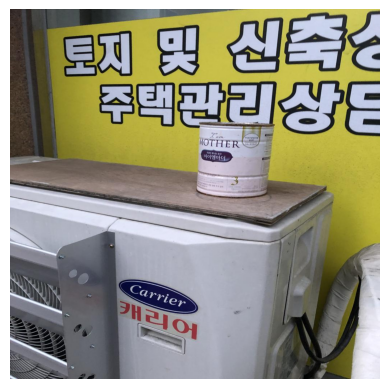

In [4]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
image_path='/data/ephemeral/home/dataset/test/4368.jpg'
model = YOLO('/data/ephemeral/home/_galio/runs/detect/train12/weights/best.pt')
results=model(image_path)
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

for result in results:
    boxes = result.boxes.xyxy  # 바운딩 박스 좌표 (x1, y1, x2, y2)
    classes = result.boxes.cls  # 클래스 ID
    confidences = result.boxes.conf  # 신뢰도

    for box, cls, conf in zip(boxes, classes, confidences):
        x1, y1, x2, y2 = map(int, box)  # 바운딩 박스 좌표를 정수로 변환
        label = f"Class {int(cls)}: {conf:.2f}"

        # 바운딩 박스 그리기
        cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

        # 클래스 및 신뢰도 텍스트 추가
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# 바운딩 박스를 그린 이미지를 시각화
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
from ultralytics import YOLO
import pandas as pd
import os
from tqdm import tqdm
# YOLO 모델 로드
model = YOLO('/data/ephemeral/home/_galio/runs/detect/train12/weights/best.pt')  # 추가 학습된 모델 경로

# prediction_strings와 file_names 리스트 초기화
prediction_strings = []
file_names = []

# 테스트 이미지 경로 설정
test_dir = '/data/ephemeral/home/dataset/test'

# 테스트 폴더 내의 모든 이미지 파일 가져오기
test_images = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# 이미지에 대한 예측 수행
for image_file in tqdm(test_images, desc="Processing images"):
    image_path = os.path.join(test_dir, image_file)

    # YOLO 모델을 사용하여 이미지에 대한 예측 수행
    results = model(image_path,conf=0.5,iou=0.5)

    # 결과값 후처리
    prediction_string = ''
    for result in results:
        boxes = result.boxes.xyxy  # 바운딩 박스 좌표
        scores = result.boxes.conf  # 신뢰도
        classes = result.boxes.cls  # 클래스 ID

        for box, score, cls in zip(boxes, scores, classes):
            x1, y1, x2, y2 = map(float, box)  # 바운딩 박스 좌표 (정수 또는 소수 처리)
            prediction_string += f"{int(cls)} {score:.4f} {x1:.1f} {y1:.1f} {x2:.1f} {y2:.1f} "

    prediction_strings.append(prediction_string.strip())  # 각 이미지의 예측값을 추가
    file_names.append(image_file)  # 이미지 파일명을 추가

# submission DataFrame 생성
submission = pd.DataFrame({
    'PredictionString': prediction_strings,
    'image_id': file_names
})

# CSV 파일로 저장 (예: 20번째 epoch의 결과 저장)
submission_file_path = os.path.join('/data/ephemeral/home/_galio', f'submission_yolox_best3.csv')
submission.to_csv(submission_file_path, index=False)

# 결과 확인
print(submission.head())


Processing images:   0%|          | 0/4871 [00:00<?, ?it/s]


image 1/1 /data/ephemeral/home/dataset/test/2627.jpg: 640x640 1 Paper, 1 Plastic bag, 26.1ms
Speed: 3.1ms preprocess, 26.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 1/4871 [00:00<58:16,  1.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/4519.jpg: 640x640 1 General trash, 2 Papers, 1 Metal, 4 Plastics, 27.4ms
Speed: 3.3ms preprocess, 27.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0785.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0022.jpg: 640x640 1 Clothing, 27.3ms
Speed: 2.9ms preprocess, 27.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 4/4871 [00:00<14:19,  5.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/1591.jpg: 640x640 2 Plastic bags, 26.9ms
Speed: 2.7ms preprocess, 26.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4203.jpg: 640x640 1 Plastic, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4368.jpg: 640x640 (no detections), 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 7/4871 [00:01<08:36,  9.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/0757.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2070.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2162.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 10/4871 [00:01<06:25, 12.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/2342.jpg: 640x640 2 Papers, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0726.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4837.jpg: 640x640 1 Paper, 1 Paper pack, 5 Plastic bags, 25.1ms
Speed: 3.0ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 13/4871 [00:01<05:22, 15.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0246.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0052.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2988.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 16/4871 [00:01<04:44, 17.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/1881.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0784.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0723.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 19/4871 [00:01<04:24, 18.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/4011.jpg: 640x640 4 Batterys, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3359.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2183.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   0%|          | 22/4871 [00:01<04:06, 19.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/0446.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2570.jpg: 640x640 7 Metals, 3 Glasss, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2460.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 25/4871 [00:01<03:57, 20.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/2321.jpg: 640x640 2 General trashs, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2531.jpg: 640x640 1 Paper, 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3859.jpg: 640x640 3 Papers, 4 Plastic bags, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 28/4871 [00:01<03:53, 20.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/4350.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2349.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3641.jpg: 640x640 1 General trash, 25.5ms
Speed: 2.7ms preprocess, 25.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 31/4871 [00:02<03:48, 21.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3584.jpg: 640x640 1 Metal, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2902.jpg: 640x640 1 Paper, 1 Glass, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2215.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 34/4871 [00:02<03:44, 21.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/3390.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3111.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0355.jpg: 640x640 2 Styrofoams, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 37/4871 [00:02<03:41, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/0276.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0093.jpg: 640x640 1 Plastic, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2465.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 40/4871 [00:02<03:39, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/2782.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2991.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4226.jpg: 640x640 1 General trash, 2 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 43/4871 [00:02<03:37, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/3775.jpg: 640x640 1 General trash, 1 Paper pack, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0553.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1725.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 46/4871 [00:02<03:38, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/1067.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0727.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2655.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 49/4871 [00:02<03:38, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/3399.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3161.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0658.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 52/4871 [00:03<03:38, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/4418.jpg: 640x640 4 Papers, 1 Styrofoam, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1427.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3470.jpg: 640x640 3 Glasss, 2 Plastics, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 55/4871 [00:03<03:36, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/2203.jpg: 640x640 1 Paper, 1 Plastic, 1 Styrofoam, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4660.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2958.jpg: 640x640 1 Metal, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|          | 58/4871 [00:03<03:36, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/2498.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1698.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3815.jpg: 640x640 (no detections), 27.5ms
Speed: 2.8ms preprocess, 27.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|▏         | 61/4871 [00:03<03:37, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/3003.jpg: 640x640 (no detections), 27.4ms
Speed: 3.0ms preprocess, 27.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2870.jpg: 640x640 1 Metal, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4750.jpg: 640x640 2 Clothings, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|▏         | 64/4871 [00:03<03:41, 21.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/3802.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1085.jpg: 640x640 1 Plastic, 1 Styrofoam, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4850.jpg: 640x640 1 Paper, 3 Plastics, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|▏         | 67/4871 [00:03<03:41, 21.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/2892.jpg: 640x640 (no detections), 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2490.jpg: 640x640 1 Paper, 1 Glass, 5 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1678.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|▏         | 70/4871 [00:03<03:40, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/1160.jpg: 640x640 3 Plastics, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2184.jpg: 640x640 1 Paper, 1 Metal, 1 Plastic, 6 Plastic bags, 1 Clothing, 25.0ms
Speed: 3.1ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1527.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   1%|▏         | 73/4871 [00:03<03:39, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/0243.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3389.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3960.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 76/4871 [00:04<03:39, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/1327.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1877.jpg: 640x640 6 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2140.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 79/4871 [00:04<03:38, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/1499.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4451.jpg: 640x640 4 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0622.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 82/4871 [00:04<03:38, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/3251.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0230.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1043.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 85/4871 [00:04<03:38, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/3732.jpg: 640x640 1 Paper, 25.7ms
Speed: 3.1ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3875.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0925.jpg: 640x640 2 Plastics, 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 88/4871 [00:04<03:38, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/3255.jpg: 640x640 1 Clothing, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1074.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4415.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 91/4871 [00:04<03:41, 21.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/4708.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4842.jpg: 640x640 1 Plastic, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2732.jpg: 640x640 1 Metal, 26.9ms
Speed: 2.8ms preprocess, 26.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 94/4871 [00:04<03:40, 21.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/0079.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1767.jpg: 640x640 1 Metal, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1340.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 97/4871 [00:05<03:37, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/1193.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0353.jpg: 640x640 5 Glasss, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4375.jpg: 640x640 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 100/4871 [00:05<03:36, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/1461.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0511.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0179.jpg: 640x640 4 Styrofoams, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 103/4871 [00:05<03:32, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/4700.jpg: 640x640 1 Paper pack, 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0943.jpg: 640x640 1 Metal, 1 Plastic bag, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2005.jpg: 640x640 1 Paper, 1 Styrofoam, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 106/4871 [00:05<03:32, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/4761.jpg: 640x640 9 Glasss, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0725.jpg: 640x640 2 Plastics, 3 Plastic bags, 24.5ms
Speed: 3.6ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1417.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 109/4871 [00:05<03:33, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4099.jpg: 640x640 6 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1524.jpg: 640x640 1 General trash, 1 Metal, 24.7ms
Speed: 3.2ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1808.jpg: 640x640 1 Paper, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 112/4871 [00:05<03:34, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/1065.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0976.jpg: 640x640 1 General trash, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1692.jpg: 640x640 1 Clothing, 24.6ms
Speed: 2.6ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 115/4871 [00:05<03:34, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3505.jpg: 640x640 1 Plastic, 1 Styrofoam, 1 Plastic bag, 25.2ms
Speed: 2.9ms preprocess, 25.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4185.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3946.jpg: 640x640 2 Plastic bags, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 118/4871 [00:06<03:36, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/4305.jpg: 640x640 1 General trash, 1 Plastic bag, 24.5ms
Speed: 3.3ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3371.jpg: 640x640 1 Paper, 1 Paper pack, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4737.jpg: 640x640 1 General trash, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   2%|▏         | 121/4871 [00:06<03:36, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/1710.jpg: 640x640 1 Paper, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1002.jpg: 640x640 1 General trash, 1 Paper, 2 Plastics, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3002.jpg: 640x640 (no detections), 24.2ms
Speed: 2.6ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 124/4871 [00:06<03:36, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/3493.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4473.jpg: 640x640 1 General trash, 1 Clothing, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2154.jpg: 640x640 (no detections), 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 127/4871 [00:06<03:36, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/2793.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0248.jpg: 640x640 1 Paper, 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1483.jpg: 640x640 3 General trashs, 1 Paper pack, 1 Plastic bag, 1 Clothing, 24.0ms
Speed: 3.4ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 130/4871 [00:06<03:37, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/3625.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3746.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 4.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3264.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 133/4871 [00:06<03:39, 21.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/4137.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3731.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0676.jpg: 640x640 2 General trashs, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 136/4871 [00:06<03:37, 21.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/2898.jpg: 640x640 3 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1342.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0488.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 139/4871 [00:06<03:34, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/0496.jpg: 640x640 1 Paper, 27.4ms
Speed: 2.9ms preprocess, 27.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3439.jpg: 640x640 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0065.jpg: 640x640 3 Papers, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 142/4871 [00:07<03:38, 21.65it/s]


image 1/1 /data/ephemeral/home/dataset/test/2865.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4115.jpg: 640x640 5 Papers, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1783.jpg: 640x640 2 Plastics, 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 145/4871 [00:07<03:38, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/4324.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3587.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4661.jpg: 640x640 1 Plastic, 6 Plastic bags, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 148/4871 [00:07<03:37, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/0583.jpg: 640x640 (no detections), 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4762.jpg: 640x640 (no detections), 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1653.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 151/4871 [00:07<03:38, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/2698.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1127.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1664.jpg: 640x640 1 General trash, 1 Styrofoam, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 154/4871 [00:07<03:33, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/4025.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2366.jpg: 640x640 2 Plastic bags, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0953.jpg: 640x640 1 General trash, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 157/4871 [00:07<03:32, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/4723.jpg: 640x640 (no detections), 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3122.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3765.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 160/4871 [00:07<03:34, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/0221.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1970.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2883.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 163/4871 [00:08<03:32, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/1699.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2004.jpg: 640x640 1 Metal, 1 Plastic, 24.2ms
Speed: 3.0ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0605.jpg: 640x640 5 Styrofoams, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 166/4871 [00:08<03:32, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/1596.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1324.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1618.jpg: 640x640 1 General trash, 26.4ms
Speed: 2.8ms preprocess, 26.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   3%|▎         | 169/4871 [00:08<03:35, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/0585.jpg: 640x640 (no detections), 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4388.jpg: 640x640 1 Clothing, 27.3ms
Speed: 2.8ms preprocess, 27.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2705.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▎         | 172/4871 [00:08<03:36, 21.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/3916.jpg: 640x640 2 Metals, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2089.jpg: 640x640 (no detections), 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0419.jpg: 640x640 1 General trash, 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▎         | 175/4871 [00:08<03:36, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/2765.jpg: 640x640 1 General trash, 1 Paper, 1 Metal, 4 Plastics, 2 Styrofoams, 4 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3091.jpg: 640x640 1 Metal, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1863.jpg: 640x640 1 Metal, 1 Glass, 2 Clothings, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▎         | 178/4871 [00:08<03:35, 21.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/1198.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0513.jpg: 640x640 (no detections), 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1046.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▎         | 181/4871 [00:08<03:35, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/0609.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2909.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2642.jpg: 640x640 2 Clothings, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 184/4871 [00:09<03:33, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/1132.jpg: 640x640 1 Paper, 4 Glasss, 1 Plastic bag, 25.9ms
Speed: 2.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3936.jpg: 640x640 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3242.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 187/4871 [00:09<03:34, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/2694.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2791.jpg: 640x640 1 Paper, 3 Styrofoams, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4583.jpg: 640x640 (no detections), 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 190/4871 [00:09<03:33, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/0730.jpg: 640x640 (no detections), 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3310.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4787.jpg: 640x640 (no detections), 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 193/4871 [00:09<03:31, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/3499.jpg: 640x640 1 Glass, 1 Plastic, 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3200.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1487.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 196/4871 [00:09<03:32, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/4156.jpg: 640x640 1 Clothing, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4196.jpg: 640x640 1 Metal, 25.4ms
Speed: 3.1ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2969.jpg: 640x640 1 Styrofoam, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 199/4871 [00:09<03:33, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/4755.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1730.jpg: 640x640 2 Papers, 2 Plastic bags, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3570.jpg: 640x640 3 Papers, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 202/4871 [00:09<03:33, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/2269.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0804.jpg: 640x640 1 Paper, 1 Styrofoam, 23.8ms
Speed: 3.0ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2481.jpg: 640x640 3 Papers, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 205/4871 [00:10<03:33, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/3648.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3929.jpg: 640x640 3 Plastic bags, 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1822.jpg: 640x640 1 Paper, 5 Plastic bags, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 208/4871 [00:10<03:32, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/4491.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2012.jpg: 640x640 1 General trash, 10 Papers, 1 Paper pack, 4 Plastic bags, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2483.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 211/4871 [00:10<03:32, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/1491.jpg: 640x640 1 Paper, 4 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1809.jpg: 640x640 2 Styrofoams, 26.5ms
Speed: 2.8ms preprocess, 26.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4488.jpg: 640x640 1 General trash, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 214/4871 [00:10<03:31, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/4287.jpg: 640x640 1 Plastic bag, 28.5ms
Speed: 3.5ms preprocess, 28.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4125.jpg: 640x640 1 Plastic bag, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0584.jpg: 640x640 (no detections), 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   4%|▍         | 217/4871 [00:10<03:33, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/3205.jpg: 640x640 1 General trash, 1 Clothing, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0374.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4463.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 220/4871 [00:10<03:35, 21.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/4505.jpg: 640x640 1 General trash, 1 Styrofoam, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4558.jpg: 640x640 1 General trash, 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2907.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 223/4871 [00:10<03:36, 21.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/1469.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3828.jpg: 640x640 1 Paper, 24.1ms
Speed: 15.4ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1565.jpg: 640x640 1 Metal, 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 226/4871 [00:10<03:43, 20.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/3700.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2842.jpg: 640x640 1 Glass, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3192.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 229/4871 [00:11<03:42, 20.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/2693.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3852.jpg: 640x640 2 Papers, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2278.jpg: 640x640 1 General trash, 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 232/4871 [00:11<03:39, 21.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/0927.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4312.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3624.jpg: 640x640 1 Metal, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 235/4871 [00:11<03:40, 21.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/0722.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2136.jpg: 640x640 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0341.jpg: 640x640 1 Paper, 11 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 238/4871 [00:11<03:36, 21.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/4504.jpg: 640x640 1 Metal, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1214.jpg: 640x640 1 Paper, 6 Glasss, 1 Battery, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1009.jpg: 640x640 1 General trash, 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▍         | 241/4871 [00:11<03:34, 21.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/1050.jpg: 640x640 6 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3443.jpg: 640x640 1 Paper, 1 Styrofoam, 1 Plastic bag, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2770.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 244/4871 [00:11<03:32, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/4393.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3603.jpg: 640x640 1 Paper, 2 Plastic bags, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0891.jpg: 640x640 2 Papers, 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 247/4871 [00:11<03:31, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/1713.jpg: 640x640 1 Glass, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2564.jpg: 640x640 1 Plastic, 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3287.jpg: 640x640 1 Plastic bag, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 250/4871 [00:12<03:31, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/0296.jpg: 640x640 1 Paper, 1 Styrofoam, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4535.jpg: 640x640 2 General trashs, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4406.jpg: 640x640 1 Paper, 2 Plastics, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 253/4871 [00:12<03:29, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/0686.jpg: 640x640 5 Plastics, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1229.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0674.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 256/4871 [00:12<03:29, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/1298.jpg: 640x640 1 Battery, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3592.jpg: 640x640 1 Clothing, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2268.jpg: 640x640 2 Papers, 3 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 259/4871 [00:12<03:26, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/3730.jpg: 640x640 1 General trash, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3718.jpg: 640x640 (no detections), 25.4ms
Speed: 3.4ms preprocess, 25.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2040.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 262/4871 [00:12<03:26, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/4453.jpg: 640x640 1 Paper, 5 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0336.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2310.jpg: 640x640 (no detections), 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   5%|▌         | 265/4871 [00:12<03:27, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/0420.jpg: 640x640 1 Paper, 2 Paper packs, 2 Metals, 1 Plastic, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0536.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4140.jpg: 640x640 1 General trash, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 268/4871 [00:12<03:28, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/0528.jpg: 640x640 1 Paper, 1 Paper pack, 2 Plastic bags, 27.4ms
Speed: 2.8ms preprocess, 27.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3366.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3756.jpg: 640x640 1 Paper pack, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 271/4871 [00:13<03:30, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/3136.jpg: 640x640 1 General trash, 1 Plastic bag, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2728.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4594.jpg: 640x640 (no detections), 24.4ms
Speed: 3.3ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 274/4871 [00:13<03:31, 21.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/1325.jpg: 640x640 1 Paper pack, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4123.jpg: 640x640 1 Paper, 1 Metal, 26.1ms
Speed: 2.9ms preprocess, 26.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2246.jpg: 640x640 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 277/4871 [00:13<03:31, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/3152.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0992.jpg: 640x640 3 Plastics, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1875.jpg: 640x640 (no detections), 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 280/4871 [00:13<03:29, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/1695.jpg: 640x640 (no detections), 24.8ms
Speed: 3.4ms preprocess, 24.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2000.jpg: 640x640 3 Glasss, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3539.jpg: 640x640 1 Paper, 2 Styrofoams, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 283/4871 [00:13<03:30, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/4389.jpg: 640x640 1 Clothing, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2389.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4355.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 286/4871 [00:13<03:32, 21.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/0738.jpg: 640x640 4 Batterys, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0627.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2867.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 289/4871 [00:13<03:31, 21.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/2590.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1782.jpg: 640x640 1 Paper, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0873.jpg: 640x640 1 General trash, 1 Paper pack, 1 Battery, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 292/4871 [00:14<03:30, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/3896.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1401.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3928.jpg: 640x640 1 Paper, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 295/4871 [00:14<03:30, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/4736.jpg: 640x640 1 Plastic, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1628.jpg: 640x640 2 Glasss, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1453.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 298/4871 [00:14<03:30, 21.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/4784.jpg: 640x640 1 Plastic bag, 25.5ms
Speed: 2.8ms preprocess, 25.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2876.jpg: 640x640 3 Papers, 1 Glass, 1 Plastic, 4 Styrofoams, 2 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2773.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 301/4871 [00:14<03:31, 21.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/1022.jpg: 640x640 (no detections), 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0311.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2190.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▌         | 304/4871 [00:14<03:29, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/3617.jpg: 640x640 1 Styrofoam, 25.8ms
Speed: 2.9ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2354.jpg: 640x640 1 Styrofoam, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2522.jpg: 640x640 1 Metal, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▋         | 307/4871 [00:14<03:29, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/3377.jpg: 640x640 1 Plastic, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1624.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3314.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▋         | 310/4871 [00:14<03:27, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/4468.jpg: 640x640 1 General trash, 3 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3395.jpg: 640x640 (no detections), 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3164.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▋         | 313/4871 [00:14<03:27, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/3044.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1652.jpg: 640x640 1 Clothing, 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4864.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   6%|▋         | 316/4871 [00:15<03:26, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/0409.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4403.jpg: 640x640 3 Papers, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1126.jpg: 640x640 1 General trash, 1 Metal, 9 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 319/4871 [00:15<03:27, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/2540.jpg: 640x640 1 Clothing, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1617.jpg: 640x640 1 General trash, 2 Papers, 2 Plastic bags, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4050.jpg: 640x640 1 Metal, 1 Plastic, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 322/4871 [00:15<03:29, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/0306.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0867.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3105.jpg: 640x640 1 General trash, 5 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 325/4871 [00:15<03:29, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/3174.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1824.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0033.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 328/4871 [00:15<03:28, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/1774.jpg: 640x640 2 Papers, 1 Paper pack, 6 Plastics, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1778.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2424.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 331/4871 [00:15<03:27, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/0167.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1443.jpg: 640x640 1 Paper, 28.3ms
Speed: 3.1ms preprocess, 28.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1045.jpg: 640x640 1 Plastic bag, 30.2ms
Speed: 2.8ms preprocess, 30.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 334/4871 [00:15<03:30, 21.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/4041.jpg: 640x640 1 Paper, 1 Plastic bag, 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3386.jpg: 640x640 (no detections), 24.9ms
Speed: 3.2ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3361.jpg: 640x640 1 Battery, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 337/4871 [00:16<03:29, 21.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/0071.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1394.jpg: 640x640 2 Papers, 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3144.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 340/4871 [00:16<03:27, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/3902.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3319.jpg: 640x640 1 Plastic, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4030.jpg: 640x640 2 Metals, 1 Plastic, 1 Plastic bag, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 343/4871 [00:16<03:27, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/1178.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2341.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1995.jpg: 640x640 3 General trashs, 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 346/4871 [00:16<03:25, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/0304.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3072.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1169.jpg: 640x640 2 Plastics, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 349/4871 [00:16<03:21, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/1772.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3070.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2187.jpg: 640x640 2 Papers, 24.4ms
Speed: 3.2ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 352/4871 [00:16<03:19, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/2931.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0944.jpg: 640x640 1 Paper, 1 Styrofoam, 2 Plastic bags, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4177.jpg: 640x640 3 Papers, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 355/4871 [00:16<03:19, 22.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/2200.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0429.jpg: 640x640 1 Paper, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4077.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 358/4871 [00:17<03:20, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/0185.jpg: 640x640 5 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3581.jpg: 640x640 1 Metal, 1 Battery, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1523.jpg: 640x640 1 General trash, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 361/4871 [00:17<03:20, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/1604.jpg: 640x640 1 General trash, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1525.jpg: 640x640 (no detections), 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3659.jpg: 640x640 1 Paper pack, 24.9ms
Speed: 3.1ms preprocess, 24.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   7%|▋         | 364/4871 [00:17<03:22, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/0821.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1366.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2496.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 367/4871 [00:17<03:22, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0039.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4830.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3153.jpg: 640x640 1 Paper, 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 370/4871 [00:17<03:22, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/2921.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2208.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4717.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 373/4871 [00:17<03:20, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/2737.jpg: 640x640 1 General trash, 1 Plastic, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3818.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0088.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 376/4871 [00:17<03:19, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/0168.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1100.jpg: 640x640 1 Metal, 1 Battery, 1 Clothing, 25.1ms
Speed: 3.0ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2536.jpg: 640x640 (no detections), 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 379/4871 [00:17<03:23, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/1610.jpg: 640x640 1 Metal, 1 Plastic, 24.7ms
Speed: 3.1ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0986.jpg: 640x640 1 Paper, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0769.jpg: 640x640 4 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 382/4871 [00:18<03:25, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/3973.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2301.jpg: 640x640 1 Paper pack, 1 Plastic, 1 Clothing, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1003.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 385/4871 [00:18<03:23, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/2644.jpg: 640x640 1 General trash, 2 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3241.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3464.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 388/4871 [00:18<03:22, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/1714.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0019.jpg: 640x640 14 Papers, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4270.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 391/4871 [00:18<03:23, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/2461.jpg: 640x640 1 Paper pack, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2049.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4189.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 394/4871 [00:18<03:22, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2713.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1873.jpg: 640x640 3 Plastic bags, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3845.jpg: 640x640 1 Plastic, 25.9ms
Speed: 3.1ms preprocess, 25.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 397/4871 [00:18<03:28, 21.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/3278.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1490.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3520.jpg: 640x640 1 Paper, 4 Plastics, 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 400/4871 [00:18<03:27, 21.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/4738.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1266.jpg: 640x640 4 Papers, 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2924.jpg: 640x640 1 General trash, 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 403/4871 [00:19<03:24, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/3062.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0702.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2979.jpg: 640x640 1 Paper, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 406/4871 [00:19<03:24, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/1972.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3620.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0728.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 409/4871 [00:19<03:24, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/2388.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4187.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2192.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   8%|▊         | 412/4871 [00:19<03:18, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/1066.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3333.jpg: 640x640 1 General trash, 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4516.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▊         | 415/4871 [00:19<03:20, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/0485.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3133.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1345.jpg: 640x640 1 General trash, 1 Paper, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▊         | 418/4871 [00:19<03:20, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4054.jpg: 640x640 1 Styrofoam, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4523.jpg: 640x640 2 Papers, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0158.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▊         | 421/4871 [00:19<03:18, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/0793.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4478.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1988.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▊         | 424/4871 [00:20<03:21, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/0825.jpg: 640x640 1 General trash, 3 Plastics, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1773.jpg: 640x640 2 Papers, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0550.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 427/4871 [00:20<03:19, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/2081.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3215.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4598.jpg: 640x640 1 General trash, 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 430/4871 [00:20<03:19, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/3719.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2074.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1083.jpg: 640x640 2 Clothings, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 433/4871 [00:20<03:17, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/2700.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1445.jpg: 640x640 3 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3095.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 436/4871 [00:20<03:15, 22.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/3745.jpg: 640x640 1 Paper pack, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2850.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2145.jpg: 640x640 1 General trash, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 439/4871 [00:20<03:14, 22.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/0575.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1642.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0153.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 442/4871 [00:20<03:14, 22.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/2102.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0833.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4379.jpg: 640x640 3 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 445/4871 [00:20<03:14, 22.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/0732.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4029.jpg: 640x640 1 General trash, 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1262.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 448/4871 [00:21<03:14, 22.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/0996.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0277.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0498.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 451/4871 [00:21<03:14, 22.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/1927.jpg: 640x640 4 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3647.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0739.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 454/4871 [00:21<03:14, 22.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/1804.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2893.jpg: 640x640 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0394.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 457/4871 [00:21<03:13, 22.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/3184.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0565.jpg: 640x640 1 Paper pack, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1900.jpg: 640x640 13 Papers, 1 Paper pack, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:   9%|▉         | 460/4871 [00:21<03:14, 22.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/2912.jpg: 640x640 1 General trash, 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3734.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3322.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 463/4871 [00:21<03:14, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/4014.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3223.jpg: 640x640 3 General trashs, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1448.jpg: 640x640 1 Plastic bag, 1 Clothing, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 466/4871 [00:21<03:14, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/0482.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4645.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2774.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 469/4871 [00:21<03:16, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/4846.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0798.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4464.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 472/4871 [00:22<03:16, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/0443.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4402.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3057.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 475/4871 [00:22<03:13, 22.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/0629.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1001.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0742.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 478/4871 [00:22<03:14, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/2963.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1553.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2304.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 481/4871 [00:22<03:12, 22.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/2660.jpg: 640x640 2 Plastics, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1334.jpg: 640x640 4 Papers, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4820.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 484/4871 [00:22<03:11, 22.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/1040.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0137.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2800.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|▉         | 487/4871 [00:22<03:13, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/2193.jpg: 640x640 2 General trashs, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2875.jpg: 640x640 3 Papers, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2724.jpg: 640x640 7 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 490/4871 [00:22<03:13, 22.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/0275.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3872.jpg: 640x640 1 Paper, 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1013.jpg: 640x640 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 493/4871 [00:23<03:11, 22.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/0368.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0385.jpg: 640x640 4 Papers, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4724.jpg: 640x640 1 Paper, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 496/4871 [00:23<03:13, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/1287.jpg: 640x640 2 Plastics, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3906.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3786.jpg: 640x640 5 Papers, 1 Plastic, 2 Styrofoams, 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 499/4871 [00:23<03:16, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/4274.jpg: 640x640 (no detections), 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0209.jpg: 640x640 1 Glass, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0837.jpg: 640x640 (no detections), 25.8ms
Speed: 2.8ms preprocess, 25.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 502/4871 [00:23<03:15, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/2990.jpg: 640x640 1 General trash, 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4118.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4445.jpg: 640x640 2 Papers, 1 Plastic, 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 505/4871 [00:23<03:16, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/3454.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0128.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2546.jpg: 640x640 1 Metal, 1 Plastic, 1 Clothing, 24.2ms
Speed: 3.1ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 508/4871 [00:23<03:16, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/2194.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0307.jpg: 640x640 2 Plastic bags, 1 Clothing, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1269.jpg: 640x640 1 General trash, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  10%|█         | 511/4871 [00:23<03:14, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/0044.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1734.jpg: 640x640 1 Paper pack, 4 Plastics, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4152.jpg: 640x640 1 Clothing, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 514/4871 [00:23<03:12, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/1994.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4624.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3794.jpg: 640x640 4 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 517/4871 [00:24<03:13, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/3305.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0100.jpg: 640x640 1 Paper, 5 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4308.jpg: 640x640 7 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 520/4871 [00:24<03:13, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/2006.jpg: 640x640 3 Glasss, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2178.jpg: 640x640 2 Papers, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2245.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 523/4871 [00:24<03:11, 22.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/3151.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3217.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1420.jpg: 640x640 1 Styrofoam, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 526/4871 [00:24<03:11, 22.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/2657.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3001.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2869.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 529/4871 [00:24<03:11, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/4422.jpg: 640x640 4 Papers, 5 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0613.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0499.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 532/4871 [00:24<03:12, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/3409.jpg: 640x640 1 General trash, 1 Paper pack, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3953.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1620.jpg: 640x640 9 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 535/4871 [00:24<03:13, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/0755.jpg: 640x640 1 General trash, 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3355.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0907.jpg: 640x640 1 General trash, 1 Paper pack, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 538/4871 [00:25<03:13, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/1076.jpg: 640x640 (no detections), 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1321.jpg: 640x640 1 General trash, 2 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3728.jpg: 640x640 2 General trashs, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 541/4871 [00:25<03:15, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/4707.jpg: 640x640 1 Glass, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2157.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0287.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 544/4871 [00:25<03:16, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/4172.jpg: 640x640 1 Paper, 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3884.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4116.jpg: 640x640 2 Papers, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█         | 547/4871 [00:25<03:15, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3622.jpg: 640x640 1 Metal, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1554.jpg: 640x640 1 Battery, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1408.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█▏        | 550/4871 [00:25<03:14, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/2887.jpg: 640x640 1 General trash, 1 Paper, 1 Styrofoam, 4 Plastic bags, 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0546.jpg: 640x640 1 Metal, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4794.jpg: 640x640 1 General trash, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█▏        | 553/4871 [00:25<03:17, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/2199.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0910.jpg: 640x640 2 Glasss, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2188.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█▏        | 556/4871 [00:25<03:18, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/0300.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3357.jpg: 640x640 1 General trash, 27.8ms
Speed: 3.0ms preprocess, 27.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0568.jpg: 640x640 2 Plastics, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  11%|█▏        | 559/4871 [00:26<03:21, 21.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/0014.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0587.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4211.jpg: 640x640 2 Styrofoams, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 562/4871 [00:26<03:16, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/3887.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0990.jpg: 640x640 1 General trash, 1 Paper pack, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2124.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 565/4871 [00:26<03:15, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/0484.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0171.jpg: 640x640 (no detections), 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0900.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 568/4871 [00:26<03:15, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/3335.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1755.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3690.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 571/4871 [00:26<03:17, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/4843.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0155.jpg: 640x640 1 Glass, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2647.jpg: 640x640 1 Paper pack, 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 574/4871 [00:26<03:14, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/1609.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2315.jpg: 640x640 2 Plastics, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4342.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 577/4871 [00:26<03:12, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3259.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4437.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4616.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 580/4871 [00:26<03:12, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/3642.jpg: 640x640 5 Papers, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1351.jpg: 640x640 1 Paper, 5 Plastic bags, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3234.jpg: 640x640 4 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 583/4871 [00:27<03:13, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/0434.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0768.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0227.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 586/4871 [00:27<03:09, 22.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/4525.jpg: 640x640 1 Paper, 2 Plastics, 3 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1839.jpg: 640x640 1 Paper, 2 Plastics, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1981.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 589/4871 [00:27<03:10, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/3871.jpg: 640x640 1 Glass, 2 Plastics, 1 Battery, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1685.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2077.jpg: 640x640 3 Batterys, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 592/4871 [00:27<03:08, 22.65it/s]


image 1/1 /data/ephemeral/home/dataset/test/2949.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1844.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2478.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 595/4871 [00:27<03:07, 22.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/3866.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0704.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1168.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 598/4871 [00:27<03:08, 22.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/3079.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2390.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2811.jpg: 640x640 1 General trash, 2 Papers, 6 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 601/4871 [00:27<03:07, 22.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/2787.jpg: 640x640 3 Papers, 1 Styrofoam, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4015.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0016.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 604/4871 [00:28<03:09, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/2445.jpg: 640x640 1 Plastic bag, 1 Battery, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4313.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0324.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  12%|█▏        | 607/4871 [00:28<03:09, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/2617.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3182.jpg: 640x640 2 Papers, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1916.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 610/4871 [00:28<03:09, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/3915.jpg: 640x640 1 Styrofoam, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4370.jpg: 640x640 1 Paper, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0343.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 613/4871 [00:28<03:10, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/4223.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2417.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2135.jpg: 640x640 1 Plastic bag, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 616/4871 [00:28<03:11, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/1761.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2238.jpg: 640x640 2 Papers, 1 Paper pack, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0650.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 619/4871 [00:28<03:12, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/2463.jpg: 640x640 2 Paper packs, 1 Glass, 2 Plastics, 1 Styrofoam, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1421.jpg: 640x640 1 General trash, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1116.jpg: 640x640 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 622/4871 [00:28<03:13, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/1414.jpg: 640x640 1 Styrofoam, 25.5ms
Speed: 2.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0048.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2167.jpg: 640x640 2 Paper packs, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 625/4871 [00:28<03:12, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/4194.jpg: 640x640 (no detections), 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1598.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2382.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 628/4871 [00:29<03:09, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/0350.jpg: 640x640 2 General trashs, 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0025.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4019.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 631/4871 [00:29<03:09, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/4428.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2279.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2829.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 634/4871 [00:29<03:10, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4576.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4136.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0129.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 637/4871 [00:29<03:09, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/0552.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4731.jpg: 640x640 1 Paper pack, 1 Metal, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3693.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 640/4871 [00:29<03:11, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/2785.jpg: 640x640 2 General trashs, 2 Papers, 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0393.jpg: 640x640 2 Papers, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4121.jpg: 640x640 2 General trashs, 6 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 643/4871 [00:29<03:12, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/2239.jpg: 640x640 1 Paper, 2 Styrofoams, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2771.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0308.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 646/4871 [00:29<03:10, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/1213.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0180.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2908.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 649/4871 [00:30<03:09, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/1430.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0599.jpg: 640x640 3 Papers, 6 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2951.jpg: 640x640 1 Plastic, 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 652/4871 [00:30<03:10, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/0416.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2499.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0625.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  13%|█▎        | 655/4871 [00:30<03:09, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/0773.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1101.jpg: 640x640 1 Styrofoam, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3981.jpg: 640x640 2 Papers, 2 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▎        | 658/4871 [00:30<03:10, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/0557.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2814.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1897.jpg: 640x640 2 Glasss, 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▎        | 661/4871 [00:30<03:07, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/1879.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0069.jpg: 640x640 2 Papers, 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3910.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▎        | 664/4871 [00:30<03:07, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/3123.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3899.jpg: 640x640 1 Paper, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2219.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▎        | 667/4871 [00:30<03:08, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/0064.jpg: 640x640 1 Plastic, 1 Plastic bag, 25.9ms
Speed: 2.7ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1212.jpg: 640x640 1 Glass, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4609.jpg: 640x640 1 Plastic, 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 670/4871 [00:30<03:09, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/3962.jpg: 640x640 3 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3590.jpg: 640x640 1 General trash, 2 Clothings, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3289.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 673/4871 [00:31<03:09, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/1162.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4358.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0616.jpg: 640x640 3 Glasss, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 676/4871 [00:31<03:06, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/0823.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0503.jpg: 640x640 2 Papers, 2 Plastics, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1588.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 679/4871 [00:31<03:07, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/0981.jpg: 640x640 3 Papers, 1 Paper pack, 4 Plastic bags, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3972.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2871.jpg: 640x640 1 Styrofoam, 4 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 682/4871 [00:31<03:06, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/1878.jpg: 640x640 1 General trash, 1 Plastic, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0832.jpg: 640x640 2 Papers, 5 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3832.jpg: 640x640 1 Metal, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 685/4871 [00:31<03:07, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4212.jpg: 640x640 1 Battery, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2574.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3530.jpg: 640x640 1 Paper pack, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 688/4871 [00:31<03:09, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/1890.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1709.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4339.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 691/4871 [00:31<03:06, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/4650.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3031.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0663.jpg: 640x640 1 Paper, 3 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 694/4871 [00:32<03:03, 22.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/2421.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4279.jpg: 640x640 2 Papers, 1 Plastic, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1255.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 697/4871 [00:32<03:04, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/0031.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4362.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3037.jpg: 640x640 3 General trashs, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 700/4871 [00:32<03:04, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/0486.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1914.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1764.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 703/4871 [00:32<03:04, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/3165.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4148.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4767.jpg: 640x640 4 Papers, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  14%|█▍        | 706/4871 [00:32<03:06, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/0439.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1801.jpg: 640x640 4 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2638.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 709/4871 [00:32<03:06, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3169.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3207.jpg: 640x640 1 General trash, 1 Paper pack, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2017.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 712/4871 [00:32<03:06, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/4521.jpg: 640x640 (no detections), 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2308.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0223.jpg: 640x640 1 Plastic, 9 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 715/4871 [00:33<03:07, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4732.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4109.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2191.jpg: 640x640 2 Clothings, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 718/4871 [00:33<03:06, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/1848.jpg: 640x640 11 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2645.jpg: 640x640 1 Paper, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3629.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 721/4871 [00:33<03:07, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3923.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0696.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4793.jpg: 640x640 5 Papers, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 724/4871 [00:33<03:06, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/1379.jpg: 640x640 3 Plastics, 7 Plastic bags, 27.6ms
Speed: 2.8ms preprocess, 27.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4181.jpg: 640x640 (no detections), 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0817.jpg: 640x640 1 Paper, 25.0ms
Speed: 3.5ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 727/4871 [00:33<03:12, 21.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/1134.jpg: 640x640 5 Plastic bags, 26.0ms
Speed: 2.9ms preprocess, 26.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3024.jpg: 640x640 1 Paper, 25.9ms
Speed: 2.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1119.jpg: 640x640 (no detections), 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▍        | 730/4871 [00:33<03:12, 21.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/2058.jpg: 640x640 2 General trashs, 4 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4805.jpg: 640x640 4 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1259.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 733/4871 [00:33<03:10, 21.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/0176.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2414.jpg: 640x640 (no detections), 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3014.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 736/4871 [00:33<03:08, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/4382.jpg: 640x640 1 Plastic, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3507.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3403.jpg: 640x640 3 Papers, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 739/4871 [00:34<03:08, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/3940.jpg: 640x640 (no detections), 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4326.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3262.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 742/4871 [00:34<03:08, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/2036.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2329.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4013.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 745/4871 [00:34<03:07, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/3273.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2126.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1959.jpg: 640x640 (no detections), 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 748/4871 [00:34<03:07, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/4548.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4818.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1008.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 751/4871 [00:34<03:06, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/4604.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3869.jpg: 640x640 1 Paper, 3 Paper packs, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0912.jpg: 640x640 1 Paper, 26.1ms
Speed: 2.7ms preprocess, 26.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  15%|█▌        | 754/4871 [00:34<03:07, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/3958.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3404.jpg: 640x640 1 Plastic, 25.6ms
Speed: 2.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1084.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 757/4871 [00:34<03:08, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/1474.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4634.jpg: 640x640 1 Paper, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3083.jpg: 640x640 2 Papers, 2 Styrofoams, 4 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 760/4871 [00:35<03:07, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/0600.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0512.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4191.jpg: 640x640 9 Glasss, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 763/4871 [00:35<03:07, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/1189.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3134.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0397.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 766/4871 [00:35<03:04, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/1362.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2228.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4143.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 769/4871 [00:35<03:03, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/0453.jpg: 640x640 1 Paper, 1 Plastic bag, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2841.jpg: 640x640 1 Paper, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3307.jpg: 640x640 2 Papers, 1 Styrofoam, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 772/4871 [00:35<03:08, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/3870.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1466.jpg: 640x640 (no detections), 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3025.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 775/4871 [00:35<03:08, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/1945.jpg: 640x640 2 Clothings, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2682.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 3 Styrofoams, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0384.jpg: 640x640 (no detections), 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 778/4871 [00:35<03:06, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/0056.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0445.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0404.jpg: 640x640 1 Plastic, 3 Plastic bags, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 781/4871 [00:36<03:07, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/2671.jpg: 640x640 (no detections), 25.0ms
Speed: 3.1ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1280.jpg: 640x640 1 Plastic, 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2042.jpg: 640x640 1 Glass, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 784/4871 [00:36<03:08, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/4710.jpg: 640x640 1 Plastic bag, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3868.jpg: 640x640 1 Glass, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2981.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 787/4871 [00:36<03:05, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/0334.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4387.jpg: 640x640 1 Paper pack, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0758.jpg: 640x640 1 General trash, 1 Clothing, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▌        | 790/4871 [00:36<03:04, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2095.jpg: 640x640 1 General trash, 1 Clothing, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0999.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0190.jpg: 640x640 1 General trash, 3 Plastic bags, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▋        | 793/4871 [00:36<03:04, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/2075.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4263.jpg: 640x640 1 Paper, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1096.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▋        | 796/4871 [00:36<03:03, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/1707.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0826.jpg: 640x640 2 General trashs, 2 Papers, 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0314.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▋        | 799/4871 [00:36<03:03, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2254.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.6ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4692.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic, 1 Plastic bag, 24.2ms
Speed: 3.0ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4024.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  16%|█▋        | 802/4871 [00:36<03:03, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/4168.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0537.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1498.jpg: 640x640 2 Papers, 1 Metal, 1 Plastic, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 805/4871 [00:37<03:03, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/3608.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0966.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3073.jpg: 640x640 1 General trash, 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 808/4871 [00:37<03:04, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/3163.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3742.jpg: 640x640 1 Metal, 1 Glass, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0225.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 811/4871 [00:37<03:02, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/1390.jpg: 640x640 (no detections), 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3320.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4575.jpg: 640x640 5 Papers, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 814/4871 [00:37<03:01, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/3350.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1004.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1206.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 817/4871 [00:37<03:02, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/2160.jpg: 640x640 2 Papers, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1940.jpg: 640x640 1 Metal, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0700.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 820/4871 [00:37<03:02, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/1236.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1217.jpg: 640x640 3 Plastic bags, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4036.jpg: 640x640 1 Metal, 23.8ms
Speed: 3.0ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 823/4871 [00:37<03:01, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/4851.jpg: 640x640 1 General trash, 1 Paper pack, 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3671.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1364.jpg: 640x640 1 Paper, 1 Metal, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 826/4871 [00:38<03:01, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/0472.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3675.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1947.jpg: 640x640 1 Glass, 1 Plastic, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 829/4871 [00:38<03:00, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/3270.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0919.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2177.jpg: 640x640 1 General trash, 1 Plastic, 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 832/4871 [00:38<03:00, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/3258.jpg: 640x640 3 Styrofoams, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1680.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2945.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 835/4871 [00:38<02:59, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/4603.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1595.jpg: 640x640 1 Paper pack, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3139.jpg: 640x640 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 838/4871 [00:38<02:59, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/4595.jpg: 640x640 1 Metal, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2702.jpg: 640x640 2 Plastics, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4509.jpg: 640x640 2 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 841/4871 [00:38<02:58, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/1501.jpg: 640x640 1 Glass, 1 Battery, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3721.jpg: 640x640 3 Styrofoams, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2906.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 844/4871 [00:38<02:56, 22.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/3186.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2709.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2972.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 847/4871 [00:38<02:57, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/0198.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4862.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1489.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  17%|█▋        | 850/4871 [00:39<02:58, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/2735.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4751.jpg: 640x640 2 Plastics, 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4545.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 853/4871 [00:39<03:01, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/1965.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0532.jpg: 640x640 1 Paper, 7 Plastic bags, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0666.jpg: 640x640 (no detections), 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 856/4871 [00:39<03:01, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/1380.jpg: 640x640 2 Plastics, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1353.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4776.jpg: 640x640 1 General trash, 3 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 859/4871 [00:39<03:01, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0776.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3909.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0677.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 862/4871 [00:39<03:02, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/4589.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2654.jpg: 640x640 1 Clothing, 24.7ms
Speed: 4.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4151.jpg: 640x640 3 Papers, 2 Plastic bags, 23.7ms
Speed: 3.0ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 865/4871 [00:39<03:02, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/1587.jpg: 640x640 (no detections), 26.8ms
Speed: 2.8ms preprocess, 26.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1049.jpg: 640x640 1 Styrofoam, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0897.jpg: 640x640 1 Metal, 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 868/4871 [00:39<03:01, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/2846.jpg: 640x640 1 General trash, 2 Plastic bags, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1128.jpg: 640x640 2 Papers, 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0956.jpg: 640x640 5 Papers, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 871/4871 [00:40<03:00, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/4613.jpg: 640x640 2 General trashs, 7 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3190.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4639.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 874/4871 [00:40<03:00, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/1735.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2003.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2820.jpg: 640x640 1 General trash, 3 Papers, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 877/4871 [00:40<02:57, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/3492.jpg: 640x640 2 Papers, 1 Styrofoam, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4602.jpg: 640x640 1 Clothing, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1943.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 880/4871 [00:40<02:56, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/3498.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1886.jpg: 640x640 2 General trashs, 5 Papers, 1 Styrofoam, 3 Plastic bags, 24.3ms
Speed: 2.5ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4801.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 883/4871 [00:40<02:56, 22.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/1647.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3739.jpg: 640x640 1 Paper pack, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3114.jpg: 640x640 (no detections), 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 886/4871 [00:40<02:57, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/3785.jpg: 640x640 1 Paper, 1 Plastic bag, 1 Clothing, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4094.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4640.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 889/4871 [00:40<02:57, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/0803.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4251.jpg: 640x640 2 General trashs, 1 Styrofoam, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3549.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 892/4871 [00:40<02:55, 22.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/3894.jpg: 640x640 1 Paper, 1 Metal, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2302.jpg: 640x640 1 General trash, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1835.jpg: 640x640 2 Plastic bags, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 895/4871 [00:41<02:52, 23.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/0838.jpg: 640x640 1 Paper, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1293.jpg: 640x640 1 Styrofoam, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2320.jpg: 640x640 1 Paper, 1 Plastic bag, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 898/4871 [00:41<02:51, 23.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/3291.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1006.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4072.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  18%|█▊        | 901/4871 [00:41<02:52, 23.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0941.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0968.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4788.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▊        | 904/4871 [00:41<02:50, 23.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/2248.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4725.jpg: 640x640 2 Papers, 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1687.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▊        | 907/4871 [00:41<02:50, 23.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/0709.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0954.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4010.jpg: 640x640 3 Papers, 1 Paper pack, 1 Plastic, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▊        | 910/4871 [00:41<02:51, 23.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/2386.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2857.jpg: 640x640 1 General trash, 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1112.jpg: 640x640 1 Metal, 1 Plastic, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▊        | 913/4871 [00:41<02:53, 22.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/2066.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4748.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0566.jpg: 640x640 1 Clothing, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 916/4871 [00:42<02:53, 22.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/1812.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4458.jpg: 640x640 1 Plastic, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1393.jpg: 640x640 1 Paper, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 919/4871 [00:42<02:54, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/1749.jpg: 640x640 2 Plastic bags, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1955.jpg: 640x640 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1375.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 922/4871 [00:42<02:52, 22.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/0370.jpg: 640x640 2 Papers, 1 Plastic, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0849.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2501.jpg: 640x640 4 Papers, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 925/4871 [00:42<02:53, 22.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/3778.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4811.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4361.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 928/4871 [00:42<02:54, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/1186.jpg: 640x640 1 General trash, 1 Metal, 1 Plastic, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2849.jpg: 640x640 1 Paper, 1 Styrofoam, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4051.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 931/4871 [00:42<02:56, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/2932.jpg: 640x640 2 Papers, 25.5ms
Speed: 2.7ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4091.jpg: 640x640 1 Paper, 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0152.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 934/4871 [00:42<02:56, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/4040.jpg: 640x640 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3173.jpg: 640x640 1 General trash, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1451.jpg: 640x640 2 Plastic bags, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 937/4871 [00:42<02:57, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/4454.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2331.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4657.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 940/4871 [00:43<02:57, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/4728.jpg: 640x640 2 General trashs, 1 Plastic, 5 Plastic bags, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3985.jpg: 640x640 1 General trash, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0859.jpg: 640x640 (no detections), 26.3ms
Speed: 2.8ms preprocess, 26.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 943/4871 [00:43<02:57, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2458.jpg: 640x640 1 Paper pack, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1756.jpg: 640x640 1 Metal, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3019.jpg: 640x640 4 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 946/4871 [00:43<02:58, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/1257.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2018.jpg: 640x640 1 General trash, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0126.jpg: 640x640 3 Glasss, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  19%|█▉        | 949/4871 [00:43<03:01, 21.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/2471.jpg: 640x640 6 Papers, 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0894.jpg: 640x640 1 Glass, 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2512.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 952/4871 [00:43<02:56, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/0046.jpg: 640x640 1 Paper, 6 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0938.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2856.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 955/4871 [00:43<02:55, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/4709.jpg: 640x640 3 Papers, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1601.jpg: 640x640 3 Papers, 2 Paper packs, 1 Styrofoam, 5 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2975.jpg: 640x640 2 General trashs, 1 Paper, 1 Paper pack, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 958/4871 [00:43<02:54, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/0173.jpg: 640x640 1 Paper, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2181.jpg: 640x640 3 Papers, 1 Plastic bag, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3879.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 961/4871 [00:44<02:53, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/4867.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1261.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1534.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 964/4871 [00:44<02:54, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/0815.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1599.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1485.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 967/4871 [00:44<02:53, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/4246.jpg: 640x640 2 General trashs, 1 Paper, 1 Metal, 3 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0335.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2125.jpg: 640x640 9 Plastic bags, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 970/4871 [00:44<02:53, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/3104.jpg: 640x640 1 Plastic, 2 Styrofoams, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2033.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0596.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|█▉        | 973/4871 [00:44<02:55, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/2896.jpg: 640x640 1 Styrofoam, 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3145.jpg: 640x640 1 General trash, 1 Paper, 1 Styrofoam, 6 Plastic bags, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4827.jpg: 640x640 1 Battery, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 976/4871 [00:44<02:56, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/1775.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1559.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2917.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 979/4871 [00:44<02:53, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/4175.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4829.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0270.jpg: 640x640 2 General trashs, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 982/4871 [00:44<02:54, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3840.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4284.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4192.jpg: 640x640 2 Clothings, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 985/4871 [00:45<02:53, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/3841.jpg: 640x640 1 General trash, 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2882.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4440.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 988/4871 [00:45<02:53, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/0316.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2374.jpg: 640x640 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1883.jpg: 640x640 1 Metal, 1 Battery, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 991/4871 [00:45<02:51, 22.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/1667.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2591.jpg: 640x640 1 Paper, 1 Plastic bag, 26.7ms
Speed: 2.7ms preprocess, 26.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1777.jpg: 640x640 1 Paper, 1 Paper pack, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 994/4871 [00:45<02:53, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/3838.jpg: 640x640 (no detections), 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3449.jpg: 640x640 1 Plastic bag, 26.5ms
Speed: 2.8ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1265.jpg: 640x640 1 General trash, 1 Paper, 1 Paper pack, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  20%|██        | 997/4871 [00:45<02:55, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/0974.jpg: 640x640 2 Papers, 1 Paper pack, 3 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0735.jpg: 640x640 1 General trash, 26.4ms
Speed: 2.7ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2272.jpg: 640x640 1 Metal, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1000/4871 [00:45<02:55, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/4824.jpg: 640x640 1 Glass, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3009.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4414.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1003/4871 [00:45<02:52, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/2185.jpg: 640x640 1 Metal, 25.9ms
Speed: 2.9ms preprocess, 25.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3646.jpg: 640x640 (no detections), 26.0ms
Speed: 2.9ms preprocess, 26.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3660.jpg: 640x640 3 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1006/4871 [00:46<02:54, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/0556.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3673.jpg: 640x640 5 General trashs, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1753.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1009/4871 [00:46<02:53, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/3272.jpg: 640x640 5 Plastics, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1036.jpg: 640x640 1 General trash, 2 Papers, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4247.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1012/4871 [00:46<02:53, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/0346.jpg: 640x640 1 Paper pack, 1 Metal, 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2578.jpg: 640x640 2 Papers, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2204.jpg: 640x640 1 Plastic, 24.2ms
Speed: 3.1ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1015/4871 [00:46<02:55, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/3028.jpg: 640x640 1 Paper, 25.5ms
Speed: 2.7ms preprocess, 25.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1237.jpg: 640x640 2 Papers, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1541.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1018/4871 [00:46<02:53, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/0123.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4855.jpg: 640x640 1 General trash, 1 Metal, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0371.jpg: 640x640 1 Paper, 24.1ms
Speed: 3.3ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1021/4871 [00:46<02:54, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/2576.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3814.jpg: 640x640 1 General trash, 1 Clothing, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1703.jpg: 640x640 1 Paper pack, 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1024/4871 [00:46<02:54, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/2769.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4702.jpg: 640x640 1 Metal, 24.1ms
Speed: 3.2ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0602.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1027/4871 [00:47<02:55, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/0102.jpg: 640x640 1 General trash, 1 Paper pack, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0689.jpg: 640x640 1 General trash, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2666.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1030/4871 [00:47<02:54, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/1533.jpg: 640x640 1 General trash, 3 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0297.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1869.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██        | 1033/4871 [00:47<02:53, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/3635.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1159.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1514.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██▏       | 1036/4871 [00:47<02:53, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/3249.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1520.jpg: 640x640 1 General trash, 1 Paper, 2 Plastic bags, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0216.jpg: 640x640 1 Plastic bag, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██▏       | 1039/4871 [00:47<02:57, 21.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/3381.jpg: 640x640 1 Glass, 24.7ms
Speed: 5.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2244.jpg: 640x640 1 Paper, 1 Plastic, 2 Plastic bags, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0481.jpg: 640x640 2 Papers, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██▏       | 1042/4871 [00:47<02:59, 21.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4456.jpg: 640x640 1 General trash, 1 Glass, 1 Battery, 25.6ms
Speed: 2.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1121.jpg: 640x640 4 Plastic bags, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1292.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  21%|██▏       | 1045/4871 [00:47<02:58, 21.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/0783.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2404.jpg: 640x640 1 Metal, 1 Glass, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0538.jpg: 640x640 3 Papers, 25.7ms
Speed: 2.7ms preprocess, 25.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1048/4871 [00:47<02:55, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/4378.jpg: 640x640 1 Glass, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1330.jpg: 640x640 1 Paper pack, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3519.jpg: 640x640 1 Plastic, 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1051/4871 [00:48<02:54, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/2528.jpg: 640x640 1 Paper, 25.8ms
Speed: 2.7ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2993.jpg: 640x640 1 General trash, 3 Papers, 2 Plastic bags, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4763.jpg: 640x640 1 Plastic, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1054/4871 [00:48<02:54, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/4483.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1429.jpg: 640x640 1 General trash, 27.0ms
Speed: 2.7ms preprocess, 27.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1404.jpg: 640x640 4 Plastic bags, 25.5ms
Speed: 3.0ms preprocess, 25.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1057/4871 [00:48<02:55, 21.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/0116.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 3.1ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4241.jpg: 640x640 (no detections), 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1633.jpg: 640x640 1 Paper, 1 Plastic, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1060/4871 [00:48<02:54, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/1207.jpg: 640x640 1 Paper, 2 Styrofoams, 1 Plastic bag, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4043.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3703.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1063/4871 [00:48<02:54, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/4265.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2152.jpg: 640x640 11 Papers, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0279.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1066/4871 [00:48<02:53, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/2971.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0114.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2695.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1069/4871 [00:48<02:53, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/0797.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3126.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0222.jpg: 640x640 1 General trash, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1072/4871 [00:49<02:51, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/0043.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4310.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2968.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1075/4871 [00:49<02:49, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/3881.jpg: 640x640 4 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0806.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3203.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1078/4871 [00:49<02:48, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/4238.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1517.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1031.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1081/4871 [00:49<02:49, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/4023.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1482.jpg: 640x640 1 General trash, 1 Paper, 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4572.jpg: 640x640 2 Papers, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1084/4871 [00:49<02:48, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/1603.jpg: 640x640 2 General trashs, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2526.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2620.jpg: 640x640 (no detections), 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1087/4871 [00:49<02:48, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/3293.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4860.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1911.jpg: 640x640 1 Plastic, 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1090/4871 [00:49<02:47, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/2332.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2078.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3547.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  22%|██▏       | 1093/4871 [00:50<02:48, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/3514.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2719.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0847.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1096/4871 [00:50<02:49, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/4617.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3376.jpg: 640x640 1 General trash, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0450.jpg: 640x640 2 Papers, 1 Metal, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1099/4871 [00:50<02:48, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/0665.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4599.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0915.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1102/4871 [00:50<02:49, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/1731.jpg: 640x640 1 Paper, 1 Plastic, 5 Plastic bags, 25.3ms
Speed: 3.1ms preprocess, 25.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4390.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3461.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1105/4871 [00:50<02:52, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/3436.jpg: 640x640 (no detections), 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4075.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4150.jpg: 640x640 4 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1108/4871 [00:50<02:51, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/0147.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1306.jpg: 640x640 1 Plastic bag, 25.9ms
Speed: 2.9ms preprocess, 25.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0931.jpg: 640x640 (no detections), 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1111/4871 [00:50<02:50, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/1907.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4080.jpg: 640x640 4 Glasss, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4298.jpg: 640x640 4 Glasss, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1114/4871 [00:50<02:50, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/3427.jpg: 640x640 5 Papers, 1 Plastic bag, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0337.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0435.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1117/4871 [00:51<02:49, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/1850.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2453.jpg: 640x640 (no detections), 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2022.jpg: 640x640 1 Glass, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1120/4871 [00:51<02:48, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/2339.jpg: 640x640 2 General trashs, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1656.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic, 3 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2554.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1123/4871 [00:51<02:47, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/3005.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1648.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0062.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1126/4871 [00:51<02:49, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/0901.jpg: 640x640 2 Papers, 1 Styrofoam, 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0904.jpg: 640x640 1 General trash, 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2731.jpg: 640x640 5 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1129/4871 [00:51<02:48, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/1381.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4419.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4281.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1132/4871 [00:51<02:45, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/2929.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0934.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0913.jpg: 640x640 (no detections), 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1135/4871 [00:51<02:45, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/2166.jpg: 640x640 3 Plastics, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1139.jpg: 640x640 1 Paper, 25.2ms
Speed: 2.9ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3634.jpg: 640x640 1 Paper, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1138/4871 [00:52<02:45, 22.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/2440.jpg: 640x640 1 Clothing, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0569.jpg: 640x640 1 General trash, 3 Papers, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4311.jpg: 640x640 2 General trashs, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1141/4871 [00:52<02:45, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/1317.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2413.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3898.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  23%|██▎       | 1144/4871 [00:52<02:44, 22.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/1566.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0841.jpg: 640x640 1 Paper pack, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2805.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▎       | 1147/4871 [00:52<02:44, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/3475.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1870.jpg: 640x640 1 Metal, 1 Glass, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2960.jpg: 640x640 1 General trash, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▎       | 1150/4871 [00:52<02:43, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/2697.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1925.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2041.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▎       | 1153/4871 [00:52<02:42, 22.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/0926.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3078.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4486.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▎       | 1156/4871 [00:52<02:44, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/3108.jpg: 640x640 1 General trash, 25.9ms
Speed: 2.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4614.jpg: 640x640 2 General trashs, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3081.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1159/4871 [00:52<02:46, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/1787.jpg: 640x640 1 Plastic bag, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0424.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0940.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1162/4871 [00:53<02:46, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/4114.jpg: 640x640 10 Glasss, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4529.jpg: 640x640 1 Paper, 25.7ms
Speed: 3.1ms preprocess, 25.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4705.jpg: 640x640 2 Papers, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1165/4871 [00:53<02:49, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/1841.jpg: 640x640 (no detections), 27.0ms
Speed: 3.1ms preprocess, 27.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0390.jpg: 640x640 1 General trash, 4 Papers, 1 Plastic bag, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3544.jpg: 640x640 1 General trash, 1 Metal, 1 Plastic, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1168/4871 [00:53<02:51, 21.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/1063.jpg: 640x640 2 Plastics, 26.3ms
Speed: 2.8ms preprocess, 26.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3633.jpg: 640x640 1 Metal, 1 Glass, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3364.jpg: 640x640 4 Papers, 2 Paper packs, 2 Plastics, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1171/4871 [00:53<02:52, 21.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/1337.jpg: 640x640 1 Metal, 1 Plastic, 24.8ms
Speed: 2.6ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3469.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1770.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1174/4871 [00:53<02:52, 21.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/0641.jpg: 640x640 1 Styrofoam, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4508.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2873.jpg: 640x640 3 Papers, 3 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1177/4871 [00:53<02:51, 21.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/1017.jpg: 640x640 3 Plastic bags, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0521.jpg: 640x640 1 Paper, 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2523.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1180/4871 [00:53<02:48, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/0078.jpg: 640x640 3 Papers, 4 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3415.jpg: 640x640 1 Paper pack, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3856.jpg: 640x640 1 Paper, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1183/4871 [00:54<02:45, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4141.jpg: 640x640 4 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4233.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4600.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1186/4871 [00:54<02:45, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/3219.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4739.jpg: 640x640 5 Papers, 1 Plastic bag, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0403.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1189/4871 [00:54<02:45, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/4538.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3212.jpg: 640x640 4 Papers, 2 Plastic bags, 23.9ms
Speed: 3.1ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0165.jpg: 640x640 (no detections), 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  24%|██▍       | 1192/4871 [00:54<02:43, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/1271.jpg: 640x640 1 Paper pack, 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4100.jpg: 640x640 1 General trash, 4 Plastic bags, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3372.jpg: 640x640 1 General trash, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1195/4871 [00:54<02:44, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/3430.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4775.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4124.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1198/4871 [00:54<02:44, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/1794.jpg: 640x640 1 General trash, 1 Paper, 2 Plastics, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3913.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0386.jpg: 640x640 2 General trashs, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1201/4871 [00:54<02:44, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/4106.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0388.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3918.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1204/4871 [00:54<02:42, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/2743.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0853.jpg: 640x640 1 General trash, 1 Metal, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0864.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1207/4871 [00:55<02:44, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/4264.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4060.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4073.jpg: 640x640 1 General trash, 1 Plastic, 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1210/4871 [00:55<02:44, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/3523.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4730.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2797.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1213/4871 [00:55<02:43, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/2466.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1044.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1891.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▍       | 1216/4871 [00:55<02:42, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/0570.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4277.jpg: 640x640 1 Paper, 1 Plastic, 5 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1089.jpg: 640x640 1 Paper, 1 Glass, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1219/4871 [00:55<02:40, 22.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/1792.jpg: 640x640 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4502.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3938.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1222/4871 [00:55<02:41, 22.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/3448.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4237.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1314.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1225/4871 [00:55<02:42, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/3303.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4309.jpg: 640x640 1 General trash, 1 Plastic, 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1312.jpg: 640x640 1 Paper, 26.1ms
Speed: 2.7ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1228/4871 [00:56<02:43, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3763.jpg: 640x640 1 Paper, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3392.jpg: 640x640 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3431.jpg: 640x640 2 Papers, 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1231/4871 [00:56<02:42, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3698.jpg: 640x640 (no detections), 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0729.jpg: 640x640 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1898.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1234/4871 [00:56<02:43, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/0269.jpg: 640x640 1 Paper, 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2202.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2132.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1237/4871 [00:56<02:42, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/0856.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0495.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1889.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  25%|██▌       | 1240/4871 [00:56<02:41, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/4498.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3055.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2795.jpg: 640x640 1 Paper, 5 Styrofoams, 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1243/4871 [00:56<02:39, 22.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/2918.jpg: 640x640 2 General trashs, 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4272.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1549.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1246/4871 [00:56<02:40, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/0081.jpg: 640x640 (no detections), 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3218.jpg: 640x640 (no detections), 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4243.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1249/4871 [00:57<02:40, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/0781.jpg: 640x640 2 Papers, 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2878.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1705.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1252/4871 [00:57<02:40, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/0492.jpg: 640x640 2 Papers, 1 Styrofoam, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1355.jpg: 640x640 1 Paper, 1 Plastic, 1 Styrofoam, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0519.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1255/4871 [00:57<02:39, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/2086.jpg: 640x640 2 Metals, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4444.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0695.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1258/4871 [00:57<02:37, 22.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/1323.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3082.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4856.jpg: 640x640 3 Plastics, 1 Styrofoam, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1261/4871 [00:57<02:40, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/2947.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4721.jpg: 640x640 3 Papers, 2 Styrofoams, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1147.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1264/4871 [00:57<02:40, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/2087.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2201.jpg: 640x640 1 Metal, 2 Glasss, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0282.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1267/4871 [00:57<02:40, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/2726.jpg: 640x640 4 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1103.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3467.jpg: 640x640 3 Papers, 2 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1270/4871 [00:57<02:41, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/4470.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1860.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2966.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1273/4871 [00:58<02:41, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/3639.jpg: 640x640 1 Plastic, 7 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2080.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2195.jpg: 640x640 1 Metal, 1 Battery, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▌       | 1276/4871 [00:58<02:41, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/2212.jpg: 640x640 (no detections), 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3119.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3853.jpg: 640x640 1 Paper pack, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▋       | 1279/4871 [00:58<02:42, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3486.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3441.jpg: 640x640 1 Paper, 2 Plastic bags, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1582.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▋       | 1282/4871 [00:58<02:43, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/1161.jpg: 640x640 1 Plastic, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2589.jpg: 640x640 1 Paper, 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2340.jpg: 640x640 1 General trash, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▋       | 1285/4871 [00:58<02:43, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/1464.jpg: 640x640 2 Plastic bags, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2954.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4008.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  26%|██▋       | 1288/4871 [00:58<02:40, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/1481.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4337.jpg: 640x640 1 Plastic, 6 Plastic bags, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3780.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1291/4871 [00:58<02:41, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3211.jpg: 640x640 3 Papers, 1 Plastic, 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4026.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4567.jpg: 640x640 3 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1294/4871 [00:59<02:39, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/0029.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3551.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0688.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1297/4871 [00:59<02:39, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/1068.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3855.jpg: 640x640 1 Plastic bag, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4560.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1300/4871 [00:59<02:39, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/1963.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4034.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1377.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1303/4871 [00:59<02:41, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/2084.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2381.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4420.jpg: 640x640 2 Paper packs, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1306/4871 [00:59<02:39, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/1759.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0125.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2662.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1309/4871 [00:59<02:38, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/0235.jpg: 640x640 1 General trash, 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0983.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4795.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1312/4871 [00:59<02:39, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/3837.jpg: 640x640 1 Paper pack, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1586.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2438.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1315/4871 [00:59<02:40, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/0272.jpg: 640x640 1 Metal, 3 Glasss, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3599.jpg: 640x640 2 Plastics, 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3143.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1318/4871 [01:00<02:37, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/2580.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1310.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4524.jpg: 640x640 2 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1321/4871 [01:00<02:38, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/1895.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0066.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2344.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1324/4871 [01:00<02:37, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/1543.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0000.jpg: 640x640 1 Paper, 7 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2113.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1327/4871 [01:00<02:37, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/0995.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2559.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4570.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1330/4871 [01:00<02:36, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/1383.jpg: 640x640 1 General trash, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3160.jpg: 640x640 (no detections), 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0010.jpg: 640x640 1 Glass, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1333/4871 [01:00<02:39, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/1788.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3034.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2879.jpg: 640x640 3 Papers, 4 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1336/4871 [01:00<02:39, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/1015.jpg: 640x640 1 Paper pack, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4145.jpg: 640x640 (no detections), 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0348.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  27%|██▋       | 1339/4871 [01:01<02:38, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/3351.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2543.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2079.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1342/4871 [01:01<02:37, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/1938.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1999.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1251.jpg: 640x640 3 Batterys, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1345/4871 [01:01<02:36, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/1625.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4147.jpg: 640x640 1 General trash, 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3298.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1348/4871 [01:01<02:38, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0971.jpg: 640x640 1 Paper, 1 Metal, 1 Plastic, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1156.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4839.jpg: 640x640 2 Papers, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1351/4871 [01:01<02:38, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/2211.jpg: 640x640 1 Paper, 25.6ms
Speed: 3.0ms preprocess, 25.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1785.jpg: 640x640 3 Plastic bags, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4671.jpg: 640x640 3 Papers, 1 Paper pack, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1354/4871 [01:01<02:39, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/1095.jpg: 640x640 1 Plastic, 26.7ms
Speed: 2.7ms preprocess, 26.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1107.jpg: 640x640 1 Clothing, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4425.jpg: 640x640 1 General trash, 1 Metal, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1357/4871 [01:01<02:41, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/2919.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0313.jpg: 640x640 1 Paper, 26.2ms
Speed: 3.0ms preprocess, 26.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2739.jpg: 640x640 1 General trash, 1 Plastic bag, 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1360/4871 [01:01<02:39, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/4848.jpg: 640x640 1 Clothing, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0184.jpg: 640x640 2 General trashs, 1 Clothing, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4601.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1363/4871 [01:02<02:39, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/4578.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1057.jpg: 640x640 (no detections), 23.8ms
Speed: 3.4ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1185.jpg: 640x640 1 General trash, 1 Clothing, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1366/4871 [01:02<02:39, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/4071.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0777.jpg: 640x640 1 Paper, 23.4ms
Speed: 2.7ms preprocess, 23.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0560.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1369/4871 [01:02<02:38, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/3787.jpg: 640x640 1 General trash, 23.4ms
Speed: 2.7ms preprocess, 23.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0400.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1866.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1372/4871 [01:02<02:37, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/1658.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2741.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3535.jpg: 640x640 3 Papers, 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1375/4871 [01:02<02:38, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/2434.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0262.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1960.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1378/4871 [01:02<02:38, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/2656.jpg: 640x640 1 Battery, 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2475.jpg: 640x640 1 Plastic, 26.0ms
Speed: 2.9ms preprocess, 26.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2464.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1381/4871 [01:02<02:38, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/2982.jpg: 640x640 2 Plastics, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3816.jpg: 640x640 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4484.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1384/4871 [01:03<02:37, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/2009.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1758.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4615.jpg: 640x640 4 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  28%|██▊       | 1387/4871 [01:03<02:36, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/0473.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0902.jpg: 640x640 4 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1931.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▊       | 1390/4871 [01:03<02:36, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/3586.jpg: 640x640 1 General trash, 1 Paper, 3 Plastic bags, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2959.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2316.jpg: 640x640 1 Paper pack, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▊       | 1393/4871 [01:03<02:36, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/2618.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4122.jpg: 640x640 1 General trash, 1 Plastic, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4366.jpg: 640x640 6 Papers, 1 Styrofoam, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▊       | 1396/4871 [01:03<02:37, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/0007.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0470.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3807.jpg: 640x640 2 Papers, 1 Plastic, 4 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▊       | 1399/4871 [01:03<02:36, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4780.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2830.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4314.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1402/4871 [01:03<02:33, 22.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/2328.jpg: 640x640 6 Papers, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4512.jpg: 640x640 1 Clothing, 26.9ms
Speed: 2.7ms preprocess, 26.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3844.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1405/4871 [01:04<02:34, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/2014.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0357.jpg: 640x640 (no detections), 24.3ms
Speed: 3.3ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1352.jpg: 640x640 2 Papers, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1408/4871 [01:04<02:34, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/0364.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1102.jpg: 640x640 4 Papers, 1 Paper pack, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1614.jpg: 640x640 2 Papers, 1 Plastic, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1411/4871 [01:04<02:35, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/1593.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4817.jpg: 640x640 2 General trashs, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4373.jpg: 640x640 1 General trash, 1 Paper pack, 2 Metals, 1 Plastic, 1 Plastic bag, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1414/4871 [01:04<02:36, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/2409.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3877.jpg: 640x640 8 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0487.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1417/4871 [01:04<02:35, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/2240.jpg: 640x640 2 Clothings, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2141.jpg: 640x640 3 General trashs, 5 Papers, 1 Styrofoam, 2 Plastic bags, 30.7ms
Speed: 4.8ms preprocess, 30.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3664.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1420/4871 [01:04<02:38, 21.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/3380.jpg: 640x640 9 Glasss, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4865.jpg: 640x640 1 Plastic bag, 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1688.jpg: 640x640 1 General trash, 1 Plastic, 27.0ms
Speed: 2.8ms preprocess, 27.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1423/4871 [01:04<02:40, 21.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/3478.jpg: 640x640 1 Plastic, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3127.jpg: 640x640 1 Paper, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0711.jpg: 640x640 1 Paper, 1 Plastic bag, 24.8ms
Speed: 3.1ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1426/4871 [01:04<02:41, 21.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/3472.jpg: 640x640 1 Plastic, 25.4ms
Speed: 3.2ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2408.jpg: 640x640 1 Paper, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0862.jpg: 640x640 1 Paper, 2 Plastic bags, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1429/4871 [01:05<02:42, 21.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/0438.jpg: 640x640 1 Paper pack, 1 Plastic, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4108.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3925.jpg: 640x640 3 Styrofoams, 2 Plastic bags, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1432/4871 [01:05<02:41, 21.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/1199.jpg: 640x640 (no detections), 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2614.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3713.jpg: 640x640 1 General trash, 1 Paper, 1 Paper pack, 1 Clothing, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  29%|██▉       | 1435/4871 [01:05<02:39, 21.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/0376.jpg: 640x640 1 Paper, 4 Plastic bags, 24.7ms
Speed: 3.1ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2507.jpg: 640x640 (no detections), 27.7ms
Speed: 3.1ms preprocess, 27.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0973.jpg: 640x640 1 General trash, 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1438/4871 [01:05<02:40, 21.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/1376.jpg: 640x640 1 Clothing, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3708.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2015.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1441/4871 [01:05<02:38, 21.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/3532.jpg: 640x640 1 Paper, 1 Plastic, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1282.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3688.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1444/4871 [01:05<02:38, 21.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/2596.jpg: 640x640 1 General trash, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1519.jpg: 640x640 1 Glass, 26.3ms
Speed: 2.9ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3457.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1447/4871 [01:05<02:37, 21.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/1016.jpg: 640x640 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2661.jpg: 640x640 1 Paper, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2524.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1450/4871 [01:06<02:36, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/4421.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0440.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1728.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1453/4871 [01:06<02:37, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/1954.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2585.jpg: 640x640 1 Plastic, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2155.jpg: 640x640 5 Papers, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1456/4871 [01:06<02:36, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/0561.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0949.jpg: 640x640 1 Paper, 1 Plastic, 1 Styrofoam, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1124.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|██▉       | 1459/4871 [01:06<02:35, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/3733.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1140.jpg: 640x640 1 Plastic bag, 1 Clothing, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3661.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1462/4871 [01:06<02:34, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/0107.jpg: 640x640 1 General trash, 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4742.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3565.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1465/4871 [01:06<02:35, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/2789.jpg: 640x640 1 Paper, 5 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2359.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4819.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1468/4871 [01:06<02:35, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/2484.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4643.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4496.jpg: 640x640 1 Plastic, 25.0ms
Speed: 3.1ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1471/4871 [01:07<02:34, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/3826.jpg: 640x640 3 Papers, 1 Plastic, 25.2ms
Speed: 3.0ms preprocess, 25.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3550.jpg: 640x640 1 Metal, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3897.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1474/4871 [01:07<02:32, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/1358.jpg: 640x640 (no detections), 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0407.jpg: 640x640 1 General trash, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0516.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1477/4871 [01:07<02:34, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1311.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1833.jpg: 640x640 1 General trash, 1 Paper, 1 Paper pack, 1 Plastic, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3950.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1480/4871 [01:07<02:35, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/3583.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1743.jpg: 640x640 2 General trashs, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3774.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  30%|███       | 1483/4871 [01:07<02:33, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/0734.jpg: 640x640 1 Styrofoam, 7 Plastic bags, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4076.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1493.jpg: 640x640 1 General trash, 25.6ms
Speed: 2.9ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1486/4871 [01:07<02:32, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/4541.jpg: 640x640 1 Glass, 2 Plastics, 1 Clothing, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1651.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0490.jpg: 640x640 1 Paper, 1 Metal, 1 Glass, 1 Plastic, 25.3ms
Speed: 2.9ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1489/4871 [01:07<02:30, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/3825.jpg: 640x640 1 Paper, 1 Plastic, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0558.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2786.jpg: 640x640 1 Paper, 1 Plastic bag, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1492/4871 [01:07<02:32, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/1440.jpg: 640x640 1 Paper, 1 Clothing, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3674.jpg: 640x640 2 Papers, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4593.jpg: 640x640 (no detections), 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1495/4871 [01:08<02:31, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/3368.jpg: 640x640 1 Clothing, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3536.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1721.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1498/4871 [01:08<02:32, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2730.jpg: 640x640 (no detections), 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1303.jpg: 640x640 8 Papers, 1 Plastic bag, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1248.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1501/4871 [01:08<02:31, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/3343.jpg: 640x640 1 Plastic, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2646.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2505.jpg: 640x640 1 Paper, 1 Paper pack, 1 Metal, 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1504/4871 [01:08<02:32, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/2920.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2961.jpg: 640x640 7 Plastic bags, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2260.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1507/4871 [01:08<02:32, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/0098.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1837.jpg: 640x640 4 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4547.jpg: 640x640 2 Plastics, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1510/4871 [01:08<02:30, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/3665.jpg: 640x640 2 Plastics, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4646.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2057.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1513/4871 [01:08<02:31, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/3600.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4606.jpg: 640x640 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1503.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1516/4871 [01:09<02:29, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/3394.jpg: 640x640 2 General trashs, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2663.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1579.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1519/4871 [01:09<02:29, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/0156.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2794.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4715.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███       | 1522/4871 [01:09<02:27, 22.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/4096.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2872.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2781.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███▏      | 1525/4871 [01:09<02:29, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/1145.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0834.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0703.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███▏      | 1528/4871 [01:09<02:28, 22.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/0109.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1676.jpg: 640x640 1 General trash, 3 Papers, 4 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2069.jpg: 640x640 2 Paper packs, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███▏      | 1531/4871 [01:09<02:27, 22.65it/s]


image 1/1 /data/ephemeral/home/dataset/test/1784.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1274.jpg: 640x640 1 Metal, 1 Plastic, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2808.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  31%|███▏      | 1534/4871 [01:09<02:28, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/1204.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0236.jpg: 640x640 2 Metals, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0745.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1537/4871 [01:10<02:28, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/0170.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2775.jpg: 640x640 2 Plastic bags, 3 Clothings, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1762.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1540/4871 [01:10<02:29, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/0144.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3170.jpg: 640x640 (no detections), 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3614.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1543/4871 [01:10<02:28, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/4658.jpg: 640x640 2 Papers, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2680.jpg: 640x640 1 General trash, 2 Plastic bags, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2555.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1546/4871 [01:10<02:28, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/1244.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4278.jpg: 640x640 1 Paper, 1 Metal, 2 Plastic bags, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0669.jpg: 640x640 1 Paper, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1549/4871 [01:10<02:28, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/1055.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4797.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4207.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1552/4871 [01:10<02:28, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/2114.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3502.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0699.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1555/4871 [01:10<02:28, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/1267.jpg: 640x640 6 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0720.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1078.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1558/4871 [01:10<02:28, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/4275.jpg: 640x640 1 Clothing, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0292.jpg: 640x640 6 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2940.jpg: 640x640 1 General trash, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1561/4871 [01:11<02:29, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/2584.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1111.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0380.jpg: 640x640 5 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1564/4871 [01:11<02:29, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3755.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3847.jpg: 640x640 1 General trash, 26.0ms
Speed: 2.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1928.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1567/4871 [01:11<02:30, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/0106.jpg: 640x640 1 General trash, 3 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1143.jpg: 640x640 6 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3790.jpg: 640x640 (no detections), 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1570/4871 [01:11<02:29, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/2172.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0542.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4749.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1573/4871 [01:11<02:28, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/0667.jpg: 640x640 1 General trash, 1 Clothing, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2494.jpg: 640x640 3 Papers, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0226.jpg: 640x640 1 General trash, 1 Metal, 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1576/4871 [01:11<02:29, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/2984.jpg: 640x640 1 General trash, 1 Paper, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4395.jpg: 640x640 1 Paper pack, 2 Metals, 1 Glass, 2 Plastics, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1435.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1579/4871 [01:11<02:29, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/1942.jpg: 640x640 1 Metal, 1 Plastic, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3159.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4465.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  32%|███▏      | 1582/4871 [01:12<02:29, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/0080.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2665.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2452.jpg: 640x640 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1585/4871 [01:12<02:28, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/1239.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2158.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3952.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1588/4871 [01:12<02:26, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/0799.jpg: 640x640 1 Paper, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4331.jpg: 640x640 1 General trash, 3 Plastics, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2788.jpg: 640x640 1 Paper, 1 Styrofoam, 3 Plastic bags, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1591/4871 [01:12<02:27, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/0053.jpg: 640x640 1 Clothing, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4514.jpg: 640x640 1 General trash, 1 Styrofoam, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0401.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1594/4871 [01:12<02:27, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/1718.jpg: 640x640 1 Metal, 1 Plastic, 2 Plastic bags, 1 Battery, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4297.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0187.jpg: 640x640 11 Plastic bags, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1597/4871 [01:12<02:28, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/3569.jpg: 640x640 (no detections), 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1991.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2148.jpg: 640x640 4 Papers, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1600/4871 [01:12<02:26, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/1817.jpg: 640x640 1 Plastic, 1 Clothing, 23.6ms
Speed: 2.6ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4810.jpg: 640x640 1 Metal, 1 Plastic, 25.8ms
Speed: 2.7ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2060.jpg: 640x640 1 Paper, 2 Plastic bags, 23.5ms
Speed: 3.0ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1603/4871 [01:12<02:26, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/1444.jpg: 640x640 1 Metal, 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3567.jpg: 640x640 1 Styrofoam, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4480.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1606/4871 [01:13<02:29, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/1508.jpg: 640x640 3 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1041.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1281.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1609/4871 [01:13<02:28, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/1295.jpg: 640x640 3 General trashs, 1 Styrofoam, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2942.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0648.jpg: 640x640 1 Paper, 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1612/4871 [01:13<02:27, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/3931.jpg: 640x640 1 General trash, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2026.jpg: 640x640 1 General trash, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3668.jpg: 640x640 1 Plastic, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1615/4871 [01:13<02:29, 21.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/1426.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4367.jpg: 640x640 3 General trashs, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3956.jpg: 640x640 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1618/4871 [01:13<02:29, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/2258.jpg: 640x640 1 Paper pack, 24.6ms
Speed: 2.6ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2303.jpg: 640x640 1 Clothing, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1976.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1621/4871 [01:13<02:28, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/0449.jpg: 640x640 2 Papers, 2 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3500.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0707.jpg: 640x640 1 General trash, 3 Papers, 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1624/4871 [01:13<02:27, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/4869.jpg: 640x640 1 Paper, 1 Clothing, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0680.jpg: 640x640 (no detections), 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0362.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1627/4871 [01:14<02:25, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2745.jpg: 640x640 1 General trash, 1 Paper, 3 Styrofoams, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1131.jpg: 640x640 1 Paper pack, 1 Plastic bag, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3012.jpg: 640x640 6 Plastic bags, 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  33%|███▎      | 1630/4871 [01:14<02:26, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/4781.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3533.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2488.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▎      | 1633/4871 [01:14<02:31, 21.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/3084.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4790.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4204.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▎      | 1636/4871 [01:14<02:29, 21.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/0571.jpg: 640x640 3 Papers, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3729.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0474.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▎      | 1639/4871 [01:14<02:27, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/1871.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2411.jpg: 640x640 2 General trashs, 27.1ms
Speed: 2.7ms preprocess, 27.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3663.jpg: 640x640 1 General trash, 24.2ms
Speed: 3.1ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▎      | 1642/4871 [01:14<02:28, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/3934.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0301.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4377.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1645/4871 [01:14<02:27, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/2333.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1183.jpg: 640x640 1 Paper, 1 Paper pack, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4752.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1648/4871 [01:15<02:26, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/4690.jpg: 640x640 (no detections), 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0662.jpg: 640x640 3 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0835.jpg: 640x640 5 Papers, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1651/4871 [01:15<02:25, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/3990.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3171.jpg: 640x640 1 Paper pack, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2252.jpg: 640x640 1 Glass, 25.8ms
Speed: 2.7ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1654/4871 [01:15<02:26, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/2717.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4206.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1230.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1657/4871 [01:15<02:26, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/4431.jpg: 640x640 2 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0249.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3846.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1660/4871 [01:15<02:26, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/1146.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3662.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1852.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1663/4871 [01:15<02:25, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/2093.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3908.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1715.jpg: 640x640 3 Papers, 1 Paper pack, 6 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1666/4871 [01:15<02:25, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/1051.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3556.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0708.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1669/4871 [01:15<02:24, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/0344.jpg: 640x640 1 Paper pack, 2 Plastics, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2364.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1130.jpg: 640x640 1 Plastic bag, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1672/4871 [01:16<02:25, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/2926.jpg: 640x640 2 Papers, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3867.jpg: 640x640 3 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0876.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1675/4871 [01:16<02:25, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/2547.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3089.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3052.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  34%|███▍      | 1678/4871 [01:16<02:23, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/3876.jpg: 640x640 1 Paper, 4 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0317.jpg: 640x640 1 Glass, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1297.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1681/4871 [01:16<02:23, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/1388.jpg: 640x640 2 General trashs, 3 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4101.jpg: 640x640 4 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4169.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1684/4871 [01:16<02:23, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/3560.jpg: 640x640 1 Glass, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4719.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1188.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1687/4871 [01:16<02:23, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/0753.jpg: 640x640 1 General trash, 1 Paper, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4315.jpg: 640x640 1 Plastic, 24.2ms
Speed: 3.5ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3147.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1690/4871 [01:16<02:25, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/3210.jpg: 640x640 (no detections), 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1026.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0038.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1693/4871 [01:17<02:22, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/4257.jpg: 640x640 5 Papers, 1 Plastic bag, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3458.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1803.jpg: 640x640 1 Glass, 2 Plastic bags, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1696/4871 [01:17<02:23, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/2121.jpg: 640x640 (no detections), 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1626.jpg: 640x640 1 General trash, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1708.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1699/4871 [01:17<02:23, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/3446.jpg: 640x640 3 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4112.jpg: 640x640 1 General trash, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2437.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▍      | 1702/4871 [01:17<02:24, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/3978.jpg: 640x640 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0280.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2943.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 23.9ms
Speed: 3.1ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1705/4871 [01:17<02:23, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/0792.jpg: 640x640 1 General trash, 3 Papers, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3324.jpg: 640x640 1 Paper, 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4672.jpg: 640x640 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1708/4871 [01:17<02:22, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/4432.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1987.jpg: 640x640 1 General trash, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0181.jpg: 640x640 1 Glass, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1711/4871 [01:17<02:24, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/3490.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1639.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2143.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1714/4871 [01:18<02:22, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2628.jpg: 640x640 2 General trashs, 2 Metals, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0527.jpg: 640x640 1 Metal, 24.7ms
Speed: 3.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2806.jpg: 640x640 12 Papers, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1717/4871 [01:18<02:24, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0356.jpg: 640x640 1 Paper pack, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3636.jpg: 640x640 1 General trash, 1 Paper pack, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2659.jpg: 640x640 1 Paper, 25.4ms
Speed: 2.9ms preprocess, 25.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1720/4871 [01:18<02:24, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/0746.jpg: 640x640 1 Plastic bag, 27.4ms
Speed: 2.8ms preprocess, 27.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0325.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1398.jpg: 640x640 3 General trashs, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1723/4871 [01:18<02:26, 21.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/3137.jpg: 640x640 1 Paper pack, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3907.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2128.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1726/4871 [01:18<02:25, 21.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/1413.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4261.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3528.jpg: 640x640 1 Paper, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  35%|███▌      | 1729/4871 [01:18<02:26, 21.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/4179.jpg: 640x640 (no detections), 27.2ms
Speed: 2.8ms preprocess, 27.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2911.jpg: 640x640 1 Paper, 1 Metal, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1109.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1732/4871 [01:18<02:26, 21.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/0749.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4627.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0018.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1735/4871 [01:18<02:24, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/1799.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1978.jpg: 640x640 1 Battery, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3681.jpg: 640x640 1 General trash, 1 Plastic, 1 Plastic bag, 23.8ms
Speed: 3.0ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1738/4871 [01:19<02:22, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1053.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1697.jpg: 640x640 1 General trash, 1 Paper, 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1035.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1741/4871 [01:19<02:22, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/4183.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2980.jpg: 640x640 3 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3312.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1744/4871 [01:19<02:21, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/2839.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3345.jpg: 640x640 1 Plastic, 1 Styrofoam, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0200.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1747/4871 [01:19<02:20, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/4088.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0618.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0298.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1750/4871 [01:19<02:19, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/0040.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1851.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4695.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1753/4871 [01:19<02:19, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/1163.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2011.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4064.jpg: 640x640 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1756/4871 [01:19<02:19, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3585.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0747.jpg: 640x640 2 Papers, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0469.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1759/4871 [01:20<02:19, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/2261.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3283.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1949.jpg: 640x640 3 General trashs, 3 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1762/4871 [01:20<02:19, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/4597.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3100.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3267.jpg: 640x640 1 Paper, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▌      | 1765/4871 [01:20<02:19, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/4248.jpg: 640x640 1 General trash, 6 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2983.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3900.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▋      | 1768/4871 [01:20<02:18, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/4847.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2767.jpg: 640x640 1 General trash, 31.7ms
Speed: 2.8ms preprocess, 31.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2637.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▋      | 1771/4871 [01:20<02:20, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/2146.jpg: 640x640 1 Clothing, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2231.jpg: 640x640 1 General trash, 1 Paper, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3999.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▋      | 1774/4871 [01:20<02:22, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/1923.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2903.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0083.jpg: 640x640 1 Metal, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  36%|███▋      | 1777/4871 [01:20<02:21, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/3638.jpg: 640x640 9 Glasss, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3369.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0329.jpg: 640x640 1 General trash, 4 Papers, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1780/4871 [01:21<02:19, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/3183.jpg: 640x640 1 Metal, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3605.jpg: 640x640 1 General trash, 1 Clothing, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4853.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1783/4871 [01:21<02:21, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/0085.jpg: 640x640 3 Papers, 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2650.jpg: 640x640 1 Metal, 1 Plastic, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3677.jpg: 640x640 8 Glasss, 1 Plastic, 24.0ms
Speed: 3.4ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1786/4871 [01:21<02:20, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/0389.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3447.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3254.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1789/4871 [01:21<02:20, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/4111.jpg: 640x640 1 Paper, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1597.jpg: 640x640 (no detections), 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0299.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1792/4871 [01:21<02:19, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/1253.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4841.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2535.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1795/4871 [01:21<02:19, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/4771.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0082.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4515.jpg: 640x640 3 Plastics, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1798/4871 [01:21<02:18, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/0774.jpg: 640x640 3 Glasss, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4628.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 25.4ms
Speed: 2.8ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1299.jpg: 640x640 1 General trash, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1801/4871 [01:21<02:18, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/4792.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0035.jpg: 640x640 1 Plastic, 3 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3754.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1804/4871 [01:22<02:17, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/4789.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4772.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3233.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1807/4871 [01:22<02:16, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/4455.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0476.jpg: 640x640 1 Glass, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1468.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1810/4871 [01:22<02:16, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/3162.jpg: 640x640 1 Metal, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0572.jpg: 640x640 1 Paper, 1 Paper pack, 2 Plastics, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2652.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1813/4871 [01:22<02:17, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/0581.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2470.jpg: 640x640 1 Paper, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0829.jpg: 640x640 1 General trash, 1 Paper, 1 Metal, 1 Plastic, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1816/4871 [01:22<02:17, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2099.jpg: 640x640 3 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4110.jpg: 640x640 2 Glasss, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0908.jpg: 640x640 1 Paper pack, 6 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1819/4871 [01:22<02:17, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/2029.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2236.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1532.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1822/4871 [01:22<02:15, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/4637.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2946.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4727.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  37%|███▋      | 1825/4871 [01:23<02:17, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/0883.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2270.jpg: 640x640 2 Glasss, 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4280.jpg: 640x640 1 Paper, 1 Plastic, 3 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1828/4871 [01:23<02:16, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/2897.jpg: 640x640 1 Plastic bag, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3353.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3770.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1831/4871 [01:23<02:17, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/2987.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1997.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2149.jpg: 640x640 9 Glasss, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1834/4871 [01:23<02:18, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/1007.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1958.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0610.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1837/4871 [01:23<02:17, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/3980.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4195.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3338.jpg: 640x640 3 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1840/4871 [01:23<02:16, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2062.jpg: 640x640 5 Glasss, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4564.jpg: 640x640 1 Paper, 12 Glasss, 2 Plastics, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3416.jpg: 640x640 1 General trash, 5 Papers, 1 Paper pack, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1843/4871 [01:23<02:16, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4476.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4231.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4037.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1846/4871 [01:24<02:17, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/3332.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2639.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1594.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1849/4871 [01:24<02:15, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4356.jpg: 640x640 2 General trashs, 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3542.jpg: 640x640 2 Styrofoams, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2502.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1852/4871 [01:24<02:15, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/2285.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0412.jpg: 640x640 2 Papers, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1141.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1855/4871 [01:24<02:15, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0151.jpg: 640x640 1 Paper pack, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3440.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2351.jpg: 640x640 1 Paper, 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1858/4871 [01:24<02:15, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/1868.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1967.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3309.jpg: 640x640 1 General trash, 1 Metal, 1 Glass, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1861/4871 [01:24<02:14, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/3239.jpg: 640x640 2 Papers, 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4304.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2263.jpg: 640x640 1 Paper, 1 Plastic, 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1864/4871 [01:24<02:15, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/0845.jpg: 640x640 1 General trash, 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4543.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0545.jpg: 640x640 1 Glass, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1867/4871 [01:24<02:14, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/0141.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2112.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3888.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1870/4871 [01:25<02:13, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/1956.jpg: 640x640 1 General trash, 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3393.jpg: 640x640 5 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2324.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  38%|███▊      | 1873/4871 [01:25<02:12, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/1538.jpg: 640x640 3 Papers, 1 Glass, 4 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0822.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0567.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▊      | 1876/4871 [01:25<02:12, 22.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/2159.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1450.jpg: 640x640 1 Paper pack, 3 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3445.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▊      | 1879/4871 [01:25<02:13, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/1117.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0997.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3849.jpg: 640x640 1 General trash, 1 Styrofoam, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▊      | 1882/4871 [01:25<02:13, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/4260.jpg: 640x640 1 General trash, 1 Paper pack, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4858.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0909.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▊      | 1885/4871 [01:25<02:11, 22.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/1029.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0365.jpg: 640x640 2 Papers, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4397.jpg: 640x640 2 General trashs, 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1888/4871 [01:25<02:12, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/2553.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3383.jpg: 640x640 1 Paper, 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2772.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1891/4871 [01:26<02:12, 22.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/0194.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4653.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0402.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1894/4871 [01:26<02:12, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/3878.jpg: 640x640 1 Paper, 25.9ms
Speed: 3.2ms preprocess, 25.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1637.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0766.jpg: 640x640 1 General trash, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1897/4871 [01:26<02:13, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/2134.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2063.jpg: 640x640 1 Paper, 3 Plastic bags, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4497.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1900/4871 [01:26<02:12, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/4674.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4619.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0917.jpg: 640x640 1 Paper, 2 Metals, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1903/4871 [01:26<02:13, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/2398.jpg: 640x640 1 Glass, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4821.jpg: 640x640 (no detections), 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3655.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1906/4871 [01:26<02:12, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/4517.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2358.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1471.jpg: 640x640 1 Glass, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1909/4871 [01:26<02:12, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/3229.jpg: 640x640 1 Paper, 1 Paper pack, 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2851.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0896.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 3 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1912/4871 [01:26<02:14, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/4052.jpg: 640x640 1 General trash, 1 Paper pack, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2485.jpg: 640x640 1 Paper, 1 Styrofoam, 5 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3330.jpg: 640x640 3 Papers, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1915/4871 [01:27<02:13, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/4300.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0679.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2504.jpg: 640x640 2 Styrofoams, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1918/4871 [01:27<02:13, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/0872.jpg: 640x640 1 Metal, 1 Styrofoam, 1 Battery, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1042.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4170.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1921/4871 [01:27<02:12, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/0055.jpg: 640x640 1 Paper pack, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2137.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0049.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  39%|███▉      | 1924/4871 [01:27<02:12, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/4411.jpg: 640x640 5 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0461.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2343.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1927/4871 [01:27<02:11, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/3481.jpg: 640x640 2 Papers, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2276.jpg: 640x640 2 Plastics, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2809.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1930/4871 [01:27<02:12, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/4033.jpg: 640x640 1 General trash, 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1123.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2222.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1933/4871 [01:27<02:12, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/1488.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4286.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1535.jpg: 640x640 6 Papers, 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1936/4871 [01:28<02:12, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/0063.jpg: 640x640 3 Papers, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3433.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3561.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1939/4871 [01:28<02:10, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/4018.jpg: 640x640 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1209.jpg: 640x640 2 Papers, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1781.jpg: 640x640 1 Paper, 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1942/4871 [01:28<02:10, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/1984.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4031.jpg: 640x640 2 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4221.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1945/4871 [01:28<02:09, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/1359.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1470.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0653.jpg: 640x640 1 General trash, 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|███▉      | 1948/4871 [01:28<02:09, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/4831.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3385.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1577.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1951/4871 [01:28<02:09, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/4804.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0593.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0937.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1954/4871 [01:28<02:09, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/1106.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4289.jpg: 640x640 3 General trashs, 1 Paper pack, 1 Styrofoam, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3588.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1957/4871 [01:28<02:10, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/3827.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2082.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1091.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1960/4871 [01:29<02:09, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/0183.jpg: 640x640 5 Papers, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3559.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2002.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1963/4871 [01:29<02:08, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/1910.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3400.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2091.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1966/4871 [01:29<02:10, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/1205.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1573.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2046.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1969/4871 [01:29<02:09, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/0146.jpg: 640x640 1 Metal, 1 Glass, 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4511.jpg: 640x640 1 Paper, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4630.jpg: 640x640 1 General trash, 5 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  40%|████      | 1972/4871 [01:29<02:08, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/3678.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4032.jpg: 640x640 1 Paper pack, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3045.jpg: 640x640 1 Metal, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1975/4871 [01:29<02:07, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/3684.jpg: 640x640 1 Paper, 1 Plastic, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3316.jpg: 640x640 1 Metal, 1 Plastic, 1 Styrofoam, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1432.jpg: 640x640 4 Papers, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1978/4871 [01:29<02:07, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/4472.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3995.jpg: 640x640 1 General trash, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3506.jpg: 640x640 1 General trash, 9 Glasss, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1981/4871 [01:30<02:08, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/4777.jpg: 640x640 4 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1951.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3412.jpg: 640x640 2 Papers, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1984/4871 [01:30<02:08, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/3375.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 8 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4288.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0372.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1987/4871 [01:30<02:10, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/1745.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2292.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2271.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1990/4871 [01:30<02:10, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/3747.jpg: 640x640 1 Glass, 3 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3979.jpg: 640x640 1 Paper, 8 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3720.jpg: 640x640 1 Paper, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1993/4871 [01:30<02:09, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/2792.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2415.jpg: 640x640 1 General trash, 3 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4321.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1996/4871 [01:30<02:07, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/0214.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0518.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4760.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 1999/4871 [01:30<02:09, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/0850.jpg: 640x640 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3743.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4479.jpg: 640x640 3 Papers, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 2002/4871 [01:30<02:06, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/2383.jpg: 640x640 3 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3626.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1569.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 2005/4871 [01:31<02:06, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/3695.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0127.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3000.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████      | 2008/4871 [01:31<02:05, 22.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/0614.jpg: 640x640 2 General trashs, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0206.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1979.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████▏     | 2011/4871 [01:31<02:06, 22.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/4669.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3621.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2860.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████▏     | 2014/4871 [01:31<02:07, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/0281.jpg: 640x640 3 General trashs, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1316.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0672.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████▏     | 2017/4871 [01:31<02:07, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/0009.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0321.jpg: 640x640 1 General trash, 1 Glass, 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3920.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  41%|████▏     | 2020/4871 [01:31<02:06, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/0467.jpg: 640x640 1 Paper, 1 Paper pack, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4655.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2937.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2023/4871 [01:31<02:05, 22.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/4704.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1511.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3300.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2026/4871 [01:32<02:05, 22.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/2050.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1033.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3020.jpg: 640x640 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2029/4871 [01:32<02:04, 22.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/1286.jpg: 640x640 2 Glasss, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3130.jpg: 640x640 1 Metal, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3862.jpg: 640x640 1 Paper pack, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2032/4871 [01:32<02:05, 22.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/2915.jpg: 640x640 2 Glasss, 3 Plastics, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3824.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2031.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2035/4871 [01:32<02:05, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/2451.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1110.jpg: 640x640 4 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4301.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2038/4871 [01:32<02:05, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/4220.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0617.jpg: 640x640 1 Paper, 1 Paper pack, 3 Plastic bags, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4621.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2041/4871 [01:32<02:06, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/3977.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1296.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2561.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2044/4871 [01:32<02:07, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/2952.jpg: 640x640 1 Paper pack, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4401.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0284.jpg: 640x640 1 Paper, 2 Styrofoams, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2047/4871 [01:32<02:07, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/1220.jpg: 640x640 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1012.jpg: 640x640 1 General trash, 1 Paper, 2 Plastic bags, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1847.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2050/4871 [01:33<02:04, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/0601.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0660.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1249.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2053/4871 [01:33<02:03, 22.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/3088.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1181.jpg: 640x640 (no detections), 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2355.jpg: 640x640 2 General trashs, 37.3ms
Speed: 3.1ms preprocess, 37.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2056/4871 [01:33<02:11, 21.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/4574.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2610.jpg: 640x640 1 Plastic bag, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1613.jpg: 640x640 1 Glass, 25.1ms
Speed: 3.2ms preprocess, 25.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2059/4871 [01:33<02:13, 21.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/2941.jpg: 640x640 2 Glasss, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4499.jpg: 640x640 (no detections), 29.7ms
Speed: 2.8ms preprocess, 29.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0149.jpg: 640x640 (no detections), 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2062/4871 [01:33<02:13, 21.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/1291.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2858.jpg: 640x640 1 Paper, 1 Glass, 2 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3654.jpg: 640x640 4 Papers, 4 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2065/4871 [01:33<02:11, 21.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4035.jpg: 640x640 1 Paper pack, 3 Styrofoams, 2 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1845.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2509.jpg: 640x640 2 Plastics, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  42%|████▏     | 2068/4871 [01:33<02:08, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/0331.jpg: 640x640 5 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4581.jpg: 640x640 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4180.jpg: 640x640 1 Metal, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2071/4871 [01:34<02:06, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/1202.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4866.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3006.jpg: 640x640 1 General trash, 1 Clothing, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2074/4871 [01:34<02:08, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/1409.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0948.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1319.jpg: 640x640 2 Papers, 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2077/4871 [01:34<02:06, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/4056.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1039.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3417.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2080/4871 [01:34<02:06, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/3672.jpg: 640x640 3 Papers, 3 Styrofoams, 4 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3982.jpg: 640x640 1 General trash, 3 Styrofoams, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3750.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2083/4871 [01:34<02:03, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/2818.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2566.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0037.jpg: 640x640 1 Clothing, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2086/4871 [01:34<02:04, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/1087.jpg: 640x640 1 General trash, 4 Papers, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3442.jpg: 640x640 (no detections), 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3015.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2089/4871 [01:34<02:02, 22.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/4625.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3685.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1830.jpg: 640x640 1 General trash, 3 Papers, 5 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2092/4871 [01:35<02:01, 22.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/2738.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3213.jpg: 640x640 1 Paper, 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4335.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2095/4871 [01:35<02:00, 23.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/3484.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3418.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2626.jpg: 640x640 10 Papers, 1 Metal, 3 Plastic bags, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2098/4871 [01:35<02:01, 22.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/0549.jpg: 640x640 1 Plastic, 1 Styrofoam, 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0923.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1240.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2101/4871 [01:35<02:01, 22.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/0551.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0417.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 27.3ms
Speed: 2.8ms preprocess, 27.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4629.jpg: 640x640 1 Glass, 4 Plastics, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2104/4871 [01:35<02:03, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/4317.jpg: 640x640 1 General trash, 1 Paper, 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0898.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2824.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2107/4871 [01:35<02:01, 22.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/3068.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1521.jpg: 640x640 2 Papers, 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3069.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2110/4871 [01:35<02:02, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/4333.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1590.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0644.jpg: 640x640 2 Plastics, 1 Styrofoam, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2113/4871 [01:35<02:03, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/3280.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1307.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1539.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  43%|████▎     | 2116/4871 [01:36<02:02, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/4685.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0955.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1309.jpg: 640x640 1 Plastic, 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▎     | 2119/4871 [01:36<02:04, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/4249.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3572.jpg: 640x640 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1495.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▎     | 2122/4871 [01:36<02:03, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/3914.jpg: 640x640 4 Papers, 2 Styrofoams, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2023.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0099.jpg: 640x640 1 Paper, 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▎     | 2125/4871 [01:36<02:03, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/1027.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2847.jpg: 640x640 1 Styrofoam, 3 Plastic bags, 25.8ms
Speed: 2.9ms preprocess, 25.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3275.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▎     | 2128/4871 [01:36<02:04, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/3107.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1391.jpg: 640x640 1 Clothing, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2833.jpg: 640x640 1 Battery, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▎     | 2131/4871 [01:36<02:05, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/3810.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0328.jpg: 640x640 2 Plastics, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1681.jpg: 640x640 1 Metal, 12 Glasss, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2134/4871 [01:36<02:05, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/1333.jpg: 640x640 1 General trash, 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4351.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3172.jpg: 640x640 1 Styrofoam, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2137/4871 [01:37<02:04, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/1105.jpg: 640x640 1 General trash, 6 Papers, 3 Styrofoams, 3 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2799.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1581.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2140/4871 [01:37<02:04, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/1038.jpg: 640x640 1 Paper, 26.1ms
Speed: 2.7ms preprocess, 26.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1059.jpg: 640x640 2 Plastic bags, 25.9ms
Speed: 2.8ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1158.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2143/4871 [01:37<02:05, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/4828.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1884.jpg: 640x640 9 Papers, 1 Styrofoam, 2 Plastic bags, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3568.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2146/4871 [01:37<02:05, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/2508.jpg: 640x640 1 Styrofoam, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0692.jpg: 640x640 1 Plastic bag, 25.9ms
Speed: 2.7ms preprocess, 25.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2514.jpg: 640x640 1 Styrofoam, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2149/4871 [01:37<02:05, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/2519.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3157.jpg: 640x640 1 Paper, 3 Batterys, 26.1ms
Speed: 2.7ms preprocess, 26.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1346.jpg: 640x640 1 Paper, 2 Styrofoams, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2152/4871 [01:37<02:04, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/3485.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2156.jpg: 640x640 2 Plastics, 25.8ms
Speed: 2.8ms preprocess, 25.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0132.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2155/4871 [01:37<02:04, 21.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/4429.jpg: 640x640 2 Plastics, 2 Plastic bags, 1 Clothing, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0077.jpg: 640x640 1 General trash, 28.0ms
Speed: 2.8ms preprocess, 28.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2127.jpg: 640x640 (no detections), 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2158/4871 [01:37<02:05, 21.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/0202.jpg: 640x640 (no detections), 27.9ms
Speed: 3.0ms preprocess, 27.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0795.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4682.jpg: 640x640 2 Papers, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2161/4871 [01:38<02:06, 21.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/2174.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0935.jpg: 640x640 6 Glasss, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1256.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2164/4871 [01:38<02:03, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/2256.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3738.jpg: 640x640 1 Metal, 25.2ms
Speed: 3.5ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4568.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  44%|████▍     | 2167/4871 [01:38<02:03, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/0939.jpg: 640x640 2 Papers, 3 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3294.jpg: 640x640 3 Plastics, 1 Plastic bag, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3027.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2170/4871 [01:38<02:03, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/1386.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2935.jpg: 640x640 1 Paper, 1 Plastic bag, 25.4ms
Speed: 2.8ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0787.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2173/4871 [01:38<02:01, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/1556.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1797.jpg: 640x640 1 General trash, 1 Paper, 25.4ms
Speed: 2.9ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2609.jpg: 640x640 2 General trashs, 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2176/4871 [01:38<02:01, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/2616.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0687.jpg: 640x640 1 General trash, 6 Papers, 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4859.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2179/4871 [01:38<02:01, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/2953.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2454.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4768.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2182/4871 [01:39<02:01, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/4668.jpg: 640x640 1 General trash, 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1827.jpg: 640x640 1 Paper, 1 Styrofoam, 2 Plastic bags, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3989.jpg: 640x640 (no detections), 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2185/4871 [01:39<02:01, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/0544.jpg: 640x640 2 Papers, 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2105.jpg: 640x640 1 Paper, 26.8ms
Speed: 2.9ms preprocess, 26.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1701.jpg: 640x640 1 Paper, 3 Styrofoams, 1 Plastic bag, 26.1ms
Speed: 3.0ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2188/4871 [01:39<02:03, 21.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/2500.jpg: 640x640 2 Styrofoams, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1151.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3854.jpg: 640x640 1 General trash, 1 Metal, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▍     | 2191/4871 [01:39<02:03, 21.65it/s]


image 1/1 /data/ephemeral/home/dataset/test/1744.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2761.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3874.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2194/4871 [01:39<02:03, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/2753.jpg: 640x640 2 Glasss, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4522.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4178.jpg: 640x640 3 Papers, 2 Plastic bags, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2197/4871 [01:39<02:02, 21.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/3954.jpg: 640x640 2 General trashs, 4 Styrofoams, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0945.jpg: 640x640 1 Styrofoam, 25.3ms
Speed: 2.9ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0608.jpg: 640x640 1 General trash, 1 Paper, 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2200/4871 [01:39<02:03, 21.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/2209.jpg: 640x640 1 Paper pack, 2 Plastics, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2037.jpg: 640x640 (no detections), 23.8ms
Speed: 3.1ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1104.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2203/4871 [01:40<02:00, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/3540.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0057.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0905.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2206/4871 [01:40<01:59, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/0958.jpg: 640x640 1 Metal, 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1192.jpg: 640x640 1 Paper, 1 Paper pack, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1279.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2209/4871 [01:40<01:59, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/3046.jpg: 640x640 1 General trash, 1 Paper pack, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2688.jpg: 640x640 1 Clothing, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2230.jpg: 640x640 1 General trash, 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2212/4871 [01:40<01:58, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/3602.jpg: 640x640 1 Paper, 1 Plastic, 6 Plastic bags, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4222.jpg: 640x640 3 General trashs, 1 Styrofoam, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2242.jpg: 640x640 (no detections), 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  45%|████▌     | 2215/4871 [01:40<01:59, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/1472.jpg: 640x640 (no detections), 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3460.jpg: 640x640 3 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4332.jpg: 640x640 1 General trash, 5 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2218/4871 [01:40<01:58, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/4833.jpg: 640x640 6 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1424.jpg: 640x640 5 Plastic bags, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2957.jpg: 640x640 1 Plastic, 2 Batterys, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2221/4871 [01:40<01:57, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/3724.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1170.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0359.jpg: 640x640 1 Paper pack, 1 Plastic, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2224/4871 [01:40<01:55, 22.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/1640.jpg: 640x640 2 General trashs, 1 Clothing, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3175.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3537.jpg: 640x640 1 Paper pack, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2227/4871 [01:41<01:55, 22.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/2032.jpg: 640x640 3 General trashs, 1 Paper, 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0318.jpg: 640x640 1 Plastic, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1412.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2230/4871 [01:41<01:56, 22.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/4067.jpg: 640x640 2 Plastics, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2668.jpg: 640x640 (no detections), 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3085.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2233/4871 [01:41<01:57, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/2088.jpg: 640x640 2 Papers, 23.4ms
Speed: 2.7ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4462.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3128.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2236/4871 [01:41<01:57, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/3804.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4242.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0441.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2239/4871 [01:41<01:56, 22.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/1301.jpg: 640x640 1 Paper, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1407.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0982.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2242/4871 [01:41<01:55, 22.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/2373.jpg: 640x640 6 Papers, 1 Plastic, 2 Plastic bags, 23.3ms
Speed: 2.7ms preprocess, 23.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4061.jpg: 640x640 (no detections), 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1226.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2245/4871 [01:41<01:56, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/0509.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3891.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2336.jpg: 640x640 1 Plastic, 2 Batterys, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2248/4871 [01:42<01:56, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/1623.jpg: 640x640 2 Styrofoams, 1 Plastic bag, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0274.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2262.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▌     | 2251/4871 [01:42<01:55, 22.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/1700.jpg: 640x640 5 Papers, 1 Styrofoam, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4701.jpg: 640x640 1 Plastic, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4214.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▋     | 2254/4871 [01:42<01:55, 22.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/2462.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4670.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3983.jpg: 640x640 1 Glass, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▋     | 2257/4871 [01:42<01:54, 22.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0878.jpg: 640x640 1 General trash, 1 Styrofoam, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4000.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2253.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▋     | 2260/4871 [01:42<01:54, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/3176.jpg: 640x640 1 General trash, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1771.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2147.jpg: 640x640 2 General trashs, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  46%|████▋     | 2263/4871 [01:42<01:56, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/4193.jpg: 640x640 2 Papers, 2 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2111.jpg: 640x640 5 Glasss, 1 Plastic, 1 Clothing, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2640.jpg: 640x640 1 Glass, 3 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2266/4871 [01:42<01:56, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/1332.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2672.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2622.jpg: 640x640 1 Paper, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2269/4871 [01:42<01:57, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/2115.jpg: 640x640 5 Papers, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2048.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2936.jpg: 640x640 1 Paper, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2272/4871 [01:43<01:57, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/3758.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3945.jpg: 640x640 4 Papers, 1 Plastic, 3 Plastic bags, 25.2ms
Speed: 3.1ms preprocess, 25.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2044.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2275/4871 [01:43<01:56, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/0606.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2752.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3321.jpg: 640x640 4 Plastic bags, 27.9ms
Speed: 2.8ms preprocess, 27.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2278/4871 [01:43<01:56, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/0694.jpg: 640x640 1 Styrofoam, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2835.jpg: 640x640 1 Plastic bag, 25.0ms
Speed: 3.3ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3232.jpg: 640x640 2 Papers, 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2281/4871 [01:43<01:57, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/2544.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3741.jpg: 640x640 (no detections), 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2922.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2284/4871 [01:43<01:56, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/3829.jpg: 640x640 4 Papers, 1 Plastic bag, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3947.jpg: 640x640 1 Plastic bag, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3221.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2287/4871 [01:43<01:56, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/3063.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0673.jpg: 640x640 1 Metal, 23.8ms
Speed: 3.1ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2350.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2290/4871 [01:43<01:56, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3166.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1000.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1975.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2293/4871 [01:44<01:57, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/0027.jpg: 640x640 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0681.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2234.jpg: 640x640 4 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2296/4871 [01:44<01:56, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/3288.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2330.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1974.jpg: 640x640 1 Plastic, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2299/4871 [01:44<01:56, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/4836.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2736.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2934.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2302/4871 [01:44<01:55, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/3367.jpg: 640x640 1 Glass, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3767.jpg: 640x640 3 Plastic bags, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1629.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2305/4871 [01:44<01:56, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/3489.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1531.jpg: 640x640 (no detections), 26.8ms
Speed: 2.7ms preprocess, 26.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3696.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2308/4871 [01:44<01:55, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/2510.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0076.jpg: 640x640 1 Paper, 7 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4004.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  47%|████▋     | 2311/4871 [01:44<01:55, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/0712.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2334.jpg: 640x640 1 Paper, 4 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0021.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2314/4871 [01:45<01:54, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/4569.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0002.jpg: 640x640 3 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0839.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2317/4871 [01:45<01:54, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/0991.jpg: 640x640 2 Papers, 1 Paper pack, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4680.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3304.jpg: 640x640 3 Papers, 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2320/4871 [01:45<01:54, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/3263.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1920.jpg: 640x640 1 Clothing, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2090.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2323/4871 [01:45<01:54, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/3419.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2486.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3545.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2326/4871 [01:45<01:53, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/1233.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3113.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3299.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2329/4871 [01:45<01:53, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/4677.jpg: 640x640 7 Papers, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2832.jpg: 640x640 2 Papers, 3 Paper packs, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0607.jpg: 640x640 1 Paper, 7 Glasss, 2 Plastics, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2332/4871 [01:45<01:52, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/4546.jpg: 640x640 (no detections), 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1447.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0588.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2335/4871 [01:45<01:53, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/0224.jpg: 640x640 1 General trash, 1 Paper pack, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3893.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3969.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2338/4871 [01:46<01:52, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/4360.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0750.jpg: 640x640 1 General trash, 1 Plastic, 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2370.jpg: 640x640 1 General trash, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2341/4871 [01:46<01:54, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/3473.jpg: 640x640 2 Paper packs, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3687.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2357.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2344/4871 [01:46<01:55, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/2845.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1360.jpg: 640x640 3 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1410.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2347/4871 [01:46<01:54, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/0178.jpg: 640x640 3 Papers, 1 Plastic, 4 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4344.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3042.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2350/4871 [01:46<01:54, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/1177.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2198.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0979.jpg: 640x640 2 Papers, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2353/4871 [01:46<01:53, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/1167.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 2 Styrofoams, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3038.jpg: 640x640 1 Paper, 1 Plastic, 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4338.jpg: 640x640 3 General trashs, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2356/4871 [01:46<01:55, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/2754.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1742.jpg: 640x640 1 Paper, 1 Styrofoam, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0410.jpg: 640x640 2 Papers, 1 Styrofoam, 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2359/4871 [01:47<01:53, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/2443.jpg: 640x640 1 Paper, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0645.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1243.jpg: 640x640 2 Plastics, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  48%|████▊     | 2362/4871 [01:47<01:52, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/2436.jpg: 640x640 1 General trash, 1 Plastic bag, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2989.jpg: 640x640 1 Plastic bag, 27.3ms
Speed: 3.9ms preprocess, 27.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2072.jpg: 640x640 3 Plastic bags, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▊     | 2365/4871 [01:47<01:54, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1766.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4229.jpg: 640x640 1 Plastic bag, 25.7ms
Speed: 3.4ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3517.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▊     | 2368/4871 [01:47<01:54, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/3224.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2487.jpg: 640x640 3 Papers, 1 Styrofoam, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2106.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▊     | 2371/4871 [01:47<01:53, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/4534.jpg: 640x640 1 Plastic, 25.8ms
Speed: 3.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3135.jpg: 640x640 1 Plastic, 26.4ms
Speed: 2.8ms preprocess, 26.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4475.jpg: 640x640 3 Papers, 1 Styrofoam, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▊     | 2374/4871 [01:47<01:54, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/0860.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2360.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4532.jpg: 640x640 1 Paper, 1 Metal, 1 Plastic, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2377/4871 [01:47<01:53, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/3860.jpg: 640x640 1 Glass, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3937.jpg: 640x640 1 Paper, 1 Plastic, 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2704.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2380/4871 [01:47<01:52, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/3497.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4320.jpg: 640x640 2 Papers, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2034.jpg: 640x640 3 Styrofoams, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2383/4871 [01:48<01:52, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/4452.jpg: 640x640 3 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1232.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1810.jpg: 640x640 2 General trashs, 4 Papers, 6 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2386/4871 [01:48<01:51, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/1826.jpg: 640x640 1 General trash, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2607.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4798.jpg: 640x640 3 Papers, 4 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2389/4871 [01:48<01:52, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/3058.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1252.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2280.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2392/4871 [01:48<01:52, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/2992.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0647.jpg: 640x640 2 Papers, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4205.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2395/4871 [01:48<01:52, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/1641.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3341.jpg: 640x640 1 Paper, 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0890.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2398/4871 [01:48<01:51, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/2229.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4042.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2225.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2401/4871 [01:48<01:50, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/0964.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0507.jpg: 640x640 2 General trashs, 1 Metal, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2139.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2404/4871 [01:49<01:49, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/3735.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2631.jpg: 640x640 2 Plastic bags, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4383.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2407/4871 [01:49<01:50, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/1741.jpg: 640x640 1 General trash, 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2807.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4127.jpg: 640x640 1 General trash, 2 Plastics, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  49%|████▉     | 2410/4871 [01:49<01:52, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/3384.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4224.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3138.jpg: 640x640 2 Styrofoams, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2413/4871 [01:49<01:52, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/0293.jpg: 640x640 1 Metal, 2 Plastics, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2110.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1363.jpg: 640x640 1 Battery, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2416/4871 [01:49<01:51, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/0462.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0506.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4103.jpg: 640x640 1 General trash, 1 Paper, 25.8ms
Speed: 2.9ms preprocess, 25.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2419/4871 [01:49<01:51, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/4644.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4467.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0796.jpg: 640x640 1 Metal, 1 Clothing, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2422/4871 [01:49<01:51, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/3784.jpg: 640x640 1 General trash, 3 Papers, 1 Plastic, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1216.jpg: 640x640 4 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2281.jpg: 640x640 1 Paper, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2425/4871 [01:50<01:51, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/0731.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4376.jpg: 640x640 2 Glasss, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1849.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2428/4871 [01:50<01:51, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/3680.jpg: 640x640 1 Metal, 1 Battery, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1706.jpg: 640x640 1 Metal, 3 Plastic bags, 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0406.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2431/4871 [01:50<01:51, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/2480.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1578.jpg: 640x640 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4651.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|████▉     | 2434/4871 [01:50<01:50, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/2611.jpg: 640x640 9 Glasss, 1 Plastic, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4225.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1528.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2437/4871 [01:50<01:49, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/3591.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3269.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3566.jpg: 640x640 2 General trashs, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2440/4871 [01:50<01:50, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/2565.jpg: 640x640 2 Batterys, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4758.jpg: 640x640 1 Plastic, 24.7ms
Speed: 3.1ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1876.jpg: 640x640 1 Paper, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2443/4871 [01:50<01:50, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/2045.jpg: 640x640 5 Papers, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4144.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2890.jpg: 640x640 4 Batterys, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2446/4871 [01:50<01:50, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/4230.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4706.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0405.jpg: 640x640 1 Styrofoam, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2449/4871 [01:51<01:50, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1088.jpg: 640x640 3 Plastics, 4 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0824.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3657.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2452/4871 [01:51<01:50, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/0058.jpg: 640x640 1 Paper, 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0408.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2314.jpg: 640x640 1 Metal, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2455/4871 [01:51<01:51, 21.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/1431.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1905.jpg: 640x640 1 General trash, 1 Metal, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3117.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  50%|█████     | 2458/4871 [01:51<01:51, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/1308.jpg: 640x640 3 Styrofoams, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0683.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3619.jpg: 640x640 6 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2461/4871 [01:51<01:49, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/2267.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4424.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4046.jpg: 640x640 1 General trash, 1 Metal, 1 Plastic, 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2464/4871 [01:51<01:48, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2376.jpg: 640x640 2 Papers, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2855.jpg: 640x640 2 Clothings, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1014.jpg: 640x640 2 General trashs, 2 Paper packs, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2467/4871 [01:51<01:48, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/1406.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2837.jpg: 640x640 2 Papers, 2 Plastic bags, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0060.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2470/4871 [01:52<01:47, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/4764.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0411.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1356.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2473/4871 [01:52<01:47, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/1802.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1665.jpg: 640x640 2 Plastic bags, 23.7ms
Speed: 2.6ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1861.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2476/4871 [01:52<01:47, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/2624.jpg: 640x640 1 Paper, 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1030.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3099.jpg: 640x640 2 General trashs, 1 Plastic, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2479/4871 [01:52<01:47, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4234.jpg: 640x640 1 General trash, 24.9ms
Speed: 4.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2677.jpg: 640x640 1 Glass, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0494.jpg: 640x640 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2482/4871 [01:52<01:49, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/3717.jpg: 640x640 2 Papers, 25.8ms
Speed: 2.7ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0652.jpg: 640x640 1 Paper, 7 Styrofoams, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2173.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2485/4871 [01:52<01:49, 21.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/3438.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4528.jpg: 640x640 1 Styrofoam, 5 Plastic bags, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0780.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2488/4871 [01:52<01:48, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/1630.jpg: 640x640 1 Paper pack, 1 Plastic, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2762.jpg: 640x640 1 Metal, 24.5ms
Speed: 3.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2168.jpg: 640x640 1 General trash, 28.7ms
Speed: 2.7ms preprocess, 28.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2491/4871 [01:53<01:49, 21.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/4095.jpg: 640x640 1 Paper, 1 Clothing, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4069.jpg: 640x640 1 Paper, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1666.jpg: 640x640 1 Plastic, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████     | 2494/4871 [01:53<01:49, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/2122.jpg: 640x640 (no detections), 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2365.jpg: 640x640 2 General trashs, 1 Plastic, 5 Plastic bags, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3426.jpg: 640x640 (no detections), 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████▏    | 2497/4871 [01:53<01:50, 21.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/4353.jpg: 640x640 1 Plastic, 25.9ms
Speed: 2.9ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3463.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4542.jpg: 640x640 1 Metal, 26.3ms
Speed: 2.8ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████▏    | 2500/4871 [01:53<01:51, 21.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3429.jpg: 640x640 1 Plastic, 24.8ms
Speed: 3.1ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0884.jpg: 640x640 1 Styrofoam, 3 Plastic bags, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2994.jpg: 640x640 (no detections), 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████▏    | 2503/4871 [01:53<01:52, 21.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/1568.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1172.jpg: 640x640 1 Paper, 27.0ms
Speed: 2.7ms preprocess, 27.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1926.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  51%|█████▏    | 2506/4871 [01:53<01:49, 21.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/4027.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2407.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3146.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2509/4871 [01:53<01:47, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/3196.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1840.jpg: 640x640 3 Plastic bags, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4292.jpg: 640x640 1 Paper, 1 Plastic, 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2512/4871 [01:53<01:46, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/3456.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2455.jpg: 640x640 3 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3689.jpg: 640x640 2 General trashs, 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2515/4871 [01:54<01:46, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/3598.jpg: 640x640 1 Paper, 1 Battery, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2237.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2118.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2518/4871 [01:54<01:46, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/3857.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1005.jpg: 640x640 3 Glasss, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2532.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2521/4871 [01:54<01:45, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/2401.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1080.jpg: 640x640 1 General trash, 2 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2517.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2524/4871 [01:54<01:45, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3326.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3976.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1439.jpg: 640x640 1 General trash, 2 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2527/4871 [01:54<01:45, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/3714.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4092.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0115.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2530/4871 [01:54<01:45, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/3992.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4197.jpg: 640x640 6 Papers, 1 Glass, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3246.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2533/4871 [01:54<01:44, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/1114.jpg: 640x640 4 Papers, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4210.jpg: 640x640 2 Styrofoams, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0091.jpg: 640x640 1 General trash, 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2536/4871 [01:55<01:44, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/1608.jpg: 640x640 1 Plastic, 2 Styrofoams, 4 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1611.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0430.jpg: 640x640 1 General trash, 2 Papers, 1 Glass, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2539/4871 [01:55<01:44, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/1635.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2327.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1382.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2542/4871 [01:55<01:43, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/0130.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3740.jpg: 640x640 1 General trash, 2 Plastics, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3049.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2545/4871 [01:55<01:44, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4740.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1811.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0924.jpg: 640x640 3 Glasss, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2548/4871 [01:55<01:43, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/0767.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0957.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic bag, 25.6ms
Speed: 2.9ms preprocess, 25.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2043.jpg: 640x640 1 General trash, 1 Glass, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2551/4871 [01:55<01:44, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/4481.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2282.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4561.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2554/4871 [01:55<01:45, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/4694.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3701.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4743.jpg: 640x640 1 Paper, 3 Styrofoams, 6 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  52%|█████▏    | 2557/4871 [01:56<01:44, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/4089.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3092.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4531.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2560/4871 [01:56<01:44, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/0706.jpg: 640x640 5 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1669.jpg: 640x640 6 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1522.jpg: 640x640 1 Paper, 1 Plastic bag, 24.8ms
Speed: 3.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2563/4871 [01:56<01:43, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/2861.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1983.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2996.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2566/4871 [01:56<01:43, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4632.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4779.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0245.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2569/4871 [01:56<01:42, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/0422.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3349.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0589.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2572/4871 [01:56<01:42, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/2634.jpg: 640x640 1 Paper, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1336.jpg: 640x640 1 Plastic, 27.9ms
Speed: 2.8ms preprocess, 27.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2542.jpg: 640x640 1 Styrofoam, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2575/4871 [01:56<01:43, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/2579.jpg: 640x640 3 Papers, 1 Glass, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0220.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4623.jpg: 640x640 2 Papers, 1 Plastic, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2578/4871 [01:56<01:44, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/2250.jpg: 640x640 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2605.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3597.jpg: 640x640 1 Paper, 4 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2581/4871 [01:57<01:43, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2518.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0751.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3188.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2584/4871 [01:57<01:43, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/1901.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4268.jpg: 640x640 1 Plastic, 2 Styrofoams, 4 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3991.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2587/4871 [01:57<01:43, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/0960.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0204.jpg: 640x640 1 Paper, 1 Plastic, 2 Plastic bags, 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1476.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2590/4871 [01:57<01:43, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/4596.jpg: 640x640 1 Paper pack, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2151.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4870.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2593/4871 [01:57<01:42, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4466.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2815.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1118.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2596/4871 [01:57<01:41, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/3697.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4334.jpg: 640x640 2 Plastics, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1854.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2599/4871 [01:57<01:40, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/0483.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0426.jpg: 640x640 3 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4386.jpg: 640x640 1 Styrofoam, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2602/4871 [01:58<01:41, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/0678.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1344.jpg: 640x640 1 Paper pack, 1 Metal, 1 Glass, 2 Batterys, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0635.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  53%|█████▎    | 2605/4871 [01:58<01:41, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/1834.jpg: 640x640 7 Plastics, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4675.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3957.jpg: 640x640 (no detections), 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▎    | 2608/4871 [01:58<01:41, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/4359.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2165.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4796.jpg: 640x640 2 Papers, 2 Metals, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▎    | 2611/4871 [01:58<01:41, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/0882.jpg: 640x640 (no detections), 25.4ms
Speed: 2.8ms preprocess, 25.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4001.jpg: 640x640 2 Papers, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3504.jpg: 640x640 1 General trash, 2 Papers, 1 Styrofoam, 7 Plastic bags, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▎    | 2614/4871 [01:58<01:42, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/3964.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1133.jpg: 640x640 2 Styrofoams, 3 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3686.jpg: 640x640 1 General trash, 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▎    | 2617/4871 [01:58<01:43, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/1467.jpg: 640x640 2 Papers, 1 Paper pack, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2515.jpg: 640x640 4 Glasss, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1392.jpg: 640x640 4 Papers, 2 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2620/4871 [01:58<01:42, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/0431.jpg: 640x640 2 Papers, 1 Styrofoam, 3 Plastic bags, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4396.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4082.jpg: 640x640 1 General trash, 3 Papers, 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2623/4871 [01:58<01:42, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/0399.jpg: 640x640 1 General trash, 4 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0075.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1853.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2626/4871 [01:59<01:41, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/1442.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0529.jpg: 640x640 5 Papers, 4 Plastics, 1 Styrofoam, 2 Plastic bags, 26.2ms
Speed: 3.6ms preprocess, 26.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2363.jpg: 640x640 12 Papers, 1 Styrofoam, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2629/4871 [01:59<01:41, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/2071.jpg: 640x640 1 General trash, 26.8ms
Speed: 2.7ms preprocess, 26.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3615.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4399.jpg: 640x640 3 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2632/4871 [01:59<01:42, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/0373.jpg: 640x640 5 Papers, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3008.jpg: 640x640 1 Paper, 1 Metal, 2 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0947.jpg: 640x640 1 General trash, 24.3ms
Speed: 3.1ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2635/4871 [01:59<01:41, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/3901.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4688.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2097.jpg: 640x640 2 Clothings, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2638/4871 [01:59<01:39, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/1934.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4232.jpg: 640x640 2 Papers, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0870.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2641/4871 [01:59<01:39, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/0381.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2729.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4631.jpg: 640x640 1 Paper, 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2644/4871 [01:59<01:38, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/3541.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2901.jpg: 640x640 (no detections), 24.5ms
Speed: 3.2ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0020.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2647/4871 [02:00<01:39, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/3653.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1711.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1148.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2650/4871 [02:00<01:38, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/3576.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1250.jpg: 640x640 1 Metal, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0423.jpg: 640x640 3 Papers, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  54%|█████▍    | 2653/4871 [02:00<01:38, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/3040.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0659.jpg: 640x640 1 Clothing, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4218.jpg: 640x640 2 Papers, 3 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2656/4871 [02:00<01:38, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/4785.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4200.jpg: 640x640 (no detections), 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3265.jpg: 640x640 4 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2659/4871 [02:00<01:39, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/3772.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3643.jpg: 640x640 1 Paper, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3839.jpg: 640x640 2 General trashs, 7 Papers, 1 Paper pack, 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2662/4871 [02:00<01:39, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/4679.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3444.jpg: 640x640 2 Glasss, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1858.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2665/4871 [02:00<01:38, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/3650.jpg: 640x640 1 Paper pack, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0454.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2129.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2668/4871 [02:01<01:38, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/4155.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2307.jpg: 640x640 2 Papers, 1 Plastic, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4256.jpg: 640x640 (no detections), 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2671/4871 [02:01<01:38, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/2472.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2840.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0030.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2674/4871 [02:01<01:37, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/2065.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2025.jpg: 640x640 1 General trash, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2780.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▍    | 2677/4871 [02:01<01:38, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/4258.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1622.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4712.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2680/4871 [02:01<01:36, 22.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/0975.jpg: 640x640 5 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4539.jpg: 640x640 1 General trash, 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1176.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2683/4871 [02:01<01:36, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/1615.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0705.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3256.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2686/4871 [02:01<01:36, 22.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/4146.jpg: 640x640 5 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1457.jpg: 640x640 (no detections), 25.5ms
Speed: 2.7ms preprocess, 25.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4282.jpg: 640x640 1 Clothing, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2689/4871 [02:01<01:37, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4503.jpg: 640x640 1 Plastic, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0122.jpg: 640x640 1 Paper, 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2197.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2692/4871 [02:02<01:39, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/0197.jpg: 640x640 1 General trash, 2 Metals, 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1073.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3411.jpg: 640x640 5 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2695/4871 [02:02<01:40, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/2392.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0367.jpg: 640x640 1 Paper, 7 Plastic bags, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2582.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2698/4871 [02:02<01:38, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/0697.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2630.jpg: 640x640 2 Papers, 3 Plastic bags, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1558.jpg: 640x640 1 Paper pack, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  55%|█████▌    | 2701/4871 [02:02<01:38, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/0858.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4744.jpg: 640x640 1 Paper, 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4825.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2704/4871 [02:02<01:37, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/3297.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1933.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2712.jpg: 640x640 1 Plastic, 3 Plastic bags, 25.2ms
Speed: 3.1ms preprocess, 25.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2707/4871 [02:02<01:36, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/4648.jpg: 640x640 (no detections), 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3682.jpg: 640x640 1 General trash, 2 Papers, 1 Styrofoam, 3 Plastic bags, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1502.jpg: 640x640 2 Papers, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2710/4871 [02:02<01:37, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/4319.jpg: 640x640 3 General trashs, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3595.jpg: 640x640 (no detections), 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1704.jpg: 640x640 1 General trash, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2713/4871 [02:03<01:37, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/1184.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1433.jpg: 640x640 1 Paper, 1 Plastic bag, 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3311.jpg: 640x640 (no detections), 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2716/4871 [02:03<01:36, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4038.jpg: 640x640 1 Glass, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3295.jpg: 640x640 1 General trash, 1 Paper, 1 Paper pack, 1 Plastic bag, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0471.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2719/4871 [02:03<01:37, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/3975.jpg: 640x640 (no detections), 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0819.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3491.jpg: 640x640 1 Plastic, 29.1ms
Speed: 3.0ms preprocess, 29.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2722/4871 [02:03<01:37, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/3618.jpg: 640x640 2 Papers, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1320.jpg: 640x640 2 General trashs, 1 Plastic bag, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0800.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2725/4871 [02:03<01:38, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/2925.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1099.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0906.jpg: 640x640 2 Plastics, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2728/4871 [02:03<01:37, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1542.jpg: 640x640 2 Clothings, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2886.jpg: 640x640 3 General trashs, 24.4ms
Speed: 3.2ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4158.jpg: 640x640 1 General trash, 2 Plastics, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2731/4871 [02:03<01:38, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/2371.jpg: 640x640 3 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2313.jpg: 640x640 1 Metal, 1 Glass, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4713.jpg: 640x640 1 Paper, 7 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2734/4871 [02:03<01:37, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/0451.jpg: 640x640 1 Plastic, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4044.jpg: 640x640 1 General trash, 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0138.jpg: 640x640 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▌    | 2737/4871 [02:04<01:37, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/0844.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4726.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0624.jpg: 640x640 1 Paper, 1 Plastic bag, 25.9ms
Speed: 2.7ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▋    | 2740/4871 [02:04<01:36, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/1060.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2597.jpg: 640x640 (no detections), 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0086.jpg: 640x640 1 Paper, 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▋    | 2743/4871 [02:04<01:35, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/2289.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4783.jpg: 640x640 2 Plastics, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0101.jpg: 640x640 1 Plastic bag, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▋    | 2746/4871 [02:04<01:35, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2210.jpg: 640x640 1 General trash, 1 Plastic bag, 1 Clothing, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1264.jpg: 640x640 1 Paper, 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3797.jpg: 640x640 1 General trash, 1 Paper, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▋    | 2749/4871 [02:04<01:34, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/3348.jpg: 640x640 (no detections), 25.7ms
Speed: 2.7ms preprocess, 25.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0977.jpg: 640x640 1 Paper pack, 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1616.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  56%|█████▋    | 2752/4871 [02:04<01:36, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/1071.jpg: 640x640 3 Papers, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1892.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4493.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2755/4871 [02:04<01:36, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/3026.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3373.jpg: 640x640 (no detections), 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2196.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2758/4871 [02:05<01:34, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/0972.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2103.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1825.jpg: 640x640 3 Plastic bags, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2761/4871 [02:05<01:34, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/2673.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1631.jpg: 640x640 1 General trash, 25.7ms
Speed: 2.9ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1659.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2764/4871 [02:05<01:35, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/4139.jpg: 640x640 1 Paper pack, 1 Plastic, 2 Plastic bags, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2416.jpg: 640x640 1 General trash, 25.5ms
Speed: 2.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0017.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2767/4871 [02:05<01:35, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/4450.jpg: 640x640 2 Papers, 1 Styrofoam, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0205.jpg: 640x640 1 Paper pack, 1 Metal, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4330.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2770/4871 [02:05<01:35, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/1689.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2109.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1540.jpg: 640x640 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2773/4871 [02:05<01:36, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0809.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4494.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0881.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2776/4871 [02:05<01:35, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/0818.jpg: 640x640 1 General trash, 26.5ms
Speed: 3.0ms preprocess, 26.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3930.jpg: 640x640 1 Paper, 24.6ms
Speed: 3.6ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0186.jpg: 640x640 2 Papers, 2 Glasss, 2 Plastics, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2779/4871 [02:06<01:37, 21.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/1365.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0493.jpg: 640x640 1 General trash, 24.0ms
Speed: 4.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1290.jpg: 640x640 4 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2782/4871 [02:06<01:36, 21.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/1912.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3670.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0398.jpg: 640x640 2 Plastic bags, 26.0ms
Speed: 2.8ms preprocess, 26.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2785/4871 [02:06<01:35, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/1969.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3167.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1349.jpg: 640x640 1 General trash, 1 Paper, 1 Styrofoam, 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2788/4871 [02:06<01:35, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/2294.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1300.jpg: 640x640 (no detections), 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3863.jpg: 640x640 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2791/4871 [02:06<01:34, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/3296.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2868.jpg: 640x640 3 Papers, 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0754.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2794/4871 [02:06<01:33, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2727.jpg: 640x640 3 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1315.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0242.jpg: 640x640 4 Papers, 6 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2797/4871 [02:06<01:33, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/3476.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2420.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0145.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  57%|█████▋    | 2800/4871 [02:06<01:32, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/4105.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0428.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3216.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2803/4871 [02:07<01:32, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/3198.jpg: 640x640 1 Paper pack, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4423.jpg: 640x640 1 General trash, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2970.jpg: 640x640 1 General trash, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2806/4871 [02:07<01:32, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/4699.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3716.jpg: 640x640 2 Papers, 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0713.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2809/4871 [02:07<01:33, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/4153.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4149.jpg: 640x640 (no detections), 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4198.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2812/4871 [02:07<01:32, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/1072.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4235.jpg: 640x640 4 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3543.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2815/4871 [02:07<01:32, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/3109.jpg: 640x640 1 General trash, 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1054.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1028.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2818/4871 [02:07<01:32, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/0096.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3776.jpg: 640x640 1 General trash, 1 Glass, 1 Plastic bag, 25.8ms
Speed: 2.7ms preprocess, 25.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2678.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2821/4871 [02:07<01:32, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/3033.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2035.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4154.jpg: 640x640 2 Papers, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2824/4871 [02:08<01:32, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/2964.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2549.jpg: 640x640 1 Paper, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1480.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2827/4871 [02:08<01:32, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/1373.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1518.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1790.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2830/4871 [02:08<01:32, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/1378.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1418.jpg: 640x640 1 Paper, 25.3ms
Speed: 3.3ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0295.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2833/4871 [02:08<01:33, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/0003.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0691.jpg: 640x640 1 Plastic bag, 1 Clothing, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3726.jpg: 640x640 1 Paper, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2836/4871 [02:08<01:34, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/4173.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1416.jpg: 640x640 1 Paper, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1465.jpg: 640x640 2 Papers, 4 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2839/4871 [02:08<01:33, 21.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/1746.jpg: 640x640 1 General trash, 2 Papers, 2 Plastics, 2 Styrofoams, 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1350.jpg: 640x640 5 Papers, 25.7ms
Speed: 2.9ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4346.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2842/4871 [02:08<01:33, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/3352.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3401.jpg: 640x640 1 Paper, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2073.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2845/4871 [02:09<01:32, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/2643.jpg: 640x640 1 Battery, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1152.jpg: 640x640 (no detections), 24.3ms
Speed: 3.2ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4799.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  58%|█████▊    | 2848/4871 [02:09<01:32, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/2353.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2812.jpg: 640x640 2 General trashs, 1 Plastic, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3951.jpg: 640x640 1 Battery, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▊    | 2851/4871 [02:09<01:31, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/3096.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4354.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0201.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▊    | 2854/4871 [02:09<01:31, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/3616.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0788.jpg: 640x640 1 General trash, 1 Plastic, 24.6ms
Speed: 3.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4291.jpg: 640x640 4 Papers, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▊    | 2857/4871 [02:09<01:32, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0932.jpg: 640x640 1 Paper pack, 1 Metal, 2 Glasss, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0993.jpg: 640x640 1 General trash, 26.4ms
Speed: 2.7ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1946.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▊    | 2860/4871 [02:09<01:32, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/2213.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3056.jpg: 640x640 2 General trashs, 4 Plastic bags, 26.4ms
Speed: 2.8ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4641.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2863/4871 [02:09<01:32, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/0733.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0112.jpg: 640x640 1 General trash, 3 Papers, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1643.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2866/4871 [02:09<01:32, 21.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/1227.jpg: 640x640 (no detections), 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0463.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4729.jpg: 640x640 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2869/4871 [02:10<01:31, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/3465.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0811.jpg: 640x640 1 General trash, 1 Clothing, 26.0ms
Speed: 2.8ms preprocess, 26.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1723.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2872/4871 [02:10<01:31, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/0396.jpg: 640x640 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4550.jpg: 640x640 1 Paper, 1 Glass, 2 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4782.jpg: 640x640 2 Plastic bags, 26.6ms
Speed: 2.7ms preprocess, 26.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2875/4871 [02:10<01:31, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/0289.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3515.jpg: 640x640 (no detections), 26.9ms
Speed: 2.8ms preprocess, 26.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3437.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2878/4871 [02:10<01:30, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/0252.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1326.jpg: 640x640 1 General trash, 4 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2061.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2881/4871 [02:10<01:30, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/1415.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1182.jpg: 640x640 1 General trash, 24.7ms
Speed: 3.2ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1763.jpg: 640x640 (no detections), 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2884/4871 [02:10<01:30, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/1449.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3998.jpg: 640x640 1 Paper pack, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1929.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2887/4871 [02:10<01:30, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/1807.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4394.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0611.jpg: 640x640 2 Styrofoams, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2890/4871 [02:11<01:30, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/0169.jpg: 640x640 2 Papers, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0089.jpg: 640x640 1 Paper, 6 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4507.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2893/4871 [02:11<01:29, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/2516.jpg: 640x640 1 Paper, 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1455.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3301.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  59%|█████▉    | 2896/4871 [02:11<01:29, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/0305.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4745.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3683.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2899/4871 [02:11<01:28, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/0333.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3168.jpg: 640x640 1 Paper, 1 Paper pack, 25.0ms
Speed: 3.1ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4844.jpg: 640x640 3 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2902/4871 [02:11<01:27, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/0047.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2180.jpg: 640x640 1 General trash, 1 Paper, 25.3ms
Speed: 2.9ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3336.jpg: 640x640 2 Plastics, 1 Plastic bag, 1 Clothing, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2905/4871 [02:11<01:28, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/0989.jpg: 640x640 1 Paper pack, 8 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4074.jpg: 640x640 1 Metal, 25.8ms
Speed: 2.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2556.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2908/4871 [02:11<01:29, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/2619.jpg: 640x640 2 Clothings, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4135.jpg: 640x640 1 Paper, 3 Styrofoams, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0283.jpg: 640x640 2 Paper packs, 1 Plastic, 1 Styrofoam, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2911/4871 [02:12<01:28, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/2054.jpg: 640x640 2 Papers, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2895.jpg: 640x640 (no detections), 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2612.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2914/4871 [02:12<01:28, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/3904.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4003.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2834.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2917/4871 [02:12<01:28, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/4134.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3757.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0442.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|█████▉    | 2920/4871 [02:12<01:29, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/4608.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1944.jpg: 640x640 1 General trash, 2 Plastics, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1605.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2923/4871 [02:12<01:29, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/4133.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1683.jpg: 640x640 1 Paper, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1195.jpg: 640x640 (no detections), 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2926/4871 [02:12<01:28, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/0921.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2948.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3450.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2929/4871 [02:12<01:27, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/0598.jpg: 640x640 1 Metal, 1 Battery, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3101.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3589.jpg: 640x640 2 Plastic bags, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2932/4871 [02:12<01:27, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/3943.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4549.jpg: 640x640 1 Plastic bag, 25.5ms
Speed: 2.7ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4325.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2935/4871 [02:13<01:28, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/1985.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2275.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1791.jpg: 640x640 1 Metal, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2938/4871 [02:13<01:28, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/0540.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4791.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0812.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2941/4871 [02:13<01:28, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/1739.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4832.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0051.jpg: 640x640 1 Paper, 2 Styrofoams, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  60%|██████    | 2944/4871 [02:13<01:28, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/1137.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2696.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1800.jpg: 640x640 1 Paper, 1 Styrofoam, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2947/4871 [02:13<01:27, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/3768.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1201.jpg: 640x640 (no detections), 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0854.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2950/4871 [02:13<01:27, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/0354.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2257.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2319.jpg: 640x640 1 Paper, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2953/4871 [02:13<01:26, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/0278.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3736.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0267.jpg: 640x640 1 Glass, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2956/4871 [02:14<01:27, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/0710.jpg: 640x640 1 Styrofoam, 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0775.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1673.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2959/4871 [02:14<01:27, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/0072.jpg: 640x640 1 Metal, 1 Battery, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0255.jpg: 640x640 2 Papers, 1 Paper pack, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3061.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2962/4871 [02:14<01:27, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/1097.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2801.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3410.jpg: 640x640 1 Paper, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2965/4871 [02:14<01:26, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/0802.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3329.jpg: 640x640 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4469.jpg: 640x640 1 Styrofoam, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2968/4871 [02:14<01:25, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/0985.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4563.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2293.jpg: 640x640 1 Metal, 1 Clothing, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2971/4871 [02:14<01:25, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/4676.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2142.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2021.jpg: 640x640 1 Paper, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2974/4871 [02:14<01:25, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/3237.jpg: 640x640 1 Paper, 3 Plastics, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0965.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4835.jpg: 640x640 1 Paper pack, 2 Plastics, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2977/4871 [02:15<01:24, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/3077.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3231.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0714.jpg: 640x640 1 Paper pack, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2980/4871 [02:15<01:24, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/4654.jpg: 640x640 2 Papers, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3710.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1339.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████    | 2983/4871 [02:15<01:24, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/3093.jpg: 640x640 1 Glass, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1982.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3631.jpg: 640x640 2 Plastics, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████▏   | 2986/4871 [02:15<01:24, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/0456.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3408.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2552.jpg: 640x640 2 General trashs, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████▏   | 2989/4871 [02:15<01:24, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/1769.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4164.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4215.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████▏   | 2992/4871 [02:15<01:23, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/0655.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2721.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0193.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  61%|██████▏   | 2995/4871 [02:15<01:23, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/3468.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1589.jpg: 640x640 1 Paper, 1 Glass, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3749.jpg: 640x640 3 Papers, 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 2998/4871 [02:15<01:22, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/3965.jpg: 640x640 1 Paper pack, 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3060.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4227.jpg: 640x640 1 Metal, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3001/4871 [02:16<01:22, 22.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/4087.jpg: 640x640 3 General trashs, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1018.jpg: 640x640 2 Papers, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0541.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3004/4871 [02:16<01:23, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/1638.jpg: 640x640 1 Paper, 1 Plastic, 2 Plastic bags, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0045.jpg: 640x640 3 Plastic bags, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4090.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3007/4871 [02:16<01:24, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/4186.jpg: 640x640 1 General trash, 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4271.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4086.jpg: 640x640 1 Glass, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3010/4871 [02:16<01:23, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0339.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2287.jpg: 640x640 1 Paper, 1 Styrofoam, 3 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3707.jpg: 640x640 1 General trash, 3 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3013/4871 [02:16<01:23, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/2425.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3030.jpg: 640x640 6 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4590.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3016/4871 [02:16<01:22, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/0347.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2679.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1823.jpg: 640x640 8 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3019/4871 [02:16<01:22, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/0716.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4854.jpg: 640x640 2 Papers, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0433.jpg: 640x640 1 Metal, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3022/4871 [02:17<01:23, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/4364.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1428.jpg: 640x640 1 Plastic bag, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2296.jpg: 640x640 1 General trash, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3025/4871 [02:17<01:22, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/1423.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2974.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1806.jpg: 640x640 1 Styrofoam, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3028/4871 [02:17<01:22, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/4642.jpg: 640x640 1 Styrofoam, 1 Clothing, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4735.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2226.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3031/4871 [02:17<01:23, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/2604.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0762.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0163.jpg: 640x640 1 General trash, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3034/4871 [02:17<01:22, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/0192.jpg: 640x640 2 Papers, 1 Plastic bag, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2836.jpg: 640x640 1 General trash, 4 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0391.jpg: 640x640 3 Styrofoams, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3037/4871 [02:17<01:22, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/3225.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4250.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3705.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3040/4871 [02:17<01:21, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/2575.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2603.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0258.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  62%|██████▏   | 3043/4871 [02:17<01:21, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/1786.jpg: 640x640 6 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3612.jpg: 640x640 1 Metal, 1 Plastic, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0623.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3046/4871 [02:18<01:22, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/2153.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2468.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3889.jpg: 640x640 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3049/4871 [02:18<01:22, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/0119.jpg: 640x640 2 Papers, 1 Paper pack, 1 Glass, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2161.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1989.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3052/4871 [02:18<01:21, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/3323.jpg: 640x640 1 General trash, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0621.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2734.jpg: 640x640 1 Plastic, 2 Clothings, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3055/4871 [02:18<01:20, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/0219.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3994.jpg: 640x640 1 Paper, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4845.jpg: 640x640 1 General trash, 1 Paper pack, 1 Plastic, 9 Plastic bags, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3058/4871 [02:18<01:21, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2207.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1751.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4017.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3061/4871 [02:18<01:20, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/0251.jpg: 640x640 1 Battery, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3948.jpg: 640x640 1 Plastic, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4861.jpg: 640x640 2 General trashs, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3064/4871 [02:18<01:21, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4341.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2572.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2587.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3067/4871 [02:19<01:19, 22.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/3577.jpg: 640x640 1 General trash, 4 Papers, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3812.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0140.jpg: 640x640 2 Plastic bags, 1 Battery, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3070/4871 [02:19<01:19, 22.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/2092.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3110.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3805.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3073/4871 [02:19<01:20, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/0579.jpg: 640x640 2 Plastics, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1663.jpg: 640x640 4 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0698.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3076/4871 [02:19<01:19, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/3271.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0319.jpg: 640x640 2 Papers, 2 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3402.jpg: 640x640 1 General trash, 1 Clothing, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3079/4871 [02:19<01:19, 22.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/1882.jpg: 640x640 2 Clothings, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1536.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2385.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3082/4871 [02:19<01:19, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/1930.jpg: 640x640 2 General trashs, 3 Papers, 1 Paper pack, 4 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2477.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2685.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3085/4871 [02:19<01:20, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2956.jpg: 640x640 2 General trashs, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1973.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1223.jpg: 640x640 4 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3088/4871 [02:19<01:20, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/0504.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0827.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2813.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  63%|██████▎   | 3091/4871 [02:20<01:20, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/2223.jpg: 640x640 4 Papers, 2 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0631.jpg: 640x640 1 General trash, 1 Paper, 2 Plastics, 1 Styrofoam, 3 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4814.jpg: 640x640 1 General trash, 1 Paper pack, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▎   | 3094/4871 [02:20<01:19, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/2030.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3029.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3917.jpg: 640x640 5 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▎   | 3097/4871 [02:20<01:19, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/2335.jpg: 640x640 1 General trash, 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2008.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1575.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▎   | 3100/4871 [02:20<01:20, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/1675.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1516.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1750.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▎   | 3103/4871 [02:20<01:19, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/2361.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4293.jpg: 640x640 1 General trash, 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4554.jpg: 640x640 5 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3106/4871 [02:20<01:19, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/4579.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0309.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0875.jpg: 640x640 2 Papers, 1 Paper pack, 1 Styrofoam, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3109/4871 [02:20<01:18, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/2295.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0765.jpg: 640x640 3 Papers, 1 Plastic, 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0994.jpg: 640x640 1 Paper, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3112/4871 [02:21<01:18, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/1242.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2997.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3744.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3115/4871 [02:21<01:17, 22.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/3939.jpg: 640x640 1 Clothing, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3047.jpg: 640x640 2 Glasss, 1 Plastic, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3396.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3118/4871 [02:21<01:18, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4689.jpg: 640x640 2 Styrofoams, 6 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3214.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1496.jpg: 640x640 3 Clothings, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3121/4871 [02:21<01:18, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/1935.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2123.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1733.jpg: 640x640 1 Glass, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3124/4871 [02:21<01:19, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/2291.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2101.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2369.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3127/4871 [02:21<01:18, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/2950.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4840.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2367.jpg: 640x640 1 General trash, 5 Papers, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3130/4871 [02:21<01:18, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/1064.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4741.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0211.jpg: 640x640 1 General trash, 2 Papers, 1 Metal, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3133/4871 [02:21<01:18, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0497.jpg: 640x640 1 General trash, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1913.jpg: 640x640 1 Glass, 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4157.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3136/4871 [02:22<01:18, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/1862.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2720.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2529.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  64%|██████▍   | 3139/4871 [02:22<01:17, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/2096.jpg: 640x640 1 General trash, 1 Paper, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0604.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1757.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3142/4871 [02:22<01:18, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/3594.jpg: 640x640 1 Paper pack, 1 Metal, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1619.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2938.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3145/4871 [02:22<01:17, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/0061.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4489.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2690.jpg: 640x640 (no detections), 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3148/4871 [02:22<01:17, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/1070.jpg: 640x640 1 Plastic, 6 Plastic bags, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2098.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1555.jpg: 640x640 3 Papers, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3151/4871 [02:22<01:18, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/2007.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0164.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1174.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3154/4871 [02:22<01:18, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/0744.jpg: 640x640 1 Glass, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3850.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1093.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3157/4871 [02:23<01:17, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/3792.jpg: 640x640 2 General trashs, 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4697.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4120.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3160/4871 [02:23<01:17, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/4161.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4733.jpg: 640x640 1 General trash, 3 Papers, 1 Paper pack, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2759.jpg: 640x640 1 General trash, 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3163/4871 [02:23<01:16, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/2422.jpg: 640x640 1 Paper, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3129.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1221.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▍   | 3166/4871 [02:23<01:17, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/4471.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0159.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1816.jpg: 640x640 1 Glass, 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3169/4871 [02:23<01:16, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/1234.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0303.jpg: 640x640 1 Glass, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2784.jpg: 640x640 1 Metal, 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3172/4871 [02:23<01:17, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/4391.jpg: 640x640 3 Papers, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0591.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1021.jpg: 640x640 4 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3175/4871 [02:23<01:16, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/4588.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0684.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2094.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3178/4871 [02:24<01:16, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/0135.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2710.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4652.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3181/4871 [02:24<01:16, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/1939.jpg: 640x640 1 General trash, 1 Glass, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4240.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2430.jpg: 640x640 1 Paper, 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3184/4871 [02:24<01:16, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/2545.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1399.jpg: 640x640 3 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1276.jpg: 640x640 1 Styrofoam, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3187/4871 [02:24<01:15, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/2423.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4457.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0268.jpg: 640x640 1 Paper, 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  65%|██████▌   | 3190/4871 [02:24<01:15, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/1197.jpg: 640x640 4 Papers, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2016.jpg: 640x640 4 Papers, 1 Styrofoam, 10 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1696.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3193/4871 [02:24<01:15, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/0857.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4283.jpg: 640x640 1 Glass, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4500.jpg: 640x640 1 Metal, 2 Glasss, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3196/4871 [02:24<01:15, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4526.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4392.jpg: 640x640 1 Metal, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2116.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3199/4871 [02:24<01:15, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/2973.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1971.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4047.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3202/4871 [02:25<01:15, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/3004.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2923.jpg: 640x640 4 Papers, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3011.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3205/4871 [02:25<01:15, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2175.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3156.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1165.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3208/4871 [02:25<01:15, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/0005.jpg: 640x640 1 General trash, 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1856.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3800.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3211/4871 [02:25<01:14, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/3227.jpg: 640x640 3 Papers, 1 Plastic, 2 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4070.jpg: 640x640 1 Paper, 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0111.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3214/4871 [02:25<01:14, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2138.jpg: 640x640 3 Papers, 1 Glass, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3132.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0237.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3217/4871 [02:25<01:13, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/4303.jpg: 640x640 1 General trash, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2985.jpg: 640x640 6 Papers, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0756.jpg: 640x640 2 Papers, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3220/4871 [02:25<01:14, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/4190.jpg: 640x640 2 General trashs, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2347.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4447.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3223/4871 [02:26<01:13, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/2027.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3711.jpg: 640x640 4 Plastic bags, 25.7ms
Speed: 2.7ms preprocess, 25.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0693.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▌   | 3226/4871 [02:26<01:13, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/2235.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2864.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4718.jpg: 640x640 1 Paper pack, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▋   | 3229/4871 [02:26<01:13, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0879.jpg: 640x640 (no detections), 26.6ms
Speed: 2.9ms preprocess, 26.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2598.jpg: 640x640 1 Paper, 24.6ms
Speed: 3.1ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4357.jpg: 640x640 2 Papers, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▋   | 3232/4871 [02:26<01:15, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/0893.jpg: 640x640 2 General trashs, 1 Clothing, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0241.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3277.jpg: 640x640 1 Paper, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▋   | 3235/4871 [02:26<01:14, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/4267.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4605.jpg: 640x640 (no detections), 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2410.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  66%|██████▋   | 3238/4871 [02:26<01:14, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/1724.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4720.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0988.jpg: 640x640 4 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3241/4871 [02:26<01:13, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/2047.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0074.jpg: 640x640 2 Papers, 4 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0475.jpg: 640x640 1 Plastic, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3244/4871 [02:27<01:13, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/3317.jpg: 640x640 4 Plastic bags, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0001.jpg: 640x640 (no detections), 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1403.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3247/4871 [02:27<01:13, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/1957.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0294.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4649.jpg: 640x640 (no detections), 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3250/4871 [02:27<01:12, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/1865.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4005.jpg: 640x640 1 Plastic bag, 25.5ms
Speed: 2.7ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3149.jpg: 640x640 2 General trashs, 1 Styrofoam, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3253/4871 [02:27<01:12, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2768.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3197.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1025.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3256/4871 [02:27<01:12, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/1211.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1551.jpg: 640x640 1 General trash, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4852.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3259/4871 [02:27<01:13, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/3208.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3691.jpg: 640x640 (no detections), 26.0ms
Speed: 2.8ms preprocess, 26.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0547.jpg: 640x640 3 Papers, 1 Paper pack, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3262/4871 [02:27<01:13, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/2206.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3737.jpg: 640x640 1 Paper pack, 2 Plastics, 6 Clothings, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0172.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3265/4871 [02:27<01:13, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/4636.jpg: 640x640 2 Papers, 1 Styrofoam, 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1720.jpg: 640x640 4 Papers, 25.5ms
Speed: 2.7ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0718.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3268/4871 [02:28<01:13, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1953.jpg: 640x640 2 Papers, 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0717.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0903.jpg: 640x640 1 Paper, 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3271/4871 [02:28<01:12, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/2848.jpg: 640x640 1 General trash, 6 Papers, 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2447.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3016.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3274/4871 [02:28<01:11, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/2277.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3727.jpg: 640x640 1 Paper, 1 Clothing, 25.5ms
Speed: 2.8ms preprocess, 25.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0636.jpg: 640x640 1 Paper pack, 1 Clothing, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3277/4871 [02:28<01:12, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/4159.jpg: 640x640 1 Metal, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2309.jpg: 640x640 2 Papers, 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0290.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3280/4871 [02:28<01:12, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/2632.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3274.jpg: 640x640 2 Papers, 1 Plastic, 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1546.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3283/4871 [02:28<01:11, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3611.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2169.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0814.jpg: 640x640 1 Paper, 2 Styrofoams, 1 Plastic bag, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  67%|██████▋   | 3286/4871 [02:28<01:11, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/1081.jpg: 640x640 3 Paper packs, 2 Plastics, 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1441.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 3.2ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1571.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3289/4871 [02:29<01:12, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/1438.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1275.jpg: 640x640 2 Plastic bags, 25.9ms
Speed: 2.7ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1732.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3292/4871 [02:29<01:12, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/1056.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2233.jpg: 640x640 1 General trash, 1 Paper, 2 Glasss, 2 Plastics, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0120.jpg: 640x640 1 General trash, 4 Papers, 1 Paper pack, 1 Plastic, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3295/4871 [02:29<01:12, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/2441.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2711.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0363.jpg: 640x640 1 General trash, 2 Styrofoams, 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3298/4871 [02:29<01:11, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/1899.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1846.jpg: 640x640 2 General trashs, 2 Papers, 1 Plastic, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0150.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3301/4871 [02:29<01:11, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/3053.jpg: 640x640 2 Papers, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2412.jpg: 640x640 1 Plastic bag, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0577.jpg: 640x640 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3304/4871 [02:29<01:11, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/2853.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1859.jpg: 640x640 2 Papers, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1645.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3307/4871 [02:29<01:09, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/4448.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3779.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4430.jpg: 640x640 3 Papers, 1 Paper pack, 2 Styrofoams, 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3310/4871 [02:29<01:09, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/0231.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4544.jpg: 640x640 (no detections), 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4213.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3313/4871 [02:30<01:10, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/2406.jpg: 640x640 2 Papers, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0332.jpg: 640x640 2 General trashs, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0457.jpg: 640x640 1 General trash, 3 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3316/4871 [02:30<01:09, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/2205.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1896.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2852.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3319/4871 [02:30<01:09, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2131.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0271.jpg: 640x640 1 General trash, 1 Paper, 4 Plastics, 24.9ms
Speed: 3.4ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1887.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3322/4871 [02:30<01:10, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/1855.jpg: 640x640 2 Papers, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1908.jpg: 640x640 3 Clothings, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1285.jpg: 640x640 (no detections), 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3325/4871 [02:30<01:09, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/2669.jpg: 640x640 (no detections), 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3102.jpg: 640x640 1 Paper, 1 Glass, 1 Plastic, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1754.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3328/4871 [02:30<01:09, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/0182.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic, 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3752.jpg: 640x640 1 Paper, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0095.jpg: 640x640 (no detections), 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3331/4871 [02:30<01:09, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/3185.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2520.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2999.jpg: 640x640 1 Plastic bag, 25.7ms
Speed: 2.7ms preprocess, 25.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  68%|██████▊   | 3334/4871 [02:31<01:09, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/0105.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0479.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0592.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▊   | 3337/4871 [02:31<01:09, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/2449.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2418.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2010.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▊   | 3340/4871 [02:31<01:08, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/3666.jpg: 640x640 3 Papers, 23.9ms
Speed: 3.4ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4104.jpg: 640x640 1 Paper pack, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2497.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▊   | 3343/4871 [02:31<01:08, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/1736.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4610.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1544.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▊   | 3346/4871 [02:31<01:08, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/0094.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1497.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1092.jpg: 640x640 (no detections), 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3349/4871 [02:31<01:08, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/0555.jpg: 640x640 1 Metal, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2910.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1561.jpg: 640x640 2 Papers, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3352/4871 [02:31<01:07, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/4460.jpg: 640x640 1 General trash, 2 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0177.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2144.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3355/4871 [02:32<01:07, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4098.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1402.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3201.jpg: 640x640 1 General trash, 2 Styrofoams, 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3358/4871 [02:32<01:07, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/2914.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3318.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3886.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3361/4871 [02:32<01:07, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/4400.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1992.jpg: 640x640 1 Plastic, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2379.jpg: 640x640 1 General trash, 2 Papers, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3364/4871 [02:32<01:07, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3021.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1374.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2933.jpg: 640x640 1 General trash, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3367/4871 [02:32<01:07, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/1500.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2068.jpg: 640x640 1 Paper, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0375.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3370/4871 [02:32<01:06, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/4756.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4449.jpg: 640x640 (no detections), 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2243.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3373/4871 [02:32<01:06, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/1815.jpg: 640x640 2 Papers, 1 Plastic bag, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3921.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4577.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3376/4871 [02:32<01:06, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/2444.jpg: 640x640 2 Glasss, 1 Plastic, 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1304.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1894.jpg: 640x640 4 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3379/4871 [02:33<01:06, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/1655.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2766.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0234.jpg: 640x640 1 Glass, 6 Plastics, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3382/4871 [02:33<01:06, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/0133.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1254.jpg: 640x640 1 Plastic, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0326.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  69%|██████▉   | 3385/4871 [02:33<01:06, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/3054.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1397.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0131.jpg: 640x640 1 Paper, 2 Plastic bags, 26.3ms
Speed: 3.1ms preprocess, 26.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3388/4871 [02:33<01:07, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/1047.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4551.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0302.jpg: 640x640 1 Plastic, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3391/4871 [02:33<01:07, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0791.jpg: 640x640 1 General trash, 2 Plastics, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2557.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0836.jpg: 640x640 1 Paper, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3394/4871 [02:33<01:07, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/2708.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0148.jpg: 640x640 1 Clothing, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0110.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3397/4871 [02:33<01:07, 21.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/3806.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1094.jpg: 640x640 1 General trash, 1 Plastic bag, 26.4ms
Speed: 2.8ms preprocess, 26.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1557.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3400/4871 [02:34<01:08, 21.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/3798.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0998.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0639.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3403/4871 [02:34<01:07, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/2699.jpg: 640x640 2 Papers, 3 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1369.jpg: 640x640 2 General trashs, 1 Paper, 1 Glass, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3017.jpg: 640x640 1 Battery, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3406/4871 [02:34<01:07, 21.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/2913.jpg: 640x640 1 General trash, 6 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0842.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0671.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|██████▉   | 3409/4871 [02:34<01:06, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/3882.jpg: 640x640 4 Papers, 1 Styrofoam, 3 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0505.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4365.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3412/4871 [02:34<01:06, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/0828.jpg: 640x640 1 General trash, 1 Paper pack, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2439.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0813.jpg: 640x640 1 General trash, 2 Plastic bags, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3415/4871 [02:34<01:06, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/4079.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0448.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1387.jpg: 640x640 1 General trash, 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3418/4871 [02:34<01:07, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/4236.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1136.jpg: 640x640 1 General trash, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4410.jpg: 640x640 1 Paper, 1 Metal, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3421/4871 [02:35<01:06, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/0196.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0291.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1218.jpg: 640x640 3 Plastic bags, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3424/4871 [02:35<01:06, 21.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/1821.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3243.jpg: 640x640 1 General trash, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4254.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3427/4871 [02:35<01:05, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/2426.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0006.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0866.jpg: 640x640 1 Glass, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3430/4871 [02:35<01:05, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/3694.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1644.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2186.jpg: 640x640 1 Paper, 1 Styrofoam, 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  70%|███████   | 3433/4871 [02:35<01:05, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/4439.jpg: 640x640 1 General trash, 2 Papers, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1719.jpg: 640x640 2 General trashs, 1 Paper, 3 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0918.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3436/4871 [02:35<01:05, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/2676.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3344.jpg: 640x640 1 Plastic bag, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2930.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3439/4871 [02:35<01:05, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/1215.jpg: 640x640 1 General trash, 1 Paper pack, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4244.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0597.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3442/4871 [02:35<01:04, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2648.jpg: 640x640 1 General trash, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3771.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3235.jpg: 640x640 2 Papers, 1 Plastic bag, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3445/4871 [02:36<01:04, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/4759.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3531.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0668.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3448/4871 [02:36<01:04, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2241.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4714.jpg: 640x640 1 Paper, 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3970.jpg: 640x640 4 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3451/4871 [02:36<01:03, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/1948.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0740.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3482.jpg: 640x640 1 General trash, 1 Paper pack, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3454/4871 [02:36<01:03, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/4638.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0661.jpg: 640x640 1 Paper, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4201.jpg: 640x640 1 General trash, 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3457/4871 [02:36<01:03, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/0563.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4345.jpg: 640x640 1 Paper, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0690.jpg: 640x640 3 General trashs, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3460/4871 [02:36<01:02, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/0869.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4438.jpg: 640x640 1 Paper, 1 Plastic, 5 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2684.jpg: 640x640 1 Metal, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3463/4871 [02:36<01:03, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/2362.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0188.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3864.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3466/4871 [02:37<01:03, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/4540.jpg: 640x640 1 Paper pack, 1 Clothing, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4259.jpg: 640x640 1 General trash, 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0024.jpg: 640x640 1 General trash, 1 Paper pack, 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████   | 3469/4871 [02:37<01:03, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/1674.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3181.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4686.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████▏  | 3472/4871 [02:37<01:03, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/0646.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4716.jpg: 640x640 3 Papers, 5 Plastic bags, 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3604.jpg: 640x640 1 Plastic, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████▏  | 3475/4871 [02:37<01:03, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/1149.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3834.jpg: 640x640 1 Plastic, 23.7ms
Speed: 3.0ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2395.jpg: 640x640 5 Plastic bags, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████▏  | 3478/4871 [02:37<01:03, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/2899.jpg: 640x640 1 Paper, 24.2ms
Speed: 3.0ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3479.jpg: 640x640 1 General trash, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0427.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  71%|███████▏  | 3481/4871 [02:37<01:03, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/3795.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1422.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3782.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3484/4871 [02:37<01:02, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/1061.jpg: 640x640 1 Paper, 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1592.jpg: 640x640 1 Paper, 4 Styrofoams, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0036.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3487/4871 [02:37<01:01, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/2757.jpg: 640x640 1 Metal, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1560.jpg: 640x640 1 General trash, 1 Paper, 1 Metal, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3895.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3490/4871 [02:38<01:01, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/3452.jpg: 640x640 3 Papers, 25.5ms
Speed: 3.1ms preprocess, 25.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3150.jpg: 640x640 1 Paper, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0920.jpg: 640x640 1 Plastic bag, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3493/4871 [02:38<01:01, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/2179.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3903.jpg: 640x640 1 General trash, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2216.jpg: 640x640 (no detections), 24.3ms
Speed: 3.2ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3496/4871 [02:38<01:01, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/3131.jpg: 640x640 1 Plastic, 27.2ms
Speed: 2.9ms preprocess, 27.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3268.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2038.jpg: 640x640 1 General trash, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3499/4871 [02:38<01:01, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3432.jpg: 640x640 2 Papers, 1 Styrofoam, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0980.jpg: 640x640 1 General trash, 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0643.jpg: 640x640 2 Papers, 2 Styrofoams, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3502/4871 [02:38<01:01, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/2394.jpg: 640x640 1 General trash, 5 Papers, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1661.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1122.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3505/4871 [02:38<01:01, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/2884.jpg: 640x640 1 General trash, 1 Paper, 1 Glass, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3702.jpg: 640x640 1 General trash, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3189.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3508/4871 [02:38<01:00, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/3788.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2338.jpg: 640x640 5 Papers, 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2432.jpg: 640x640 1 General trash, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3511/4871 [02:39<01:01, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/3609.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0113.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0721.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3514/4871 [02:39<01:00, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/4633.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1272.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3204.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3517/4871 [02:39<01:00, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/4128.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3548.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0004.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3520/4871 [02:39<00:59, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/3521.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3281.jpg: 640x640 6 Glasss, 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2779.jpg: 640x640 2 Clothings, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3523/4871 [02:39<00:59, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/0366.jpg: 640x640 1 Plastic, 1 Styrofoam, 10 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0874.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3018.jpg: 640x640 1 Glass, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3526/4871 [02:39<00:59, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/0028.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4062.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4138.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  72%|███████▏  | 3529/4871 [02:39<00:59, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/4119.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4584.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0261.jpg: 640x640 1 General trash, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3532/4871 [02:40<00:59, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/1173.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2117.jpg: 640x640 1 General trash, 2 Papers, 1 Metal, 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4666.jpg: 640x640 3 Papers, 4 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3535/4871 [02:40<00:59, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/0548.jpg: 640x640 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4184.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4573.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3538/4871 [02:40<00:59, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/2825.jpg: 640x640 1 Paper, 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4131.jpg: 640x640 1 Plastic, 25.6ms
Speed: 2.8ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0922.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3541/4871 [02:40<00:59, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/1191.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2641.jpg: 640x640 1 Styrofoam, 4 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2431.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3544/4871 [02:40<00:59, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/1919.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1717.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0675.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3547/4871 [02:40<00:59, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/0032.jpg: 640x640 3 Papers, 1 Plastic bag, 1 Battery, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1993.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3250.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3550/4871 [02:40<00:58, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/2747.jpg: 640x640 1 Paper, 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4459.jpg: 640x640 1 General trash, 1 Plastic, 5 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1434.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3553/4871 [02:40<00:58, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/1079.jpg: 640x640 1 General trash, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0634.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0358.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3556/4871 [02:41<00:59, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/3199.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0779.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1460.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3559/4871 [02:41<00:58, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/2722.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2636.jpg: 640x640 1 General trash, 24.4ms
Speed: 3.2ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3180.jpg: 640x640 2 General trashs, 5 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3562/4871 [02:41<00:59, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/2560.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3051.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1632.jpg: 640x640 4 Papers, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3565/4871 [02:41<00:59, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/4555.jpg: 640x640 1 General trash, 3 Paper packs, 2 Plastics, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0626.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4506.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3568/4871 [02:41<00:59, 21.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/0273.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0880.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3610.jpg: 640x640 1 Paper, 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3571/4871 [02:41<00:59, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/4663.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1241.jpg: 640x640 1 Styrofoam, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2889.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3574/4871 [02:41<00:59, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/1567.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4253.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0312.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3577/4871 [02:42<00:59, 21.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/1208.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3751.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4374.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  73%|███████▎  | 3580/4871 [02:42<00:59, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/3387.jpg: 640x640 1 Clothing, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0664.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4294.jpg: 640x640 1 Glass, 2 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▎  | 3583/4871 [02:42<00:58, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/0930.jpg: 640x640 1 Paper pack, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3996.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2120.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▎  | 3586/4871 [02:42<00:58, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/0984.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0615.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2217.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▎  | 3589/4871 [02:42<00:58, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/0959.jpg: 640x640 1 Paper, 5 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1329.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1437.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▎  | 3592/4871 [02:42<00:58, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1712.jpg: 640x640 2 Papers, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3414.jpg: 640x640 1 Paper, 2 Glasss, 1 Battery, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1090.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3595/4871 [02:42<00:57, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/4328.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1677.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2220.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3598/4871 [02:42<00:57, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/1552.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0863.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0778.jpg: 640x640 1 General trash, 1 Metal, 2 Plastics, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3601/4871 [02:43<00:57, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/2538.jpg: 640x640 1 General trash, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3582.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3971.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3604/4871 [02:43<00:57, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/3067.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2506.jpg: 640x640 1 Paper, 2 Styrofoams, 3 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3527.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3607/4871 [02:43<00:56, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/3471.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3202.jpg: 640x640 1 General trash, 1 Paper pack, 28.6ms
Speed: 3.5ms preprocess, 28.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1284.jpg: 640x640 (no detections), 24.9ms
Speed: 3.1ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3610/4871 [02:43<00:57, 21.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/0266.jpg: 640x640 3 Styrofoams, 27.2ms
Speed: 2.9ms preprocess, 27.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3789.jpg: 640x640 1 General trash, 1 Plastic bag, 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0342.jpg: 640x640 1 Plastic bag, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3613/4871 [02:43<00:58, 21.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/2588.jpg: 640x640 1 General trash, 2 Clothings, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0477.jpg: 640x640 1 Metal, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0247.jpg: 640x640 1 General trash, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3616/4871 [02:43<00:58, 21.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/4228.jpg: 640x640 2 Papers, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3035.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0586.jpg: 640x640 5 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3619/4871 [02:43<00:57, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/3220.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4165.jpg: 640x640 1 Paper, 1 Paper pack, 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3435.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3622/4871 [02:44<00:56, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/2100.jpg: 640x640 3 Papers, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0369.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4318.jpg: 640x640 1 Paper, 2 Metals, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3625/4871 [02:44<00:56, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/4562.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2527.jpg: 640x640 1 Glass, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4340.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  74%|███████▍  | 3628/4871 [02:44<00:55, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/2387.jpg: 640x640 2 Glasss, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2503.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4285.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3631/4871 [02:44<00:55, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/2459.jpg: 640x640 2 Papers, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3209.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4693.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3634/4871 [02:44<00:55, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/1371.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3066.jpg: 640x640 2 Plastic bags, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4553.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3637/4871 [02:44<00:55, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/2733.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3613.jpg: 640x640 1 Battery, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2888.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3640/4871 [02:44<00:55, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/0421.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3466.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2602.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3643/4871 [02:45<00:55, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/1885.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3327.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2583.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3646/4871 [02:45<00:55, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/0654.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0092.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4681.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3649/4871 [02:45<00:55, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/1702.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3331.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0189.jpg: 640x640 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▍  | 3652/4871 [02:45<00:55, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/3177.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3365.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2764.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3655/4871 [02:45<00:54, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/3141.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2053.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0232.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3658/4871 [02:45<00:53, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/2259.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3434.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3405.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3661/4871 [02:45<00:53, 22.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/0349.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2020.jpg: 640x640 1 Paper, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3116.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3664/4871 [02:45<00:53, 22.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/4822.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3793.jpg: 640x640 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2337.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3667/4871 [02:46<00:53, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/3374.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4611.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4635.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3670/4871 [02:46<00:52, 22.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/0087.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2844.jpg: 640x640 2 Glasss, 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0967.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3673/4871 [02:46<00:52, 22.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/2760.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3148.jpg: 640x640 1 Battery, 25.5ms
Speed: 2.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1331.jpg: 640x640 4 Papers, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  75%|███████▌  | 3676/4871 [02:46<00:53, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/4806.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3097.jpg: 640x640 1 Styrofoam, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1570.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3679/4871 [02:46<00:53, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/4492.jpg: 640x640 6 Glasss, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4537.jpg: 640x640 1 Metal, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3552.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3682/4871 [02:46<00:54, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/2635.jpg: 640x640 6 Papers, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0034.jpg: 640x640 (no detections), 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0715.jpg: 640x640 1 General trash, 2 Papers, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3685/4871 [02:46<00:54, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/2318.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1225.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2108.jpg: 640x640 1 Paper, 1 Plastic bag, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3688/4871 [02:47<00:53, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/2482.jpg: 640x640 3 General trashs, 1 Paper pack, 1 Metal, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4416.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3222.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3691/4871 [02:47<00:53, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/2491.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1155.jpg: 640x640 2 General trashs, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4754.jpg: 640x640 2 Plastics, 2 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3694/4871 [02:47<00:53, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/4059.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1166.jpg: 640x640 2 Glasss, 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2513.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3697/4871 [02:47<00:52, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/4565.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1880.jpg: 640x640 2 Papers, 2 Plastic bags, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2821.jpg: 640x640 3 Papers, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3700/4871 [02:47<00:52, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2001.jpg: 640x640 2 General trashs, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1322.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4552.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3703/4871 [02:47<00:52, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/0238.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4659.jpg: 640x640 1 General trash, 25.3ms
Speed: 2.8ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0121.jpg: 640x640 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3706/4871 [02:47<00:52, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/4412.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1636.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3286.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3709/4871 [02:47<00:52, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/4868.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3022.jpg: 640x640 1 Metal, 1 Plastic, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2891.jpg: 640x640 1 General trash, 2 Papers, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▌  | 3712/4871 [02:48<00:52, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/3637.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2967.jpg: 640x640 1 General trash, 25.7ms
Speed: 2.9ms preprocess, 25.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1361.jpg: 640x640 2 Styrofoams, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▋  | 3715/4871 [02:48<00:52, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/3922.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2397.jpg: 640x640 2 Papers, 2 Plastic bags, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1740.jpg: 640x640 1 Paper, 1 Battery, 26.9ms
Speed: 2.8ms preprocess, 26.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▋  | 3718/4871 [02:48<00:52, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/0886.jpg: 640x640 1 Paper, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3912.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3516.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▋  | 3721/4871 [02:48<00:52, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/0899.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4007.jpg: 640x640 4 Papers, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3007.jpg: 640x640 3 Papers, 1 Paper pack, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  76%|███████▋  | 3724/4871 [02:48<00:51, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/3154.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3236.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3963.jpg: 640x640 9 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3727/4871 [02:48<00:51, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/2986.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4405.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3339.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3730/4871 [02:48<00:52, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/1411.jpg: 640x640 1 Paper, 1 Plastic, 2 Styrofoams, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3692.jpg: 640x640 1 General trash, 1 Metal, 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1864.jpg: 640x640 1 Plastic, 5 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3733/4871 [02:49<00:51, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/4678.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4126.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1278.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3736/4871 [02:49<00:51, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/4239.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2541.jpg: 640x640 2 General trashs, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1776.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3739/4871 [02:49<00:51, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/3125.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1238.jpg: 640x640 1 Paper, 1 Glass, 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2227.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3742/4871 [02:49<00:51, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/0633.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1990.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1313.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3745/4871 [02:49<00:50, 22.10it/s]


image 1/1 /data/ephemeral/home/dataset/test/0771.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0054.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0263.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3748/4871 [02:49<00:50, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/4028.jpg: 640x640 3 Plastics, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1563.jpg: 640x640 1 General trash, 4 Papers, 1 Paper pack, 1 Glass, 2 Plastics, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1904.jpg: 640x640 1 Plastic bag, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3751/4871 [02:49<00:50, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/0320.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 3.1ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0437.jpg: 640x640 1 Clothing, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2778.jpg: 640x640 2 Glasss, 1 Plastic, 25.9ms
Speed: 2.9ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3754/4871 [02:50<00:51, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/4691.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0759.jpg: 640x640 1 Paper, 1 Plastic, 1 Plastic bag, 24.5ms
Speed: 2.6ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0139.jpg: 640x640 1 Glass, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3757/4871 [02:50<00:51, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0217.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4107.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1224.jpg: 640x640 1 General trash, 25.4ms
Speed: 2.6ms preprocess, 25.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3760/4871 [02:50<00:50, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/2944.jpg: 640x640 1 Metal, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3944.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3706.jpg: 640x640 1 General trash, 2 Papers, 2 Plastics, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3763/4871 [02:50<00:50, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3557.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1937.jpg: 640x640 1 General trash, 1 Plastic, 24.2ms
Speed: 3.3ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1024.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3766/4871 [02:50<00:50, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/0042.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2877.jpg: 640x640 1 Plastic bag, 1 Battery, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3501.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3769/4871 [02:50<00:49, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/4802.jpg: 640x640 1 Paper pack, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3885.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2594.jpg: 640x640 1 General trash, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3772/4871 [02:50<00:49, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2703.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2450.jpg: 640x640 3 Papers, 5 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1294.jpg: 640x640 2 Plastics, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  77%|███████▋  | 3775/4871 [02:50<00:48, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/2689.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4673.jpg: 640x640 1 General trash, 25.4ms
Speed: 2.9ms preprocess, 25.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0748.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3778/4871 [02:51<00:49, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3817.jpg: 640x640 2 Plastics, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1032.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0257.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3781/4871 [02:51<00:49, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3178.jpg: 640x640 1 Glass, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2377.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3640.jpg: 640x640 1 General trash, 2 Glasss, 1 Battery, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3784/4871 [02:51<00:49, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/4434.jpg: 640x640 2 General trashs, 2 Paper packs, 1 Plastic, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0510.jpg: 640x640 1 Plastic bag, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3564.jpg: 640x640 1 Paper, 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3787/4871 [02:51<00:49, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/2286.jpg: 640x640 1 Plastic, 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2064.jpg: 640x640 1 General trash, 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0026.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3790/4871 [02:51<00:49, 21.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/1456.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0050.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2859.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3793/4871 [02:51<00:50, 21.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/0632.jpg: 640x640 1 General trash, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1922.jpg: 640x640 1 Paper pack, 1 Metal, 24.8ms
Speed: 2.7ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2265.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3796/4871 [02:51<00:49, 21.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/3260.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0444.jpg: 640x640 3 Plastic bags, 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1154.jpg: 640x640 1 Plastic bag, 25.1ms
Speed: 3.0ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3799/4871 [02:52<00:50, 21.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3941.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2323.jpg: 640x640 1 Clothing, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2456.jpg: 640x640 2 Papers, 1 Plastic, 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3802/4871 [02:52<00:50, 21.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/0239.jpg: 640x640 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4838.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4084.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3805/4871 [02:52<00:49, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/2885.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3494.jpg: 640x640 5 Plastics, 26.3ms
Speed: 2.9ms preprocess, 26.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2629.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3808/4871 [02:52<00:49, 21.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/2352.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2380.jpg: 640x640 1 General trash, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2399.jpg: 640x640 (no detections), 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3811/4871 [02:52<00:49, 21.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/1477.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1494.jpg: 640x640 1 General trash, 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3080.jpg: 640x640 1 Glass, 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3814/4871 [02:52<00:49, 21.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/1347.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1328.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2130.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3817/4871 [02:52<00:48, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/4626.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0208.jpg: 640x640 2 General trashs, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2476.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3820/4871 [02:53<00:47, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/2817.jpg: 640x640 6 Papers, 1 Plastic bag, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1357.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0522.jpg: 640x640 1 Plastic, 26.6ms
Speed: 2.9ms preprocess, 26.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  78%|███████▊  | 3823/4871 [02:53<00:48, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/4711.jpg: 640x640 1 Paper pack, 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2623.jpg: 640x640 1 Paper, 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3811.jpg: 640x640 2 Papers, 25.0ms
Speed: 4.4ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▊  | 3826/4871 [02:53<00:48, 21.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/0737.jpg: 640x640 1 Plastic bag, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2170.jpg: 640x640 1 General trash, 1 Paper, 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1828.jpg: 640x640 1 Plastic, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▊  | 3829/4871 [02:53<00:48, 21.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/2288.jpg: 640x640 4 Plastic bags, 24.7ms
Speed: 3.3ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0911.jpg: 640x640 (no detections), 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2393.jpg: 640x640 3 Papers, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▊  | 3832/4871 [02:53<00:48, 21.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/0459.jpg: 640x640 3 Papers, 1 Paper pack, 1 Styrofoam, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4816.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3483.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▊  | 3835/4871 [02:53<00:46, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/4734.jpg: 640x640 (no detections), 24.9ms
Speed: 2.7ms preprocess, 24.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2311.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3892.jpg: 640x640 2 General trashs, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3838/4871 [02:53<00:46, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/4252.jpg: 640x640 1 Paper, 1 Glass, 1 Plastic, 2 Styrofoams, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2900.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3086.jpg: 640x640 1 General trash, 1 Paper, 26.8ms
Speed: 2.9ms preprocess, 26.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3841/4871 [02:54<00:46, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/0191.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3777.jpg: 640x640 1 Paper, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4461.jpg: 640x640 1 General trash, 1 Plastic, 1 Styrofoam, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3844/4871 [02:54<00:46, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/3833.jpg: 640x640 2 General trashs, 2 Metals, 1 Plastic bag, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0199.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4834.jpg: 640x640 2 Papers, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3847/4871 [02:54<00:47, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/1512.jpg: 640x640 1 Plastic, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3704.jpg: 640x640 2 Papers, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2664.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3850/4871 [02:54<00:46, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/0491.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3257.jpg: 640x640 1 Paper pack, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2827.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3853/4871 [02:54<00:46, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/2056.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0637.jpg: 640x640 2 Papers, 2 Plastics, 25.3ms
Speed: 2.9ms preprocess, 25.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4487.jpg: 640x640 1 General trash, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3856/4871 [02:54<00:45, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/2492.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4557.jpg: 640x640 1 Plastic, 1 Plastic bag, 25.2ms
Speed: 2.7ms preprocess, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2563.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3859/4871 [02:54<00:46, 21.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/0649.jpg: 640x640 5 Papers, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3194.jpg: 640x640 5 Papers, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1684.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3862/4871 [02:54<00:46, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/4620.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0892.jpg: 640x640 1 General trash, 4 Paper packs, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4703.jpg: 640x640 1 General trash, 2 Plastics, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3865/4871 [02:55<00:45, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/2843.jpg: 640x640 1 Plastic, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1752.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3813.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3868/4871 [02:55<00:45, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/4800.jpg: 640x640 2 Paper packs, 2 Metals, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3420.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3667.jpg: 640x640 1 Paper, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  79%|███████▉  | 3871/4871 [02:55<00:45, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/4766.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3873.jpg: 640x640 3 Papers, 3 Plastics, 25.1ms
Speed: 2.7ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2816.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3874/4871 [02:55<00:45, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/1874.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1338.jpg: 640x640 1 Plastic bag, 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3753.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3877/4871 [02:55<00:44, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/3121.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4323.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1372.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3880/4871 [02:55<00:44, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/4533.jpg: 640x640 1 Metal, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0215.jpg: 640x640 2 Papers, 1 Battery, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1019.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3883/4871 [02:55<00:44, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/0969.jpg: 640x640 1 Paper, 25.7ms
Speed: 2.8ms preprocess, 25.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0843.jpg: 640x640 2 General trashs, 1 Glass, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0059.jpg: 640x640 1 General trash, 1 Paper, 2 Paper packs, 1 Plastic, 26.0ms
Speed: 2.8ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3886/4871 [02:56<00:45, 21.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/1203.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1649.jpg: 640x640 1 Plastic, 2 Styrofoams, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1069.jpg: 640x640 2 Papers, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3889/4871 [02:56<00:44, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/3191.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4009.jpg: 640x640 (no detections), 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0508.jpg: 640x640 1 General trash, 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3892/4871 [02:56<00:44, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/3644.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4049.jpg: 640x640 3 Papers, 1 Plastic, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3112.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|███████▉  | 3895/4871 [02:56<00:44, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/2562.jpg: 640x640 2 Papers, 1 Plastic, 7 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1231.jpg: 640x640 2 General trashs, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4436.jpg: 640x640 1 General trash, 1 Paper, 1 Paper pack, 1 Plastic, 26.4ms
Speed: 2.8ms preprocess, 26.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3898/4871 [02:56<00:44, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/1584.jpg: 640x640 1 General trash, 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4276.jpg: 640x640 1 Paper, 25.9ms
Speed: 2.7ms preprocess, 25.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2649.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3901/4871 [02:56<00:44, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/3933.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3290.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1906.jpg: 640x640 1 Clothing, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3904/4871 [02:56<00:44, 21.65it/s]


image 1/1 /data/ephemeral/home/dataset/test/3821.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1164.jpg: 640x640 1 Styrofoam, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4012.jpg: 640x640 1 Glass, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3907/4871 [02:57<00:43, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/2264.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3451.jpg: 640x640 7 Papers, 2 Paper packs, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2606.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3910/4871 [02:57<00:43, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/1138.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4404.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4696.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3913/4871 [02:57<00:42, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/0638.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4132.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1384.jpg: 640x640 1 General trash, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3916/4871 [02:57<00:42, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/3284.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0514.jpg: 640x640 1 Paper, 2 Plastic bags, 24.4ms
Speed: 2.6ms preprocess, 24.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2530.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  80%|████████  | 3919/4871 [02:57<00:42, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/1977.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2521.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4352.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3922/4871 [02:57<00:41, 22.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/2427.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4518.jpg: 640x640 1 Paper, 1 Plastic, 2 Plastic bags, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1395.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3925/4871 [02:57<00:42, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/3699.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0253.jpg: 640x640 3 Plastic bags, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0752.jpg: 640x640 1 General trash, 2 Plastics, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3928/4871 [02:57<00:42, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/1654.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1318.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2052.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3931/4871 [02:58<00:42, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/3919.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0218.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1924.jpg: 640x640 2 General trashs, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3934/4871 [02:58<00:41, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/2163.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0013.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3064.jpg: 640x640 6 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3937/4871 [02:58<00:41, 22.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/1600.jpg: 640x640 3 Styrofoams, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3065.jpg: 640x640 1 Paper, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2894.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3940/4871 [02:58<00:41, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/1120.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3830.jpg: 640x640 1 General trash, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3358.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3943/4871 [02:58<00:41, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/1747.jpg: 640x640 1 Paper, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1515.jpg: 640x640 2 Plastics, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2537.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3946/4871 [02:58<00:41, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/4219.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3032.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3842.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3949/4871 [02:58<00:41, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3118.jpg: 640x640 1 Clothing, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1247.jpg: 640x640 7 Papers, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4647.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3952/4871 [02:59<00:41, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/3715.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2826.jpg: 640x640 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3546.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████  | 3955/4871 [02:59<00:41, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/0630.jpg: 640x640 1 Clothing, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1010.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3238.jpg: 640x640 2 Plastic bags, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████▏ | 3958/4871 [02:59<00:41, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/4053.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3579.jpg: 640x640 1 Paper pack, 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2686.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████▏ | 3961/4871 [02:59<00:41, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/0073.jpg: 640x640 1 General trash, 25.0ms
Speed: 3.0ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3808.jpg: 640x640 3 Plastic bags, 26.1ms
Speed: 2.8ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1479.jpg: 640x640 1 Paper pack, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████▏ | 3964/4871 [02:59<00:41, 21.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/3927.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2419.jpg: 640x640 (no detections), 27.9ms
Speed: 2.9ms preprocess, 27.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2558.jpg: 640x640 1 General trash, 1 Paper, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  81%|████████▏ | 3967/4871 [02:59<00:42, 21.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/2828.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1545.jpg: 640x640 1 Clothing, 26.3ms
Speed: 2.7ms preprocess, 26.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4020.jpg: 640x640 2 Papers, 1 Styrofoam, 2 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3970/4871 [02:59<00:41, 21.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/0554.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3362.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1738.jpg: 640x640 1 Plastic, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3973/4871 [03:00<00:41, 21.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/4586.jpg: 640x640 1 Paper, 24.7ms
Speed: 4.6ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3187.jpg: 640x640 1 Paper, 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2368.jpg: 640x640 1 General trash, 5 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3976/4871 [03:00<00:41, 21.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/0351.jpg: 640x640 1 Metal, 1 Glass, 2 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0580.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3240.jpg: 640x640 1 Styrofoam, 7 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3979/4871 [03:00<00:40, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/2568.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1368.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0502.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3982/4871 [03:00<00:39, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/1486.jpg: 640x640 2 Papers, 2 Plastic bags, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1691.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4006.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3985/4871 [03:00<00:39, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/2550.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0970.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1893.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3988/4871 [03:00<00:39, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/3511.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.6ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3090.jpg: 640x640 (no detections), 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0952.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3991/4871 [03:00<00:38, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/0395.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3858.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1222.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3994/4871 [03:00<00:39, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/0210.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4129.jpg: 640x640 (no detections), 25.6ms
Speed: 2.7ms preprocess, 25.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3997.jpg: 640x640 3 General trashs, 1 Paper, 1 Glass, 1 Plastic, 1 Battery, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 3997/4871 [03:01<00:39, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/0868.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2019.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2400.jpg: 640x640 1 Paper pack, 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 4000/4871 [03:01<00:39, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0195.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0724.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3534.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 4003/4871 [03:01<00:38, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2692.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4217.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0840.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 4006/4871 [03:01<00:38, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/2525.jpg: 640x640 2 Styrofoams, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0250.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1602.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 4009/4871 [03:01<00:38, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/0810.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0772.jpg: 640x640 1 Paper, 1 Plastic bag, 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3578.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 4012/4871 [03:01<00:38, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/4566.jpg: 640x640 1 Metal, 23.6ms
Speed: 2.5ms preprocess, 23.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0524.jpg: 640x640 1 General trash, 2 Papers, 23.4ms
Speed: 2.9ms preprocess, 23.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4769.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 4015/4871 [03:01<00:38, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/4171.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0523.jpg: 640x640 1 Paper, 1 Plastic, 2 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3477.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  82%|████████▏ | 4018/4871 [03:02<00:38, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/1650.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4039.jpg: 640x640 1 Styrofoam, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1729.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4021/4871 [03:02<00:37, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/0595.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4167.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3074.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4024/4871 [03:02<00:37, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/3518.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4068.jpg: 640x640 2 Papers, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1077.jpg: 640x640 1 Paper, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4027/4871 [03:02<00:37, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/4774.jpg: 640x640 1 Paper, 1 Glass, 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2723.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3783.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4030/4871 [03:02<00:37, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/3723.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3580.jpg: 640x640 2 Plastics, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3669.jpg: 640x640 1 Paper pack, 1 Styrofoam, 24.2ms
Speed: 3.0ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4033/4871 [03:02<00:37, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/1196.jpg: 640x640 (no detections), 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2551.jpg: 640x640 6 Papers, 3 Plastic bags, 24.2ms
Speed: 2.6ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4591.jpg: 640x640 4 Papers, 2 Plastics, 1 Plastic bag, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4036/4871 [03:02<00:37, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/4048.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1526.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1829.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4039/4871 [03:02<00:37, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/3836.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2748.jpg: 640x640 (no detections), 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0338.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4042/4871 [03:03<00:37, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/2881.jpg: 640x640 2 Papers, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0846.jpg: 640x640 1 Metal, 1 Plastic, 23.6ms
Speed: 2.6ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0213.jpg: 640x640 1 General trash, 1 Plastic bag, 23.6ms
Speed: 3.2ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4045/4871 [03:03<00:36, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/2573.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1273.jpg: 640x640 2 Papers, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3496.jpg: 640x640 1 Paper pack, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4048/4871 [03:03<00:36, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/0240.jpg: 640x640 3 Papers, 24.2ms
Speed: 3.1ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3340.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2581.jpg: 640x640 1 General trash, 1 Paper, 2 Plastic bags, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4051/4871 [03:03<00:36, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/0562.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3959.jpg: 640x640 1 Metal, 2 Batterys, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2391.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4054/4871 [03:03<00:36, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/3607.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3050.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 3.1ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1789.jpg: 640x640 1 Paper, 1 Plastic, 7 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4057/4871 [03:03<00:36, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/4417.jpg: 640x640 1 Glass, 1 Plastic, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0142.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1915.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4060/4871 [03:03<00:36, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/4698.jpg: 640x640 6 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0619.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4571.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4063/4871 [03:04<00:36, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/4684.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2586.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2448.jpg: 640x640 1 Paper, 23.6ms
Speed: 3.0ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  83%|████████▎ | 4066/4871 [03:04<00:35, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/1819.jpg: 640x640 1 Metal, 1 Styrofoam, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1405.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1530.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▎ | 4069/4871 [03:04<00:35, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/2751.jpg: 640x640 1 Paper, 1 Metal, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2107.jpg: 640x640 1 General trash, 1 Plastic, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3302.jpg: 640x640 (no detections), 25.0ms
Speed: 3.1ms preprocess, 25.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▎ | 4072/4871 [03:04<00:35, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/1142.jpg: 640x640 1 Paper, 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1780.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1125.jpg: 640x640 (no detections), 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▎ | 4075/4871 [03:04<00:35, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/3391.jpg: 640x640 2 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4683.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3851.jpg: 640x640 1 General trash, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▎ | 4078/4871 [03:04<00:35, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/1462.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2977.jpg: 640x640 1 General trash, 1 Glass, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0166.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4081/4871 [03:04<00:35, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/1607.jpg: 640x640 1 Paper, 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4413.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.5ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1682.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4084/4871 [03:04<00:34, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/2691.jpg: 640x640 1 Styrofoam, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4501.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2599.jpg: 640x640 1 General trash, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4087/4871 [03:05<00:35, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/3244.jpg: 640x640 3 Plastic bags, 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3764.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1690.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4090/4871 [03:05<00:35, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0531.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0425.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3988.jpg: 640x640 1 Paper, 25.3ms
Speed: 2.7ms preprocess, 25.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4093/4871 [03:05<00:35, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0590.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0228.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3106.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4096/4871 [03:05<00:34, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/1748.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2965.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1621.jpg: 640x640 1 Clothing, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4099/4871 [03:05<00:34, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/0515.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3596.jpg: 640x640 1 General trash, 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0154.jpg: 640x640 3 Papers, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4102/4871 [03:05<00:34, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/4612.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2810.jpg: 640x640 1 General trash, 1 Paper, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3630.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4105/4871 [03:05<00:34, 22.05it/s]


image 1/1 /data/ephemeral/home/dataset/test/4372.jpg: 640x640 3 Styrofoams, 1 Plastic bag, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4426.jpg: 640x640 1 Paper, 24.7ms
Speed: 5.5ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2995.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4108/4871 [03:06<00:35, 21.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/1513.jpg: 640x640 1 Styrofoam, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3949.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4849.jpg: 640x640 1 Paper, 1 Styrofoam, 3 Plastic bags, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4111/4871 [03:06<00:35, 21.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/3835.jpg: 640x640 1 Paper, 5 Plastic bags, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2317.jpg: 640x640 1 General trash, 4 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3346.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  84%|████████▍ | 4114/4871 [03:06<00:34, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/3645.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0534.jpg: 640x640 2 Papers, 4 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3503.jpg: 640x640 1 Paper pack, 1 Metal, 1 Plastic, 23.7ms
Speed: 3.0ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4117/4871 [03:06<00:34, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/0950.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4176.jpg: 640x640 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3822.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4120/4871 [03:06<00:34, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1903.jpg: 640x640 1 Paper, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4409.jpg: 640x640 2 Plastics, 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0068.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4123/4871 [03:06<00:33, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/0460.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3308.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1235.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4126/4871 [03:06<00:33, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/2823.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0743.jpg: 640x640 2 Clothings, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1727.jpg: 640x640 3 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4129/4871 [03:07<00:33, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/0244.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3115.jpg: 640x640 2 Papers, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1813.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4132/4871 [03:07<00:32, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/0084.jpg: 640x640 1 Paper, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1646.jpg: 640x640 1 Glass, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1585.jpg: 640x640 2 Papers, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4135/4871 [03:07<00:32, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/2326.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0642.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0352.jpg: 640x640 4 Styrofoams, 5 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▍ | 4138/4871 [03:07<00:32, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/1968.jpg: 640x640 6 Papers, 1 Paper pack, 1 Plastic bag, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1509.jpg: 640x640 1 Paper pack, 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1580.jpg: 640x640 1 Clothing, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4141/4871 [03:07<00:32, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/1961.jpg: 640x640 1 Paper, 1 Plastic, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4857.jpg: 640x640 7 Papers, 23.8ms
Speed: 3.0ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4753.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.6ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4144/4871 [03:07<00:32, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/4347.jpg: 640x640 1 Paper, 1 Metal, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0143.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1936.jpg: 640x640 6 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4147/4871 [03:07<00:32, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/2601.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0928.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0525.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4150/4871 [03:07<00:32, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/0383.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2653.jpg: 640x640 1 Paper, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2803.jpg: 640x640 4 Papers, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4153/4871 [03:08<00:32, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/3487.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0640.jpg: 640x640 3 Styrofoams, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2577.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4156/4871 [03:08<00:32, 22.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/3347.jpg: 640x640 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0203.jpg: 640x640 1 General trash, 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3325.jpg: 640x640 2 Papers, 1 Plastic bag, 24.7ms
Speed: 3.1ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4159/4871 [03:08<00:32, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/3036.jpg: 640x640 1 General trash, 3 Plastic bags, 25.1ms
Speed: 3.1ms preprocess, 25.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1305.jpg: 640x640 1 Plastic, 1 Styrofoam, 6 Plastic bags, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2939.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  85%|████████▌ | 4162/4871 [03:08<00:32, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/0801.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2613.jpg: 640x640 (no detections), 25.1ms
Speed: 2.8ms preprocess, 25.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4273.jpg: 640x640 1 Paper pack, 2 Plastics, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4165/4871 [03:08<00:32, 21.65it/s]


image 1/1 /data/ephemeral/home/dataset/test/1058.jpg: 640x640 (no detections), 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2569.jpg: 640x640 1 Paper, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3831.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4168/4871 [03:08<00:32, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/2633.jpg: 640x640 1 Styrofoam, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2479.jpg: 640x640 4 Metals, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3261.jpg: 640x640 1 Paper, 3 Paper packs, 1 Metal, 1 Plastic, 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4171/4871 [03:08<00:32, 21.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/1793.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1505.jpg: 640x640 2 Plastic bags, 25.0ms
Speed: 2.9ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2429.jpg: 640x640 (no detections), 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4174/4871 [03:09<00:31, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/3525.jpg: 640x640 1 Plastic, 3 Styrofoams, 4 Plastic bags, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0535.jpg: 640x640 1 Metal, 6 Plastic bags, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3967.jpg: 640x640 1 Styrofoam, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4177/4871 [03:09<00:31, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/0361.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1436.jpg: 640x640 1 Paper, 1 Battery, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4385.jpg: 640x640 (no detections), 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4180/4871 [03:09<00:31, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/1289.jpg: 640x640 1 Metal, 2 Plastic bags, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1962.jpg: 640x640 (no detections), 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1670.jpg: 640x640 1 General trash, 25.4ms
Speed: 2.9ms preprocess, 25.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4183/4871 [03:09<00:31, 21.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0023.jpg: 640x640 1 Metal, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0790.jpg: 640x640 1 Paper pack, 26.4ms
Speed: 2.8ms preprocess, 26.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1367.jpg: 640x640 4 Plastic bags, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4186/4871 [03:09<00:31, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/4016.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1113.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2493.jpg: 640x640 1 General trash, 1 Metal, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4189/4871 [03:09<00:31, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/0104.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4665.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1686.jpg: 640x640 1 Plastic, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4192/4871 [03:09<00:31, 21.76it/s]


image 1/1 /data/ephemeral/home/dataset/test/3538.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1246.jpg: 640x640 1 Styrofoam, 25.0ms
Speed: 2.8ms preprocess, 25.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4085.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4195/4871 [03:10<00:30, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/0015.jpg: 640x640 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1932.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1872.jpg: 640x640 2 Plastic bags, 24.9ms
Speed: 2.9ms preprocess, 24.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4198/4871 [03:10<00:30, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/1341.jpg: 640x640 1 General trash, 24.3ms
Speed: 3.6ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3512.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3961.jpg: 640x640 1 General trash, 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▌ | 4201/4871 [03:10<00:30, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/0345.jpg: 640x640 1 General trash, 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3363.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0436.jpg: 640x640 6 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▋ | 4204/4871 [03:10<00:30, 21.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/3606.jpg: 640x640 1 Plastic, 1 Clothing, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0162.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2533.jpg: 640x640 1 Paper, 1 Styrofoam, 3 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▋ | 4207/4871 [03:10<00:30, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/0382.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3453.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3292.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▋ | 4210/4871 [03:10<00:29, 22.21it/s]


image 1/1 /data/ephemeral/home/dataset/test/2615.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4580.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2593.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  86%|████████▋ | 4213/4871 [03:10<00:29, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/2571.jpg: 640x640 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0770.jpg: 640x640 (no detections), 23.7ms
Speed: 3.1ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4536.jpg: 640x640 1 Clothing, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4216/4871 [03:10<00:28, 22.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/0885.jpg: 640x640 1 Plastic, 2 Styrofoams, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4556.jpg: 640x640 2 Plastic bags, 1 Clothing, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1459.jpg: 640x640 1 Paper, 1 Plastic, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4219/4871 [03:11<00:28, 22.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/1842.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4349.jpg: 640x640 1 Paper, 4 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1263.jpg: 640x640 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4222/4871 [03:11<00:28, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/1964.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4587.jpg: 640x640 1 General trash, 2 Papers, 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1506.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4225/4871 [03:11<00:28, 22.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/3248.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2716.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3360.jpg: 640x640 1 Paper, 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4228/4871 [03:11<00:28, 22.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/2802.jpg: 640x640 1 Metal, 1 Glass, 1 Plastic, 24.1ms
Speed: 3.1ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1574.jpg: 640x640 (no detections), 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1463.jpg: 640x640 1 General trash, 1 Paper pack, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4231/4871 [03:11<00:28, 22.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0526.jpg: 640x640 1 Glass, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3048.jpg: 640x640 (no detections), 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2683.jpg: 640x640 1 Paper, 2 Styrofoams, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4234/4871 [03:11<00:27, 23.01it/s]


image 1/1 /data/ephemeral/home/dataset/test/3748.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4302.jpg: 640x640 1 Paper pack, 1 Plastic, 1 Battery, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0651.jpg: 640x640 1 Metal, 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4237/4871 [03:11<00:27, 22.87it/s]


image 1/1 /data/ephemeral/home/dataset/test/1245.jpg: 640x640 1 Paper, 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1129.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1917.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4240/4871 [03:12<00:27, 22.84it/s]


image 1/1 /data/ephemeral/home/dataset/test/3098.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4348.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1452.jpg: 640x640 1 General trash, 4 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4243/4871 [03:12<00:27, 22.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/0340.jpg: 640x640 2 Styrofoams, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1302.jpg: 640x640 3 Papers, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0378.jpg: 640x640 1 Paper, 1 Styrofoam, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4246/4871 [03:12<00:27, 22.71it/s]


image 1/1 /data/ephemeral/home/dataset/test/2862.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3522.jpg: 640x640 2 Papers, 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1941.jpg: 640x640 1 General trash, 5 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4249/4871 [03:12<00:27, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/3843.jpg: 640x640 4 Papers, 1 Plastic bag, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3334.jpg: 640x640 5 Papers, 1 Styrofoam, 6 Plastic bags, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0719.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4252/4871 [03:12<00:27, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/4299.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3379.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2567.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4255/4871 [03:12<00:27, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/4446.jpg: 640x640 1 Paper, 2 Styrofoams, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2714.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3424.jpg: 640x640 1 Metal, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4258/4871 [03:12<00:27, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/2978.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4295.jpg: 640x640 2 Papers, 2 Glasss, 2 Plastics, 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0464.jpg: 640x640 2 Papers, 1 Plastic, 3 Plastic bags, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  87%|████████▋ | 4261/4871 [03:12<00:27, 22.16it/s]


image 1/1 /data/ephemeral/home/dataset/test/0097.jpg: 640x640 3 Papers, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3397.jpg: 640x640 (no detections), 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4435.jpg: 640x640 1 Paper, 1 Plastic, 24.5ms
Speed: 3.1ms preprocess, 24.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4264/4871 [03:13<00:27, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0360.jpg: 640x640 1 General trash, 25.3ms
Speed: 2.9ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1396.jpg: 640x640 1 Plastic, 25.5ms
Speed: 2.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0327.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4267/4871 [03:13<00:27, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/4066.jpg: 640x640 1 General trash, 3 Papers, 1 Plastic, 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0315.jpg: 640x640 (no detections), 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1576.jpg: 640x640 1 Paper, 1 Metal, 4 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4270/4871 [03:13<00:27, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/2838.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2405.jpg: 640x640 1 General trash, 1 Plastic bag, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4245.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4273/4871 [03:13<00:26, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/3809.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0760.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0543.jpg: 640x640 1 Paper, 1 Metal, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4276/4871 [03:13<00:27, 21.97it/s]


image 1/1 /data/ephemeral/home/dataset/test/1179.jpg: 640x640 (no detections), 24.2ms
Speed: 2.6ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4722.jpg: 640x640 2 Papers, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1986.jpg: 640x640 3 Glasss, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4279/4871 [03:13<00:26, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/0559.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1478.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4482.jpg: 640x640 4 Glasss, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4282/4871 [03:13<00:26, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/3987.jpg: 640x640 2 Styrofoams, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3649.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3769.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4285/4871 [03:14<00:25, 22.79it/s]


image 1/1 /data/ephemeral/home/dataset/test/2345.jpg: 640x640 1 Glass, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4687.jpg: 640x640 1 General trash, 4 Papers, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0432.jpg: 640x640 1 Plastic, 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4288/4871 [03:14<00:25, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/4813.jpg: 640x640 1 General trash, 1 Glass, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1510.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0160.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4291/4871 [03:14<00:25, 22.44it/s]


image 1/1 /data/ephemeral/home/dataset/test/4773.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1918.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1779.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4294/4871 [03:14<00:25, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/0413.jpg: 640x640 5 Papers, 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2224.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0310.jpg: 640x640 4 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4297/4871 [03:14<00:25, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/3315.jpg: 640x640 (no detections), 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1210.jpg: 640x640 2 Papers, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0914.jpg: 640x640 2 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4300/4871 [03:14<00:25, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/4807.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2171.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3796.jpg: 640x640 1 Plastic, 3 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4303/4871 [03:14<00:25, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/4307.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1484.jpg: 640x640 5 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4808.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4306/4871 [03:14<00:25, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/2346.jpg: 640x640 1 Paper pack, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3480.jpg: 640x640 (no detections), 24.2ms
Speed: 3.0ms preprocess, 24.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4477.jpg: 640x640 7 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  88%|████████▊ | 4309/4871 [03:15<00:25, 22.02it/s]


image 1/1 /data/ephemeral/home/dataset/test/0830.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3883.jpg: 640x640 7 Papers, 1 Plastic, 3 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3488.jpg: 640x640 2 Papers, 2 Styrofoams, 4 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▊ | 4312/4871 [03:15<00:25, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/2325.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3601.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4083.jpg: 640x640 1 General trash, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▊ | 4315/4871 [03:15<00:24, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/0852.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4520.jpg: 640x640 1 Paper, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2658.jpg: 640x640 3 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▊ | 4318/4871 [03:15<00:24, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/2312.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3801.jpg: 640x640 1 Paper pack, 2 Glasss, 1 Plastic, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0782.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▊ | 4321/4871 [03:15<00:24, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/4369.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2221.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1909.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4324/4871 [03:15<00:24, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/2322.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0936.jpg: 640x640 (no detections), 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1260.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4327/4871 [03:15<00:24, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/4057.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0447.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4441.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4330/4871 [03:16<00:23, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/4329.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3762.jpg: 640x640 1 Paper pack, 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1153.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4333/4871 [03:16<00:23, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/3059.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3890.jpg: 640x640 2 General trashs, 1 Styrofoam, 1 Clothing, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3206.jpg: 640x640 1 Paper, 1 Metal, 3 Plastic bags, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4336/4871 [03:16<00:23, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/2874.jpg: 640x640 (no detections), 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3253.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2249.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4339/4871 [03:16<00:23, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/2854.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2435.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3354.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4342/4871 [03:16<00:23, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/3865.jpg: 640x640 2 Metals, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3120.jpg: 640x640 1 Paper pack, 14 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4202.jpg: 640x640 1 Plastic bag, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4345/4871 [03:16<00:23, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/2707.jpg: 640x640 1 Metal, 1 Glass, 1 Plastic, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4607.jpg: 640x640 1 General trash, 1 Paper, 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2189.jpg: 640x640 1 Paper, 2 Metals, 2 Plastics, 24.7ms
Speed: 3.0ms preprocess, 24.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4348/4871 [03:16<00:23, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/3968.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4055.jpg: 640x640 3 Plastics, 4 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1473.jpg: 640x640 2 Plastic bags, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4351/4871 [03:16<00:23, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/4336.jpg: 640x640 1 Plastic, 1 Styrofoam, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2796.jpg: 640x640 1 Paper, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4097.jpg: 640x640 2 Papers, 1 Paper pack, 1 Styrofoam, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4354/4871 [03:17<00:23, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/3508.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3623.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2916.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  89%|████████▉ | 4357/4871 [03:17<00:22, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/2218.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0582.jpg: 640x640 (no detections), 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1475.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4360/4871 [03:17<00:22, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/0174.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2255.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0961.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4363/4871 [03:17<00:22, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/4812.jpg: 640x640 7 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4316.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1180.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4366/4871 [03:17<00:22, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/3071.jpg: 640x640 1 Plastic, 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2469.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4618.jpg: 640x640 1 Clothing, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4369/4871 [03:17<00:22, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/3880.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2290.jpg: 640x640 5 General trashs, 3 Papers, 2 Plastics, 1 Plastic bag, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3370.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4372/4871 [03:17<00:22, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/4786.jpg: 640x640 2 Plastic bags, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1108.jpg: 640x640 1 Metal, 1 Glass, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3676.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4375/4871 [03:18<00:22, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/3285.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4081.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3276.jpg: 640x640 6 Papers, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4378/4871 [03:18<00:22, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/3039.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3799.jpg: 640x640 1 Metal, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1425.jpg: 640x640 2 General trashs, 1 Glass, 1 Styrofoam, 24.1ms
Speed: 3.0ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|████████▉ | 4381/4871 [03:18<00:22, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/2273.jpg: 640x640 1 Plastic, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4166.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0414.jpg: 640x640 4 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4384/4871 [03:18<00:21, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/3924.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3252.jpg: 640x640 (no detections), 24.8ms
Speed: 3.0ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2998.jpg: 640x640 1 Paper, 4 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4387/4871 [03:18<00:21, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3553.jpg: 640x640 3 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1606.jpg: 640x640 1 Paper, 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1857.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4390/4871 [03:18<00:21, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/3459.jpg: 640x640 1 Paper, 1 Plastic bag, 23.5ms
Speed: 3.1ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2625.jpg: 640x640 1 Paper, 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3421.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4393/4871 [03:18<00:21, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/0090.jpg: 640x640 1 General trash, 1 Paper, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4495.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1795.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4396/4871 [03:19<00:21, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/1694.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3075.jpg: 640x640 1 General trash, 1 Paper, 2 Plastics, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0736.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4399/4871 [03:19<00:21, 22.31it/s]


image 1/1 /data/ephemeral/home/dataset/test/4585.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2119.jpg: 640x640 (no detections), 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1020.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4402/4871 [03:19<00:20, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/3142.jpg: 640x640 7 Papers, 1 Paper pack, 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4021.jpg: 640x640 1 General trash, 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0942.jpg: 640x640 2 General trashs, 1 Plastic, 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4405/4871 [03:19<00:20, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/4174.jpg: 640x640 2 Plastics, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3103.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.5ms
Speed: 2.8ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0871.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  90%|█████████ | 4408/4871 [03:19<00:20, 22.59it/s]


image 1/1 /data/ephemeral/home/dataset/test/3247.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1662.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0108.jpg: 640x640 1 Clothing, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4411/4871 [03:19<00:20, 22.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/1075.jpg: 640x640 2 Plastics, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2674.jpg: 640x640 (no detections), 24.9ms
Speed: 3.0ms preprocess, 24.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1400.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4414/4871 [03:19<00:20, 22.30it/s]


image 1/1 /data/ephemeral/home/dataset/test/0808.jpg: 640x640 1 Styrofoam, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2299.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0256.jpg: 640x640 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4417/4871 [03:19<00:20, 22.36it/s]


image 1/1 /data/ephemeral/home/dataset/test/1726.jpg: 640x640 1 Paper, 1 Plastic bag, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3087.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2274.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4420/4871 [03:20<00:20, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/2467.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4188.jpg: 640x640 1 General trash, 1 Plastic bag, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3759.jpg: 640x640 3 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4423/4871 [03:20<00:20, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/3574.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0657.jpg: 640x640 (no detections), 23.6ms
Speed: 3.0ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3722.jpg: 640x640 1 Paper, 1 Plastic, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4426/4871 [03:20<00:19, 22.32it/s]


image 1/1 /data/ephemeral/home/dataset/test/3823.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3328.jpg: 640x640 4 Papers, 1 Styrofoam, 2 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3155.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4429/4871 [03:20<00:19, 22.23it/s]


image 1/1 /data/ephemeral/home/dataset/test/2863.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0895.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4343.jpg: 640x640 4 Papers, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4432/4871 [03:20<00:19, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/4142.jpg: 640x640 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3571.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2283.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4435/4871 [03:20<00:19, 22.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/1288.jpg: 640x640 2 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0259.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0067.jpg: 640x640 (no detections), 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4438/4871 [03:20<00:18, 22.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/3179.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1343.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3562.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4441/4871 [03:21<00:18, 22.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/4065.jpg: 640x640 2 Papers, 1 Plastic, 2 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3761.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0517.jpg: 640x640 1 Glass, 1 Styrofoam, 2 Plastic bags, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████ | 4444/4871 [03:21<00:18, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/2083.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4216.jpg: 640x640 1 Paper, 4 Plastic bags, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3766.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████▏| 4447/4871 [03:21<00:18, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/2927.jpg: 640x640 4 Papers, 2 Styrofoams, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0455.jpg: 640x640 4 Papers, 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3094.jpg: 640x640 1 General trash, 1 Plastic, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████▏| 4450/4871 [03:21<00:18, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/3725.jpg: 640x640 4 Papers, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3926.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0478.jpg: 640x640 1 General trash, 1 Paper, 2 Styrofoams, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████▏| 4453/4871 [03:21<00:18, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/4803.jpg: 640x640 1 Paper, 5 Styrofoams, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3226.jpg: 640x640 1 General trash, 23.5ms
Speed: 2.7ms preprocess, 23.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3526.jpg: 640x640 1 General trash, 1 Clothing, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  91%|█████████▏| 4456/4871 [03:21<00:18, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/2378.jpg: 640x640 1 Paper pack, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3474.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0124.jpg: 640x640 1 Metal, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4459/4871 [03:21<00:18, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/3524.jpg: 640x640 1 Glass, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0489.jpg: 640x640 1 Plastic, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1219.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4462/4871 [03:21<00:18, 22.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/3455.jpg: 640x640 5 Papers, 3 Plastics, 1 Plastic bag, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2756.jpg: 640x640 1 Plastic bag, 23.6ms
Speed: 2.7ms preprocess, 23.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0807.jpg: 640x640 1 Paper, 1 Paper pack, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4465/4871 [03:22<00:17, 22.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/1052.jpg: 640x640 2 General trashs, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3407.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4747.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4468/4871 [03:22<00:17, 22.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/0117.jpg: 640x640 1 General trash, 1 Plastic, 1 Plastic bag, 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3993.jpg: 640x640 1 Paper, 1 Glass, 23.8ms
Speed: 2.5ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4384.jpg: 640x640 3 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4471/4871 [03:22<00:17, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/4408.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0763.jpg: 640x640 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2790.jpg: 640x640 1 Plastic bag, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4474/4871 [03:22<00:17, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/1820.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0264.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0520.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4477/4871 [03:22<00:17, 22.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/2396.jpg: 640x640 1 Paper, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1507.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1672.jpg: 640x640 (no detections), 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4480/4871 [03:22<00:17, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/2348.jpg: 640x640 1 General trash, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2306.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4442.jpg: 640x640 3 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4483/4871 [03:22<00:17, 22.46it/s]


image 1/1 /data/ephemeral/home/dataset/test/2104.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1419.jpg: 640x640 2 Plastics, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4770.jpg: 640x640 1 Battery, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4486/4871 [03:23<00:17, 22.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/0574.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0786.jpg: 640x640 (no detections), 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4823.jpg: 640x640 1 General trash, 1 Plastic bag, 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4489/4871 [03:23<00:16, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/3911.jpg: 640x640 (no detections), 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2446.jpg: 640x640 2 Papers, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0805.jpg: 640x640 2 Papers, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4492/4871 [03:23<00:17, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/2783.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0500.jpg: 640x640 1 General trash, 1 Clothing, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3652.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4495/4871 [03:23<00:16, 22.19it/s]


image 1/1 /data/ephemeral/home/dataset/test/3013.jpg: 640x640 2 Papers, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2740.jpg: 640x640 2 Plastic bags, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2798.jpg: 640x640 3 Papers, 25.1ms
Speed: 3.0ms preprocess, 25.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4498/4871 [03:23<00:16, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/0265.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4490.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0465.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4501/4871 [03:23<00:16, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/3425.jpg: 640x640 1 Paper, 2 Plastic bags, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0212.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4863.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  92%|█████████▏| 4504/4871 [03:23<00:16, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/4022.jpg: 640x640 1 Paper, 2 Styrofoams, 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3342.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1798.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4507/4871 [03:23<00:16, 22.27it/s]


image 1/1 /data/ephemeral/home/dataset/test/0452.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4664.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2384.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4510/4871 [03:24<00:15, 22.68it/s]


image 1/1 /data/ephemeral/home/dataset/test/0701.jpg: 640x640 2 Papers, 1 Paper pack, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0530.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2725.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4513/4871 [03:24<00:15, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/2375.jpg: 640x640 1 Styrofoam, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3510.jpg: 640x640 1 General trash, 1 Clothing, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1814.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4516/4871 [03:24<00:15, 22.40it/s]


image 1/1 /data/ephemeral/home/dataset/test/2024.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0533.jpg: 640x640 (no detections), 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2667.jpg: 640x640 5 Papers, 2 Paper packs, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4519/4871 [03:24<00:15, 22.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/0861.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0229.jpg: 640x640 1 General trash, 24.2ms
Speed: 3.0ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2214.jpg: 640x640 (no detections), 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4522/4871 [03:24<00:15, 22.54it/s]


image 1/1 /data/ephemeral/home/dataset/test/1228.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0157.jpg: 640x640 1 Plastic, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0161.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4525/4871 [03:24<00:15, 22.50it/s]


image 1/1 /data/ephemeral/home/dataset/test/4255.jpg: 640x640 (no detections), 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1354.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4815.jpg: 640x640 1 Paper pack, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4528/4871 [03:24<00:15, 22.37it/s]


image 1/1 /data/ephemeral/home/dataset/test/1150.jpg: 640x640 2 Plastic bags, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3398.jpg: 640x640 3 Papers, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1832.jpg: 640x640 2 Papers, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4531/4871 [03:25<00:15, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/2687.jpg: 640x640 2 Plastic bags, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4407.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4474.jpg: 640x640 2 Papers, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4534/4871 [03:25<00:14, 22.58it/s]


image 1/1 /data/ephemeral/home/dataset/test/4622.jpg: 640x640 9 Styrofoams, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4327.jpg: 640x640 1 Paper pack, 23.9ms
Speed: 2.5ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1098.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4537/4871 [03:25<00:14, 22.60it/s]


image 1/1 /data/ephemeral/home/dataset/test/3124.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2742.jpg: 640x640 3 Papers, 5 Plastic bags, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1194.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4540/4871 [03:25<00:14, 22.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/2880.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2473.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1446.jpg: 640x640 1 General trash, 1 Clothing, 23.6ms
Speed: 3.1ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4543/4871 [03:25<00:14, 22.73it/s]


image 1/1 /data/ephemeral/home/dataset/test/4530.jpg: 640x640 1 Plastic bag, 25.8ms
Speed: 2.8ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1612.jpg: 640x640 (no detections), 23.8ms
Speed: 3.1ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0889.jpg: 640x640 4 Papers, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4546/4871 [03:25<00:14, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/3406.jpg: 640x640 1 Metal, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4485.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1836.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4549/4871 [03:25<00:14, 22.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/0254.jpg: 640x640 1 Metal, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1335.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2474.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  93%|█████████▎| 4552/4871 [03:25<00:14, 22.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/4209.jpg: 640x640 1 Paper, 1 Paper pack, 1 Plastic bag, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1034.jpg: 640x640 1 Glass, 2 Plastics, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1547.jpg: 640x640 (no detections), 23.9ms
Speed: 2.6ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▎| 4555/4871 [03:26<00:13, 22.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/1144.jpg: 640x640 1 Paper, 2 Plastics, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2715.jpg: 640x640 4 Papers, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3861.jpg: 640x640 3 Papers, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▎| 4558/4871 [03:26<00:13, 22.82it/s]


image 1/1 /data/ephemeral/home/dataset/test/0963.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3462.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2085.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▎| 4561/4871 [03:26<00:13, 22.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/2670.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2804.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0682.jpg: 640x640 1 General trash, 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▎| 4564/4871 [03:26<00:13, 22.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/3423.jpg: 640x640 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4757.jpg: 640x640 (no detections), 27.1ms
Speed: 3.2ms preprocess, 27.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0576.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4567/4871 [03:26<00:13, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/0628.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2746.jpg: 640x640 (no detections), 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2955.jpg: 640x640 2 General trashs, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4570/4871 [03:26<00:13, 21.74it/s]


image 1/1 /data/ephemeral/home/dataset/test/4513.jpg: 640x640 1 Paper, 3 Batterys, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0877.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2904.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.8ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4573/4871 [03:26<00:13, 21.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/1952.jpg: 640x640 1 General trash, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3573.jpg: 640x640 1 Glass, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2819.jpg: 640x640 1 Paper, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4576/4871 [03:27<00:13, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/3575.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1190.jpg: 640x640 1 Styrofoam, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4113.jpg: 640x640 1 Metal, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4579/4871 [03:27<00:13, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/2831.jpg: 640x640 2 Plastic bags, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2489.jpg: 640x640 1 General trash, 12 Papers, 1 Styrofoam, 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2182.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4582/4871 [03:27<00:13, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/1671.jpg: 640x640 1 Metal, 1 Plastic, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3266.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0207.jpg: 640x640 1 Glass, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4585/4871 [03:27<00:13, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/4381.jpg: 640x640 1 Plastic, 2 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3555.jpg: 640x640 2 General trashs, 1 Styrofoam, 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3627.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4588/4871 [03:27<00:12, 21.94it/s]


image 1/1 /data/ephemeral/home/dataset/test/3709.jpg: 640x640 2 General trashs, 1 Paper pack, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1550.jpg: 640x640 3 Plastic bags, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2356.jpg: 640x640 1 Clothing, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4591/4871 [03:27<00:12, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/3679.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3632.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4746.jpg: 640x640 1 General trash, 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4594/4871 [03:27<00:12, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/1458.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0012.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4380.jpg: 640x640 (no detections), 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4597/4871 [03:27<00:12, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/2755.jpg: 640x640 (no detections), 24.7ms
Speed: 2.9ms preprocess, 24.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2744.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0594.jpg: 640x640 1 General trash, 1 Metal, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4600/4871 [03:28<00:12, 22.13it/s]


image 1/1 /data/ephemeral/home/dataset/test/4433.jpg: 640x640 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2076.jpg: 640x640 2 Papers, 1 Plastic bag, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1562.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  94%|█████████▍| 4603/4871 [03:28<00:12, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/1657.jpg: 640x640 1 Paper, 3 Plastics, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3337.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2776.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4606/4871 [03:28<00:12, 22.00it/s]


image 1/1 /data/ephemeral/home/dataset/test/0418.jpg: 640x640 1 Metal, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1668.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4045.jpg: 640x640 2 General trashs, 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4609/4871 [03:28<00:12, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/2905.jpg: 640x640 1 Paper pack, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2539.jpg: 640x640 1 Paper, 4 Plastic bags, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2675.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4612/4871 [03:28<00:11, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/1996.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4262.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0578.jpg: 640x640 1 General trash, 1 Plastic bag, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4615/4871 [03:28<00:11, 21.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/0377.jpg: 640x640 1 Clothing, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4093.jpg: 640x640 1 General trash, 1 Metal, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2433.jpg: 640x640 1 Paper pack, 24.2ms
Speed: 2.6ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4618/4871 [03:28<00:11, 21.48it/s]


image 1/1 /data/ephemeral/home/dataset/test/1171.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3043.jpg: 640x640 3 Papers, 2 Plastic bags, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1115.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4621/4871 [03:29<00:11, 21.47it/s]


image 1/1 /data/ephemeral/home/dataset/test/4527.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0670.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0978.jpg: 640x640 2 Papers, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4624/4871 [03:29<00:11, 21.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/3984.jpg: 640x640 (no detections), 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1572.jpg: 640x640 (no detections), 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3195.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▍| 4627/4871 [03:29<00:11, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/4371.jpg: 640x640 6 Papers, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1348.jpg: 640x640 1 Paper, 3 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2067.jpg: 640x640 1 General trash, 2 Papers, 2 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4630/4871 [03:29<00:10, 22.04it/s]


image 1/1 /data/ephemeral/home/dataset/test/3942.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1157.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2013.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4633/4871 [03:29<00:10, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/3193.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0480.jpg: 640x640 1 Plastic, 1 Clothing, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2298.jpg: 640x640 7 Papers, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4636/4871 [03:29<00:10, 21.93it/s]


image 1/1 /data/ephemeral/home/dataset/test/0379.jpg: 640x640 1 Styrofoam, 6 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2750.jpg: 640x640 1 General trash, 1 Metal, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2976.jpg: 640x640 1 Paper pack, 1 Metal, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4639/4871 [03:29<00:10, 21.77it/s]


image 1/1 /data/ephemeral/home/dataset/test/0603.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0916.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2300.jpg: 640x640 1 Paper, 2 Plastic bags, 24.0ms
Speed: 2.5ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4642/4871 [03:30<00:10, 21.86it/s]


image 1/1 /data/ephemeral/home/dataset/test/3563.jpg: 640x640 2 Papers, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3791.jpg: 640x640 1 General trash, 1 Plastic bag, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1737.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4645/4871 [03:30<00:10, 21.85it/s]


image 1/1 /data/ephemeral/home/dataset/test/1370.jpg: 640x640 3 Papers, 3 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0323.jpg: 640x640 2 Papers, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1583.jpg: 640x640 1 Paper, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4648/4871 [03:30<00:10, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/0288.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4208.jpg: 640x640 1 Clothing, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0848.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  95%|█████████▌| 4651/4871 [03:30<00:09, 22.12it/s]


image 1/1 /data/ephemeral/home/dataset/test/1529.jpg: 640x640 1 Glass, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1062.jpg: 640x640 1 Styrofoam, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0392.jpg: 640x640 (no detections), 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4654/4871 [03:30<00:09, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/0564.jpg: 640x640 1 Styrofoam, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4078.jpg: 640x640 5 Papers, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0851.jpg: 640x640 1 Paper, 1 Plastic bag, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4657/4871 [03:30<00:09, 22.08it/s]


image 1/1 /data/ephemeral/home/dataset/test/1805.jpg: 640x640 7 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1966.jpg: 640x640 1 General trash, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4427.jpg: 640x640 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4660/4871 [03:30<00:09, 21.89it/s]


image 1/1 /data/ephemeral/home/dataset/test/4266.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0933.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1634.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4663/4871 [03:31<00:09, 21.90it/s]


image 1/1 /data/ephemeral/home/dataset/test/3651.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2718.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2534.jpg: 640x640 (no detections), 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4666/4871 [03:31<00:09, 22.07it/s]


image 1/1 /data/ephemeral/home/dataset/test/1504.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1277.jpg: 640x640 3 Papers, 1 Styrofoam, 5 Plastic bags, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4160.jpg: 640x640 1 Paper, 3 Plastic bags, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4669/4871 [03:31<00:09, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/3986.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3656.jpg: 640x640 1 Metal, 1 Plastic, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3820.jpg: 640x640 1 General trash, 1 Plastic, 24.8ms
Speed: 2.9ms preprocess, 24.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4672/4871 [03:31<00:08, 22.22it/s]


image 1/1 /data/ephemeral/home/dataset/test/2059.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0233.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3554.jpg: 640x640 1 General trash, 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4675/4871 [03:31<00:08, 22.15it/s]


image 1/1 /data/ephemeral/home/dataset/test/4662.jpg: 640x640 1 Clothing, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0831.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2055.jpg: 640x640 1 General trash, 1 Styrofoam, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4678/4871 [03:31<00:08, 22.26it/s]


image 1/1 /data/ephemeral/home/dataset/test/0285.jpg: 640x640 1 Glass, 1 Plastic, 1 Plastic bag, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2232.jpg: 640x640 1 Plastic, 1 Clothing, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1998.jpg: 640x640 1 General trash, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4681/4871 [03:31<00:08, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/4667.jpg: 640x640 2 Styrofoams, 2 Plastic bags, 1 Clothing, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0946.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2681.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4684/4871 [03:31<00:08, 22.56it/s]


image 1/1 /data/ephemeral/home/dataset/test/4296.jpg: 640x640 1 General trash, 1 Clothing, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2164.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3378.jpg: 640x640 1 Metal, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▌| 4687/4871 [03:32<00:08, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/0468.jpg: 640x640 1 Paper, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3529.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1818.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▋| 4690/4871 [03:32<00:08, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/3313.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4582.jpg: 640x640 1 Paper, 1 Paper pack, 1 Metal, 1 Plastic, 1 Plastic bag, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3781.jpg: 640x640 2 Plastic bags, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▋| 4693/4871 [03:32<00:07, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/2600.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0322.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1011.jpg: 640x640 3 Papers, 24.2ms
Speed: 2.7ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▋| 4696/4871 [03:32<00:07, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/4163.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2039.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2495.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  96%|█████████▋| 4699/4871 [03:32<00:07, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/4778.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3010.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1389.jpg: 640x640 1 Paper pack, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4702/4871 [03:32<00:07, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/2251.jpg: 640x640 1 Paper, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1082.jpg: 640x640 2 Papers, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3966.jpg: 640x640 1 Plastic bag, 27.4ms
Speed: 2.8ms preprocess, 27.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4705/4871 [03:32<00:07, 22.18it/s]


image 1/1 /data/ephemeral/home/dataset/test/3495.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0573.jpg: 640x640 4 Papers, 1 Plastic bag, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2305.jpg: 640x640 1 General trash, 3 Clothings, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4708/4871 [03:33<00:07, 22.25it/s]


image 1/1 /data/ephemeral/home/dataset/test/2822.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2402.jpg: 640x640 1 Paper, 2 Plastic bags, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3848.jpg: 640x640 7 Papers, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4711/4871 [03:33<00:07, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/1627.jpg: 640x640 1 Clothing, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4656.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0741.jpg: 640x640 1 Plastic bag, 24.4ms
Speed: 3.5ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4714/4871 [03:33<00:07, 22.14it/s]


image 1/1 /data/ephemeral/home/dataset/test/3932.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1843.jpg: 640x640 2 Papers, 1 Glass, 1 Plastic bag, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3382.jpg: 640x640 1 Plastic, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4717/4871 [03:33<00:07, 21.91it/s]


image 1/1 /data/ephemeral/home/dataset/test/0789.jpg: 640x640 (no detections), 25.8ms
Speed: 3.0ms preprocess, 25.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0041.jpg: 640x640 2 Clothings, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0620.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4720/4871 [03:33<00:06, 21.64it/s]


image 1/1 /data/ephemeral/home/dataset/test/1037.jpg: 640x640 1 General trash, 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4826.jpg: 640x640 1 Paper pack, 26.1ms
Speed: 3.7ms preprocess, 26.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1838.jpg: 640x640 3 Plastic bags, 25.2ms
Speed: 2.9ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4723/4871 [03:33<00:06, 21.39it/s]


image 1/1 /data/ephemeral/home/dataset/test/3230.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2928.jpg: 640x640 1 General trash, 1 Styrofoam, 1 Clothing, 24.5ms
Speed: 2.7ms preprocess, 24.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4058.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4726/4871 [03:33<00:06, 21.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/2372.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1768.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3905.jpg: 640x640 1 General trash, 2 Papers, 25.2ms
Speed: 3.0ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4729/4871 [03:33<00:06, 21.75it/s]


image 1/1 /data/ephemeral/home/dataset/test/0175.jpg: 640x640 1 Metal, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1867.jpg: 640x640 1 Plastic bag, 26.8ms
Speed: 2.8ms preprocess, 26.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1385.jpg: 640x640 (no detections), 24.3ms
Speed: 2.8ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4732/4871 [03:34<00:06, 21.83it/s]


image 1/1 /data/ephemeral/home/dataset/test/4765.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2866.jpg: 640x640 2 Papers, 25.3ms
Speed: 3.0ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4290.jpg: 640x640 2 Clothings, 25.6ms
Speed: 2.9ms preprocess, 25.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4735/4871 [03:34<00:06, 21.78it/s]


image 1/1 /data/ephemeral/home/dataset/test/2511.jpg: 640x640 (no detections), 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3428.jpg: 640x640 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4559.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4738/4871 [03:34<00:06, 21.95it/s]


image 1/1 /data/ephemeral/home/dataset/test/1679.jpg: 640x640 (no detections), 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3076.jpg: 640x640 1 Paper pack, 26.5ms
Speed: 2.7ms preprocess, 26.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0134.jpg: 640x640 (no detections), 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4741/4871 [03:34<00:05, 21.70it/s]


image 1/1 /data/ephemeral/home/dataset/test/0612.jpg: 640x640 2 Papers, 3 Plastic bags, 27.0ms
Speed: 2.9ms preprocess, 27.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3760.jpg: 640x640 1 Plastic, 24.4ms
Speed: 2.7ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2548.jpg: 640x640 2 Papers, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4744/4871 [03:34<00:05, 21.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/2403.jpg: 640x640 (no detections), 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3935.jpg: 640x640 1 Plastic, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3158.jpg: 640x640 1 General trash, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  97%|█████████▋| 4747/4871 [03:34<00:05, 21.66it/s]


image 1/1 /data/ephemeral/home/dataset/test/2701.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3974.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0501.jpg: 640x640 1 General trash, 1 Paper, 3 Plastic bags, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4750/4871 [03:34<00:05, 21.72it/s]


image 1/1 /data/ephemeral/home/dataset/test/1660.jpg: 640x640 1 Paper pack, 1 Plastic, 24.8ms
Speed: 2.8ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2608.jpg: 640x640 1 Paper, 1 Paper pack, 2 Metals, 2 Glasss, 24.6ms
Speed: 2.7ms preprocess, 24.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3593.jpg: 640x640 2 Plastic bags, 1 Clothing, 25.5ms
Speed: 2.8ms preprocess, 25.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4753/4871 [03:35<00:05, 21.53it/s]


image 1/1 /data/ephemeral/home/dataset/test/0987.jpg: 640x640 2 Papers, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1023.jpg: 640x640 1 General trash, 25.3ms
Speed: 3.6ms preprocess, 25.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1564.jpg: 640x640 2 Plastic bags, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4756/4871 [03:35<00:05, 21.63it/s]


image 1/1 /data/ephemeral/home/dataset/test/0330.jpg: 640x640 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4269.jpg: 640x640 2 Plastic bags, 24.0ms
Speed: 2.9ms preprocess, 24.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0008.jpg: 640x640 3 Papers, 3 Plastics, 5 Plastic bags, 23.6ms
Speed: 3.0ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4759/4871 [03:35<00:05, 21.80it/s]


image 1/1 /data/ephemeral/home/dataset/test/0136.jpg: 640x640 (no detections), 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1950.jpg: 640x640 1 Plastic bag, 24.6ms
Speed: 2.9ms preprocess, 24.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1187.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4762/4871 [03:35<00:04, 21.96it/s]


image 1/1 /data/ephemeral/home/dataset/test/2758.jpg: 640x640 1 Plastic, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4363.jpg: 640x640 1 General trash, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3803.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4765/4871 [03:35<00:04, 21.88it/s]


image 1/1 /data/ephemeral/home/dataset/test/1921.jpg: 640x640 2 General trashs, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3282.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1175.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4768/4871 [03:35<00:04, 21.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/4063.jpg: 640x640 2 Styrofoams, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1980.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2176.jpg: 640x640 1 Paper, 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4771/4871 [03:35<00:04, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/4306.jpg: 640x640 1 Plastic bag, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1831.jpg: 640x640 1 Paper, 13 Glasss, 1 Plastic, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0764.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4774/4871 [03:36<00:04, 22.17it/s]


image 1/1 /data/ephemeral/home/dataset/test/0415.jpg: 640x640 1 General trash, 24.7ms
Speed: 2.8ms preprocess, 24.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2749.jpg: 640x640 1 Plastic, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3041.jpg: 640x640 2 Metals, 1 Plastic, 24.3ms
Speed: 2.7ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4777/4871 [03:36<00:04, 22.20it/s]


image 1/1 /data/ephemeral/home/dataset/test/1796.jpg: 640x640 3 Papers, 1 Paper pack, 1 Styrofoam, 1 Plastic bag, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0458.jpg: 640x640 1 Paper pack, 1 Plastic, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1902.jpg: 640x640 1 General trash, 2 Plastics, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4780/4871 [03:36<00:04, 22.24it/s]


image 1/1 /data/ephemeral/home/dataset/test/4322.jpg: 640x640 1 Plastic, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3712.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3628.jpg: 640x640 3 Papers, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4783/4871 [03:36<00:03, 22.51it/s]


image 1/1 /data/ephemeral/home/dataset/test/4398.jpg: 640x640 1 General trash, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3228.jpg: 640x640 1 Plastic bag, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1492.jpg: 640x640 1 Plastic bag, 24.0ms
Speed: 2.6ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4786/4871 [03:36<00:03, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/2428.jpg: 640x640 (no detections), 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4182.jpg: 640x640 1 General trash, 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1086.jpg: 640x640 1 Paper, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4789/4871 [03:36<00:03, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/2595.jpg: 640x640 1 General trash, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4162.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3422.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4792/4871 [03:36<00:03, 22.29it/s]


image 1/1 /data/ephemeral/home/dataset/test/2442.jpg: 640x640 2 Papers, 2 Plastic bags, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3513.jpg: 640x640 2 Papers, 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3558.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  98%|█████████▊| 4795/4871 [03:36<00:03, 22.52it/s]


image 1/1 /data/ephemeral/home/dataset/test/1765.jpg: 640x640 1 Paper, 1 Paper pack, 23.7ms
Speed: 2.9ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3245.jpg: 640x640 2 Plastic bags, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3306.jpg: 640x640 5 General trashs, 2 Papers, 1 Paper pack, 24.2ms
Speed: 3.1ms preprocess, 24.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▊| 4798/4871 [03:37<00:03, 22.38it/s]


image 1/1 /data/ephemeral/home/dataset/test/2651.jpg: 640x640 1 Paper, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4130.jpg: 640x640 1 General trash, 1 Paper, 1 Styrofoam, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0118.jpg: 640x640 1 General trash, 24.3ms
Speed: 3.1ms preprocess, 24.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▊| 4801/4871 [03:37<00:03, 22.28it/s]


image 1/1 /data/ephemeral/home/dataset/test/0286.jpg: 640x640 1 Paper, 1 Styrofoam, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0685.jpg: 640x640 1 General trash, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2763.jpg: 640x640 3 Papers, 1 Plastic bag, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▊| 4804/4871 [03:37<00:03, 22.11it/s]


image 1/1 /data/ephemeral/home/dataset/test/4592.jpg: 640x640 1 General trash, 1 Paper, 1 Plastic bag, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0951.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3955.jpg: 640x640 1 General trash, 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▊| 4807/4871 [03:37<00:02, 22.06it/s]


image 1/1 /data/ephemeral/home/dataset/test/0855.jpg: 640x640 2 Metals, 24.1ms
Speed: 2.9ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1693.jpg: 640x640 1 General trash, 2 Papers, 2 Styrofoams, 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0929.jpg: 640x640 1 General trash, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▊| 4810/4871 [03:37<00:02, 21.98it/s]


image 1/1 /data/ephemeral/home/dataset/test/3413.jpg: 640x640 1 Metal, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1760.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0656.jpg: 640x640 (no detections), 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4813/4871 [03:37<00:02, 22.03it/s]


image 1/1 /data/ephemeral/home/dataset/test/2592.jpg: 640x640 1 Paper, 4 Plastic bags, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4809.jpg: 640x640 5 Papers, 1 Plastic bag, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3773.jpg: 640x640 1 Paper, 1 Plastic bag, 24.5ms
Speed: 3.0ms preprocess, 24.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4816/4871 [03:37<00:02, 22.09it/s]


image 1/1 /data/ephemeral/home/dataset/test/3509.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2284.jpg: 640x640 (no detections), 24.0ms
Speed: 2.7ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3388.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4819/4871 [03:38<00:02, 22.35it/s]


image 1/1 /data/ephemeral/home/dataset/test/0761.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1888.jpg: 640x640 (no detections), 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2150.jpg: 640x640 (no detections), 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4822/4871 [03:38<00:02, 22.34it/s]


image 1/1 /data/ephemeral/home/dataset/test/0070.jpg: 640x640 1 Clothing, 23.9ms
Speed: 2.5ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1270.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3819.jpg: 640x640 1 General trash, 3 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4825/4871 [03:38<00:02, 22.42it/s]


image 1/1 /data/ephemeral/home/dataset/test/2028.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4002.jpg: 640x640 1 General trash, 1 Plastic, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1048.jpg: 640x640 1 Paper, 1 Metal, 1 Glass, 3 Plastics, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4828/4871 [03:38<00:01, 22.55it/s]


image 1/1 /data/ephemeral/home/dataset/test/3279.jpg: 640x640 1 Paper, 1 Plastic bag, 23.6ms
Speed: 2.8ms preprocess, 23.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3140.jpg: 640x640 1 Plastic, 24.5ms
Speed: 2.9ms preprocess, 24.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4102.jpg: 640x640 1 General trash, 4 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4831/4871 [03:38<00:01, 22.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/2247.jpg: 640x640 1 Paper, 1 Plastic, 3 Plastic bags, 24.4ms
Speed: 3.0ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1268.jpg: 640x640 1 General trash, 1 Paper, 1 Glass, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4199.jpg: 640x640 1 Paper, 1 Paper pack, 1 Battery, 23.9ms
Speed: 3.0ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4834/4871 [03:38<00:01, 22.41it/s]


image 1/1 /data/ephemeral/home/dataset/test/0103.jpg: 640x640 1 Paper, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0387.jpg: 640x640 1 Paper, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0466.jpg: 640x640 1 Plastic bag, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4837/4871 [03:38<00:01, 22.61it/s]


image 1/1 /data/ephemeral/home/dataset/test/0820.jpg: 640x640 1 Plastic bag, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1537.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0888.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4840/4871 [03:39<00:01, 22.57it/s]


image 1/1 /data/ephemeral/home/dataset/test/4443.jpg: 640x640 3 Papers, 4 Plastic bags, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0794.jpg: 640x640 1 Plastic, 1 Plastic bag, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1454.jpg: 640x640 1 Paper, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4843/4871 [03:39<00:01, 22.67it/s]


image 1/1 /data/ephemeral/home/dataset/test/1283.jpg: 640x640 2 Plastic bags, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0887.jpg: 640x640 (no detections), 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2962.jpg: 640x640 1 Paper, 1 Glass, 3 Plastics, 1 Plastic bag, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images:  99%|█████████▉| 4846/4871 [03:39<00:01, 22.92it/s]


image 1/1 /data/ephemeral/home/dataset/test/2297.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1135.jpg: 640x640 (no detections), 24.2ms
Speed: 2.9ms preprocess, 24.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0260.jpg: 640x640 1 Paper pack, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4849/4871 [03:39<00:00, 22.99it/s]


image 1/1 /data/ephemeral/home/dataset/test/1548.jpg: 640x640 (no detections), 24.0ms
Speed: 3.0ms preprocess, 24.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0962.jpg: 640x640 2 Papers, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2706.jpg: 640x640 1 General trash, 23.9ms
Speed: 2.7ms preprocess, 23.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4852/4871 [03:39<00:00, 22.69it/s]


image 1/1 /data/ephemeral/home/dataset/test/0011.jpg: 640x640 1 Metal, 2 Plastics, 1 Styrofoam, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1200.jpg: 640x640 1 General trash, 23.7ms
Speed: 2.8ms preprocess, 23.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4117.jpg: 640x640 1 Clothing, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4855/4871 [03:39<00:00, 22.43it/s]


image 1/1 /data/ephemeral/home/dataset/test/2266.jpg: 640x640 (no detections), 24.3ms
Speed: 3.1ms preprocess, 24.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1716.jpg: 640x640 1 Paper, 1 Plastic, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2051.jpg: 640x640 1 Metal, 23.9ms
Speed: 2.8ms preprocess, 23.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4858/4871 [03:39<00:00, 22.45it/s]


image 1/1 /data/ephemeral/home/dataset/test/1258.jpg: 640x640 1 Paper, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0865.jpg: 640x640 (no detections), 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/3658.jpg: 640x640 2 Papers, 1 Plastic, 1 Plastic bag, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4861/4871 [03:39<00:00, 22.62it/s]


image 1/1 /data/ephemeral/home/dataset/test/0816.jpg: 640x640 1 Glass, 1 Plastic, 23.8ms
Speed: 2.7ms preprocess, 23.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/0539.jpg: 640x640 1 Plastic, 24.0ms
Speed: 2.8ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2621.jpg: 640x640 1 Styrofoam, 3 Plastic bags, 24.6ms
Speed: 3.0ms preprocess, 24.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4864/4871 [03:40<00:00, 22.81it/s]


image 1/1 /data/ephemeral/home/dataset/test/3023.jpg: 640x640 1 Paper, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2133.jpg: 640x640 (no detections), 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/1722.jpg: 640x640 2 Plastic bags, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4867/4871 [03:40<00:00, 22.49it/s]


image 1/1 /data/ephemeral/home/dataset/test/2457.jpg: 640x640 2 Plastics, 1 Styrofoam, 2 Plastic bags, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/4510.jpg: 640x640 1 Paper pack, 1 Metal, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/ephemeral/home/dataset/test/2777.jpg: 640x640 1 Plastic, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|█████████▉| 4870/4871 [03:40<00:00, 22.33it/s]


image 1/1 /data/ephemeral/home/dataset/test/3356.jpg: 640x640 1 General trash, 1 Glass, 1 Plastic, 24.1ms
Speed: 2.8ms preprocess, 24.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing images: 100%|██████████| 4871/4871 [03:40<00:00, 22.10it/s]

                                    PredictionString  image_id
0  7 0.9358 199.4 368.5 454.4 835.4 1 0.6376 395....  2627.jpg
1  0 0.8955 733.0 323.3 932.0 427.1 1 0.8753 429....  4519.jpg
2                  7 0.9137 439.5 133.9 1012.5 567.7  0785.jpg
3                   9 0.5646 213.0 416.7 708.6 717.9  0022.jpg
4  7 0.9497 279.1 200.6 854.0 935.0 7 0.5682 330....  1591.jpg
